# Imports & Functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(23)

In [2]:
# read in our dataframe
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

#resave dataframe
# this removes some weirdness with the .sav file structure that doesn't 
# let rows be completely removed
df.to_csv('../data/CCAM SPSS Data 2008-2018.csv', index=False)

# read in our new dataframe
df = pd.read_csv('../data/CCAM SPSS Data 2008-2018.csv')

In [3]:
def columns_info(df):
    columns_df = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                         'dtype': [df[col].dtype for col in df.keys()], 
                         'nunique_values': [df[col].nunique() for col in df.keys()], 
                         'unique_values': [df[col].unique()for col in df.keys()], 
                         'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                         index=[col for col in df.keys()])
    return columns_df

In [4]:
def distgraph(var, var_order, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    (df.groupby('happening')[var].value_counts()\
                                    .unstack().T.loc[var_order].sum(axis=1)\
                                 /df.shape[0])\
                    .plot(kind='barh')
    
    # fluff
    ax.set_xlabel('% of Responses')
    ax.set_title(title+'\n\nDistribution',
                 fontsize=15, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
   
    max_width = 0
    for rect in ax.patches:
        if rect.get_width()>max_width:
            max_width = rect.get_width()
    
    for rect in ax.patches:

            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            
            label_text = round(width, 2)
            
            label_x = x + width / 2
            label_y = y + height / 2

            if label_x < max_width*.05:
                ax.text(width+.05*max_width, label_y, f'{label_text:.2f}'
                        , ha='center', va='center', color = 'black')
            else:
                ax.text(label_x, label_y, f'{label_text:.2f}'
                        , ha='center', va='center', color = 'white')
            
    
    ax.set(ylabel=None);

def propgraph(var,var_order,title):
    fig, ax = plt.subplots()

    df.groupby(var)['happening'].value_counts(normalize=True)\
        .unstack().loc[var_order].T\
        .loc[['No', "Don't know", 'Yes']].T\
        .plot(kind='barh', 
              figsize=(10, 8), 
              stacked=True,
              color=['slategrey', 'deepskyblue', 'palegreen'], 
              ax=ax)
    ax.set_title(title+'\n\nProportion of Belief in Climate Change',
                 fontsize=15, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax.set_ylabel(None)
    ax.legend(loc=(1.05,0.88))
    
    max_width = 0
    for rect in ax.patches:
        if rect.get_width()>max_width:
            max_width = rect.get_width()
    
    for rect in ax.patches:

            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            
            label_text = round(width, 2)
            
            label_x = x + width / 2
            label_y = y + height / 2

            if label_x >= max_width*.05:
                ax.text(label_x, label_y, f'{label_text:.2f}'
                        , ha='center', va='center', color = 'black')

# Initial Inspection 

## Review Target Column
**Recently, you may have noticed that global warming has been getting some attention in the news. Global warming refers to the idea that the world’s average temperature has been increasing over the past 150 years, may be increasing more in the future, and that the world’s climate may change as a result. What do you think: Do you think that global warming is happening?**

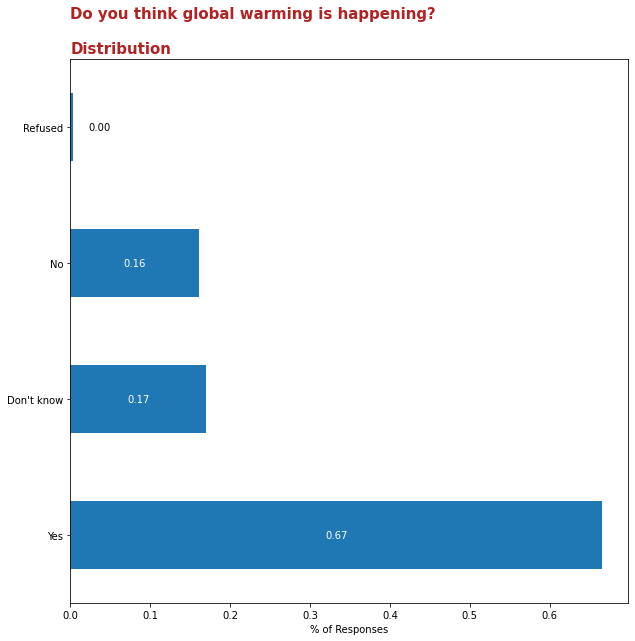

In [5]:
distgraph('happening',df.happening.unique(),'Do you think global warming is happening?')

The target for our dataset will be the question on whether or not the respondent thinks global warming is happening.

There are four options for the answer, one of which is "Refused". For the purposes of this analysis, and because it is 0.3% of the responses, these survey rows will be dropped leaving us with only three possible responses:
  1.  Yes
  2.  Don't Know
  3.  No

In [6]:
# drop Refused
df = df[df.happening != "Refused"]

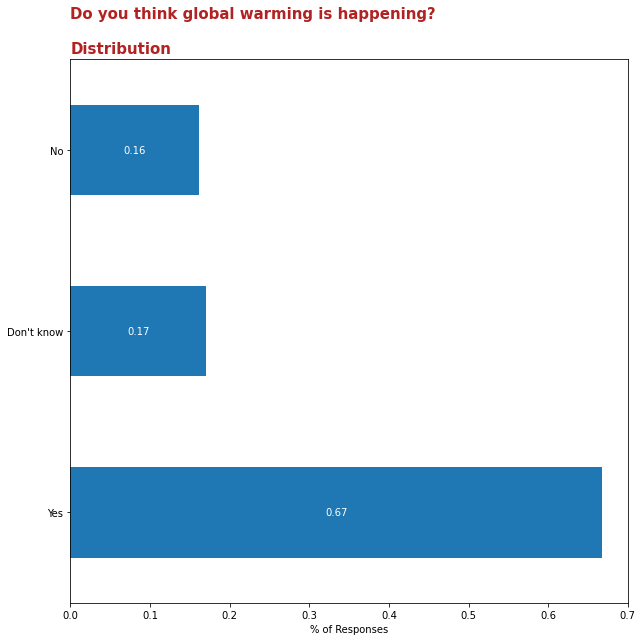

In [7]:
distgraph('happening',df.happening.unique(),'Do you think global warming is happening?')

A majority of our dataset (66.7%) thinks global warming is happening with Don't Know and No being neck and neck for the second most popular answer.

## Review Exploratory Variables

In [8]:
df.shape

(22345, 54)

The dataset contains 53 exploratory variables and 1 target variable across 22,345 rows, each indicating a survey response.

Below is a quick summary of the variables, nulls, types of values, etc. in the dataset

In [9]:
columns_info(df)

,nulls,dtype,nunique_values,unique_values,value_counts
case_ID,0,float64,22345,"[2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0...",2.0 1 27381.0 1 27391.0 1 27389.0...
wave,0,object,19,"[Nov 2008, Jan 2010, Jun 2010, May 2011, Nov 2...",Nov 2008 2155 Oct 2015 1330 Oct 2017 ...
year,0,int64,10,"[2008, 2010, 2011, 2012, 2013, 2014, 2015, 201...",2015 2593 2017 2570 2016 2430 2018 ...
weight_wave,0,float64,8225,"[0.5400000000000001, 0.85, 0.49, 0.29, 1.29, 2...",0.5400 80 0.6100 78 0.4200 76 0.4100 ...
weight_aggregate,0,float64,11637,"[0.2944021792003114, 0.4634108376301197, 0.267...",0.299854 30 0.294402 29 0.316210 29 0...
happening,0,object,3,"[Yes, Don't know, No]",Yes 14915 Don't know 3818 No ...
cause_original,0,object,5,"[Caused mostly by human activities, Caused mos...",Caused mostly by human activities ...
cause_other_text,20358,object,1389,"[nan, both of the above, a combination of huma...",both ...
cause_recoded,0,object,7,"[Caused mostly by human activities, Caused mos...",Caused mostly by human activities ...
sci_consensus,1330,object,5,[Most scientists think global warming is happe...,Most scientists think global warming is happen...


---
---

# Eploratory Data Analysis

## Patterns of Missingness

#### `Refused` as an answer

In addition to being able to Refuse an answer on our target variable, some questions allowed the respondent to refuse to answer them as well.

In [10]:
# create binary df where refused is 1 and everything else is 0
refused_df = df.applymap(lambda x: 1 if x == 'Refused' else 0)

pd.concat(
    # keep columns with a sum > 0 (at least 1 refused)
    [pd.Series(refused_df.loc[:,refused_df.sum()>0].sum(),
              name = '# of Refused'),
     
    # divide # of refusals by total rows
    pd.Series(refused_df.loc[:,refused_df.sum()>0].sum()/
              refused_df.loc[:,refused_df.sum()>0].shape[0],
              name = '% of Refused')],
    axis = 1).sort_values('% of Refused', ascending=False)

,# of Refused,% of Refused
reg_CO2_pollutant,504,0.022555
fund_research,500,0.022376
reg_utilities,442,0.019781
ideology,420,0.018796
party_x_ideo,308,0.013784
service_attendance,292,0.013068
religion,276,0.012352
evangelical,267,0.011949
party,205,0.009174
party_w_leaners,205,0.009174


In [11]:
refused_df['num_per_row'] = refused_df.sum(axis=1).values

In [12]:
pd.concat(
    [pd.Series(refused_df.num_per_row.value_counts().sort_index(),
              name = "# Respondents"),
    pd.Series(refused_df.num_per_row.value_counts().sort_index()
              /df.shape[0],
             name = '% of Survey Population')],
    axis = 1)

,# Respondents,% of Survey Population
0,20532,0.918863
1,996,0.044574
2,233,0.010427
3,249,0.011143
4,111,0.004968
5,45,0.002014
6,24,0.001074
7,40,0.001790
8,36,0.001611
9,12,0.000537


**Observation** 
  *  20,532 respondents answered all the questions in the survey, followed by 996 who refused just one.
  *  Respondents who refused to answer more than 5 questions make up 0.8% of the dataset.

For the purposes of this analysis, treat the people who answer `Refused` as missing values. People who refused more than 5 times have more than 5 missing values alone from these types of answers. Drop them.

In [13]:
df.drop(index=refused_df[refused_df.num_per_row >= 5]['happening'].index, inplace=True)
df.reset_index(drop=True, inplace=True)

#### Null Responses

The survey was carried out in a series of waves across the years. Some questions were not included in every single wave of survey questioning which led to there being nulls in the dataset.

In [14]:
pd.concat(
    [pd.Series(df.loc[:,(df.isnull()).any()].isnull().sum(),
              name = '# of nulls'),
    pd.Series(df.loc[:,(df.isnull()).any()].isnull().sum()/
              df.loc[:,(df.isnull()).any()].shape[0],
              name = '% of nulls')],
    axis = 1).sort_values('% of nulls', ascending = False)

,# of nulls,% of nulls
religion_other_nonchristian,22030,0.995886
cause_other_text,20146,0.910718
hear_GW_media,13419,0.606618
reg_coal_emissions,8910,0.402785
reg_utilities,5002,0.226120
sci_consensus,1324,0.059853
harm_plants_animals,1324,0.059853
reg_CO2_pollutant,984,0.044483


Right off the bat, there are features with over 20% nulls. Drop these for missingness. The other questions were asked in a enough waves for us to be able to impute the missing values.

In [15]:
df.drop(['religion_other_nonchristian', 'cause_other_text', 'hear_GW_media',
         'reg_coal_emissions','reg_utilities'],
        axis = 1,
        inplace = True)

In [16]:
null_counts = df.isnull().applymap(lambda x: int(x))

null_counts['num_per_row'] = null_counts.sum(axis=1).values

In [17]:
pd.concat(
    [pd.Series(null_counts.num_per_row.value_counts().sort_index(),
              name = "# Respondents"),
    pd.Series(null_counts.num_per_row.value_counts().sort_index()
              /df.shape[0],
             name = '% of Survey Population')],
    axis = 1)

,# Respondents,% of Survey Population
0,19813,0.895665
1,984,0.044483
2,1324,0.059853


**Observation** The entire survey population had, at most, 2 nulls.

#### Impute Refused as Null

As mentioned previously, our analysis will treat refused answers for questions as nulls.

In [18]:
# finally impute these as null
df = df.applymap(lambda x: np.nan if x == 'Refused' else x)

## Review Variables

#### `Case_ID`

`CASE_ID` is the individual identifier of the survey respondent and will have no value for our model. Drop it.

In [19]:
df.drop('case_ID', axis=1, inplace=True)

#### `Wave`

The survey was performed across multiple years and multiple months. Each of these survey instances are called a wave.

In [20]:
# reorder wave to be YYYY MMM instead of MMM YYYY
df.wave = [' '.join(wave.split(' ')[::-1]) for wave in df.wave]

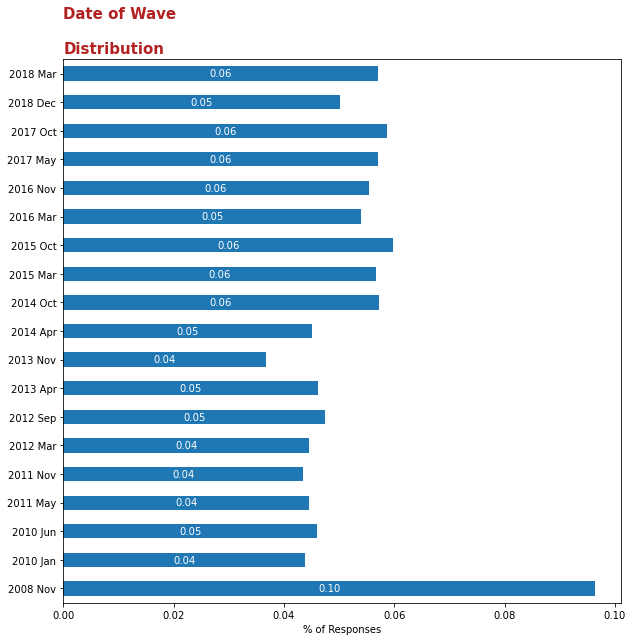

In [21]:
wave_order = df.wave.unique()
wave_order.sort()
distgraph('wave',wave_order,'Date of Wave')

**Observation**
  *  The first poll had the largest number of responses. 
  *  The following waves were close to half of that of the first poll

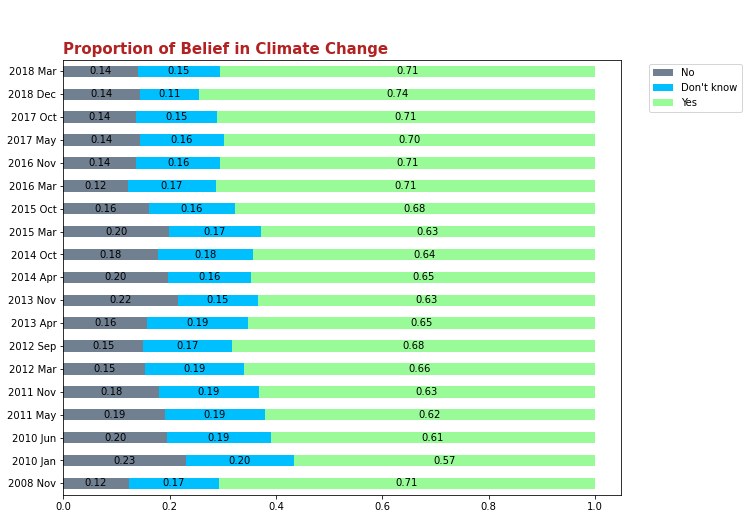

In [22]:
propgraph('wave',wave_order,'')

#### `Weight Wave` & `Weight Aggregate`

The survey takers wanted to be able to extrapolate their results toward the entire US population. In order to do this, they created two metrics: `Weight Wave` and `Weight Aggregate`. Both attempt to weigh the survey response against the backdrop of the rest of the survey takers and the demographics of the US population at the time using census data. By applying these, it would be possible to make observations on the entire population from aggregate survey metrics.

The two fields they created work for different contexts:
  *  `Weight Wave` for analyzing data within a wave
  *  `Weight Aggregate` for analyzing data across waves
  
Since we are removing data from the survey dataset, these waves become untethered to their intended value. Therefore we are dropping these fields and making the caveat with our findings: **Our characteristics and findings are an expression of the survey dataset, not the US population as a whole. Any application of these findings should be done on populations that are believed to have approximately the same demographic makeup as the survey.**

In [23]:
df.drop(['weight_wave','weight_aggregate'], axis = 1, inplace=True)

#### `Year`

**Proportion of Belief in Climate Change over 2008 - 2018**

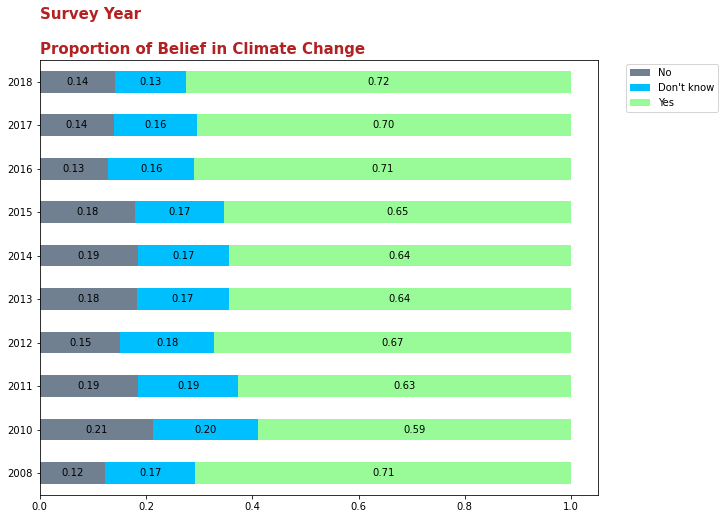

In [24]:
propgraph('year',
          df.year.unique(),
          'Survey Year')

In [25]:
df.year.value_counts().to_frame()

,year
2015,2578
2017,2558
2016,2418
2018,2372
2014,2262
2008,2132
2012,2033
2010,1988
2011,1944
2013,1836


In [26]:
df.groupby('year')['happening'].value_counts(normalize=True).to_frame().unstack()

happening                    
happening Don't know        No       Yes
year                                    
2008        0.170732  0.122420  0.706848
2010        0.199195  0.212274  0.588531
2011        0.187757  0.185700  0.626543
2012        0.175603  0.151992  0.672405
2013        0.172113  0.183551  0.644336
2014        0.170203  0.185676  0.644120
2015        0.167184  0.178821  0.653995
2016        0.162117  0.129032  0.708850
2017        0.155199  0.139953  0.704848
2018        0.134064  0.142074  0.723862

#### `Cause Original`
Assuming global warming is happening do you think it is...

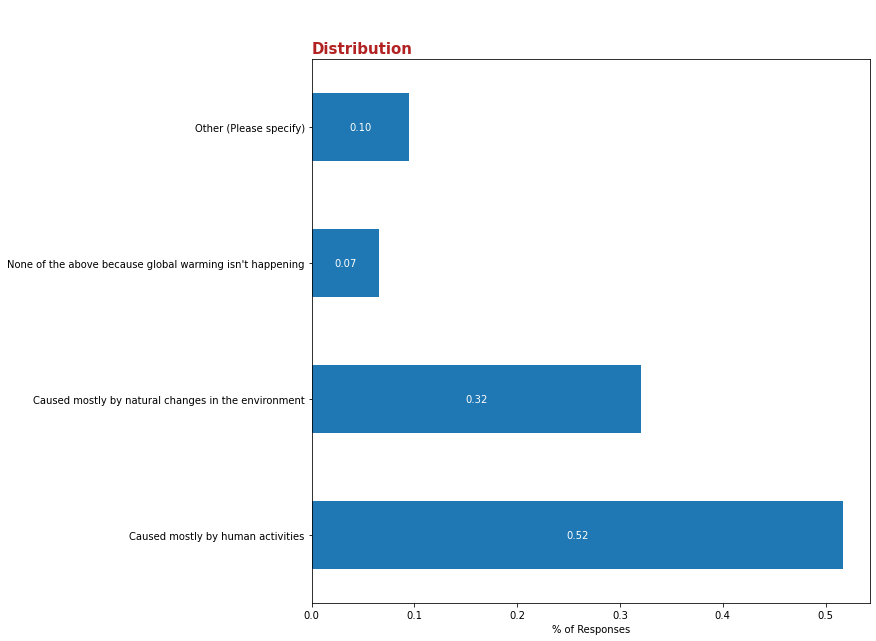

In [27]:
distgraph('cause_original',
          df.cause_original.unique()[:-1],
         '')

**Observation**
  *  A majority of respondents answered that if global warming were happening, it was caused mostly by human activities.
  *  7% of respondents rejected the premise of the question.

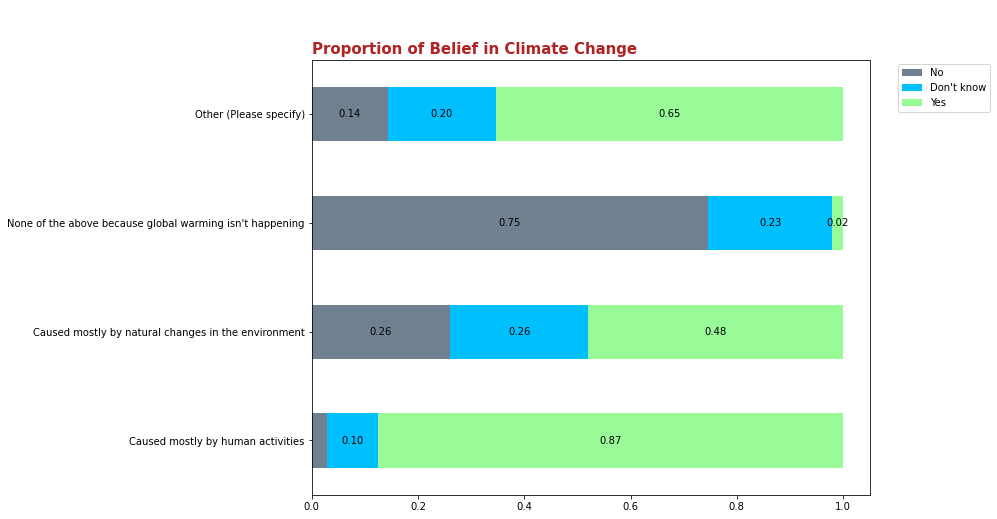

In [28]:
propgraph('cause_original',
          df.cause_original.unique()[:-1],
         '')

**Observation**
  *  For each `happening` subgroup, some people "None of the above because global warming isn't happening." 30 people who said "Yes" to `happening` selected this response for this question 
  *  For the 'No' subgroup of `happening`, 2,960 people selected either of the two choices that state what the cause of global warming is. This is a contradiction. 

#### `Cause Recoded`

Assuming global warming is happening, do you think it is... (Recoded to include open-ends)

This feature was created by the survey providers to combine the offered answers for `cause_original` and the answers specified when "Other" was selected (`cause_other_text`). However, `cause_other_text` was dropped as a feature due to the 91% null rate. Since `cause_recoded` provides information of that dropped column and `cause_original`, drop `cause_original`.

In [29]:
df.drop(columns=['cause_original'], axis=1, inplace=True)

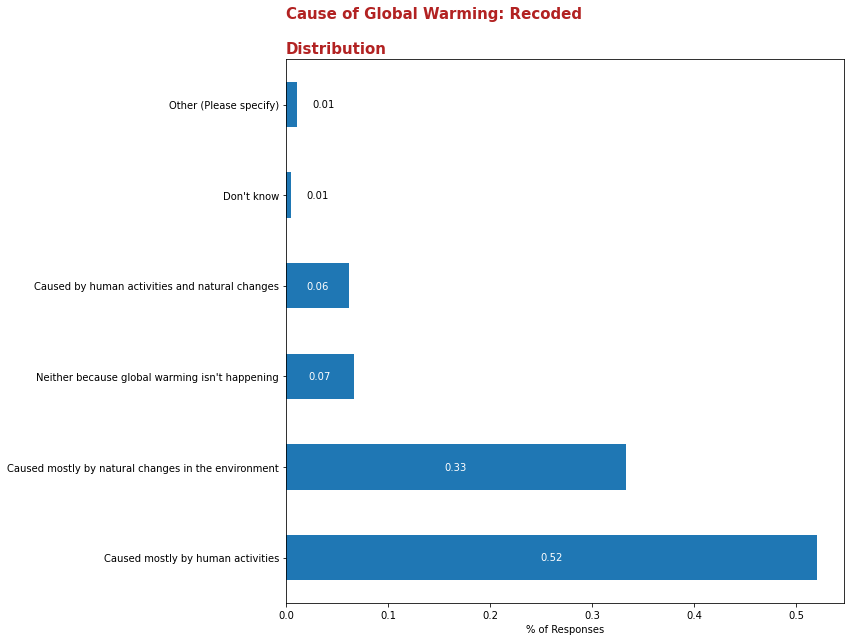

In [30]:
distgraph('cause_recoded',
          df.cause_recoded.unique()[:-1],
         'Cause of Global Warming: Recoded')

**Observation**
  *  58% of respondents believe that global warming is partly or mostly human driven.
  *  33% of respondents believe that global warming is mostly driven by natural changes in the environment.

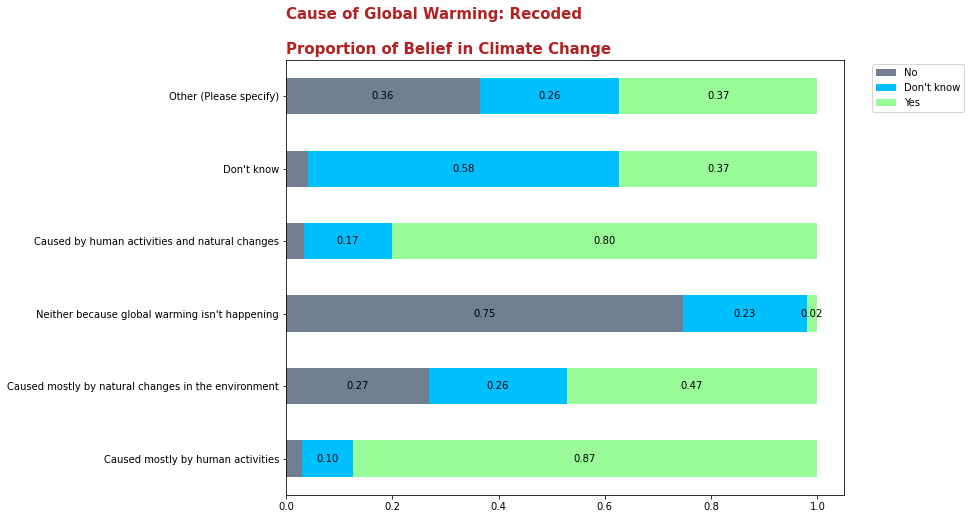

In [31]:
propgraph('cause_recoded',
          df.cause_recoded.unique()[:-1],
         'Cause of Global Warming: Recoded')

**Observation**
  *  "Don't Know" and "Caused by human activities and natural changes" were added from the original question of `cause_original`
  *  Unsurprisingly, persons who refuted the question's premise did not believe global warming was happening as a majority.

In [32]:
# ordinal encode
my_dict = {'Caused mostly by human activities': 'Yes',
           'Caused mostly by natural changes in the environment': 'Yes',
           'Caused by human activities and natural changes': 'Yes',
           'Other (Please specify)': "Don't know",
           "Don't know": "Don't know",
           "Neither because global warming isn't happening": 'No'}

df.cause_recoded = df.cause_recoded.replace({i:j for i,j in my_dict.items()})

#### `SCI Consensus `

Scientist Consensus: Which comes closest to your own view?
- Not asked in Oct 2015

In [33]:
# Number of Nulls in sci_consensus from "2016 Oct"
df.sci_consensus.isnull().sum()

1350

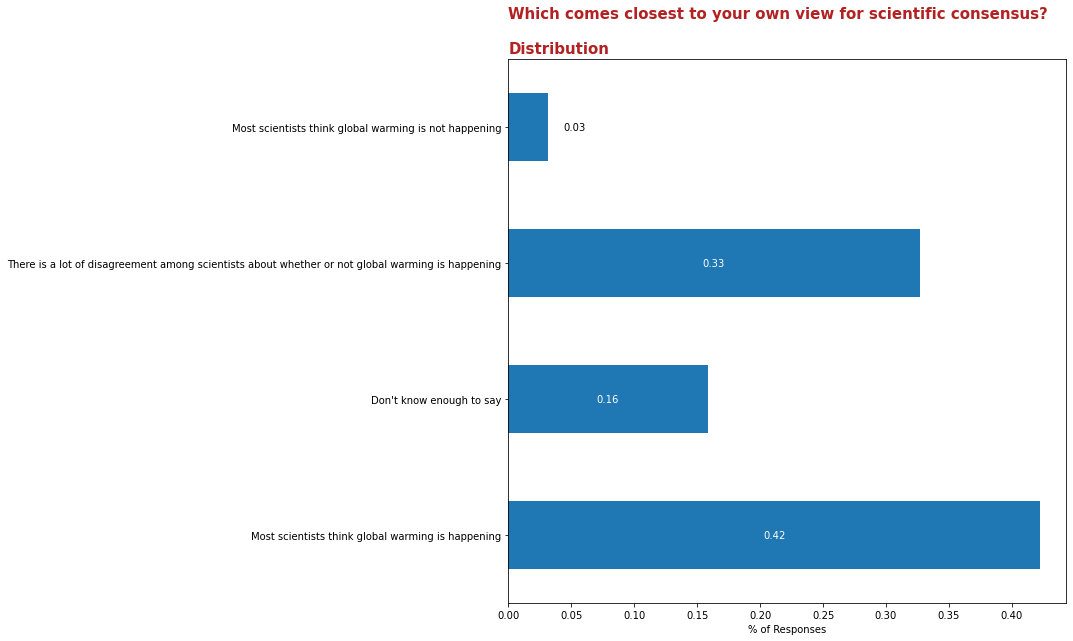

In [34]:
distgraph('sci_consensus',
          df.sci_consensus.unique()[:-1],
         'Which comes closest to your own view for scientific consensus?')

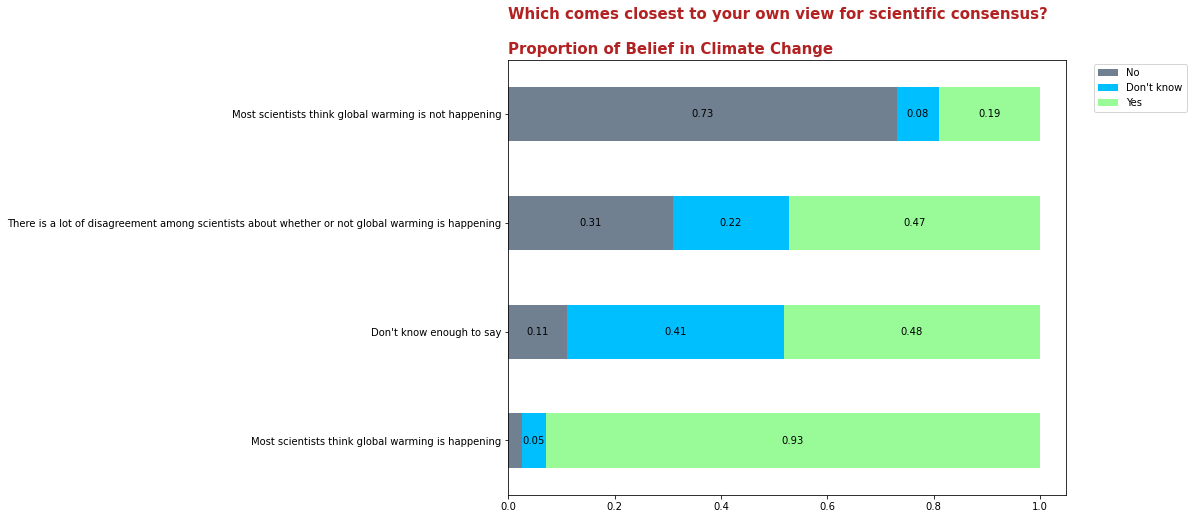

In [35]:
propgraph('sci_consensus',
          df.sci_consensus.unique()[:-1],
         'Which comes closest to your own view for scientific consensus?')

**Observation**
  *  The plurality of respondents believe that most scientist think global warming is happening, of which 93% believe global warming is happening
  *  A mixed scientific consensus had almost a majority of respondents believing in global warming
  *  Not knowing about the scientific consensus lended itself to the group inclined to not know if global warming was happening

In [36]:
# ordinal
my_dict = {'Most scientists think global warming is happening': 'Yes',
           'There is a lot of disagreement among scientists about whether or not global warming is happening': 'Maybe',
           "Don't know enough to say": "Don't know",
           'Most scientists think global warming is not happening': 'No'}

df.sci_consensus = df.sci_consensus.replace({i:j for i,j in my_dict.items()})

#### `Worry`

How worried are you about global warming?

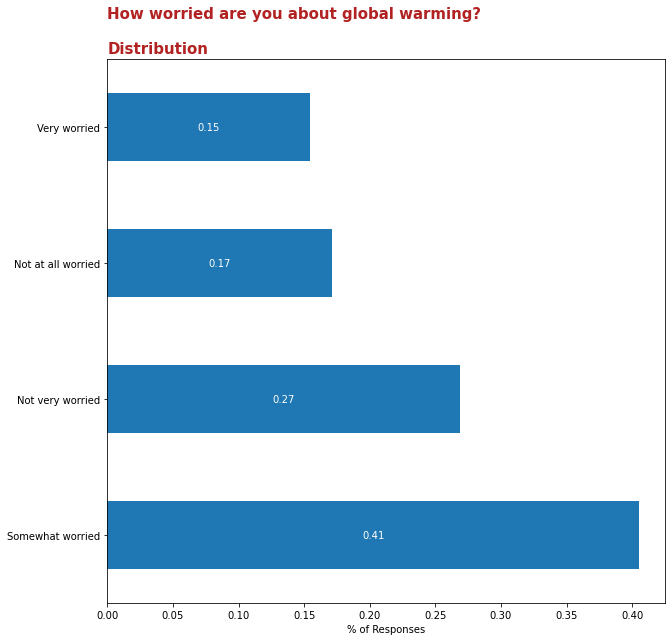

In [37]:
distgraph('worry',
          df.worry.unique()[:-1],
         'How worried are you about global warming?')

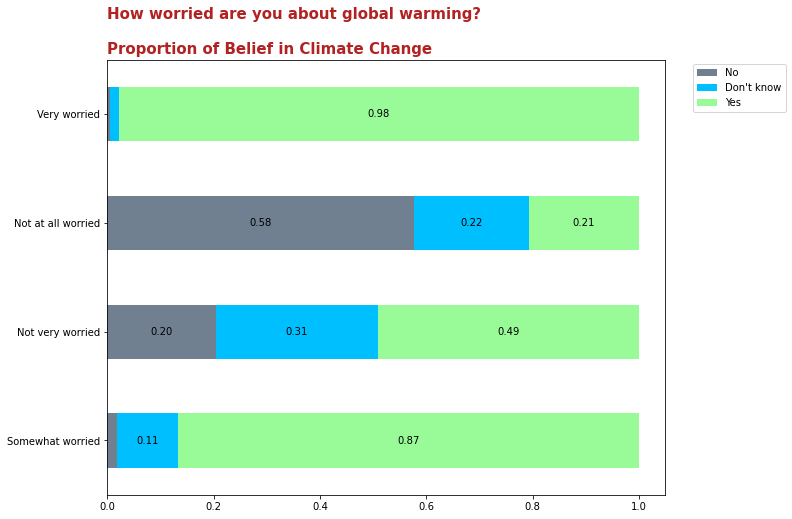

In [38]:
propgraph('worry',
          df.worry.unique()[:-1],
         'How worried are you about global warming?')

**Observation**
- This feature might be misleading for predicting the target since `somewhat worried` and `very worried` are so close in the amount who believe in global warming. Compare this to the cavern between the `not at all worried` and `not very worried` for not believing in global warming.
- This feature could be reduced to binary (worry_True, worry_False) for analysis
- Could also reduce to 3 subgroups (not_worried, worried, very_worried)

In [39]:
# encode
df['worry'] = [0 if x == 'Not at all worried' else x if pd.isnull(0) else 1 for x in df.worry]

#### `Harm Personally`
How much do you think global warming will harm: You personally

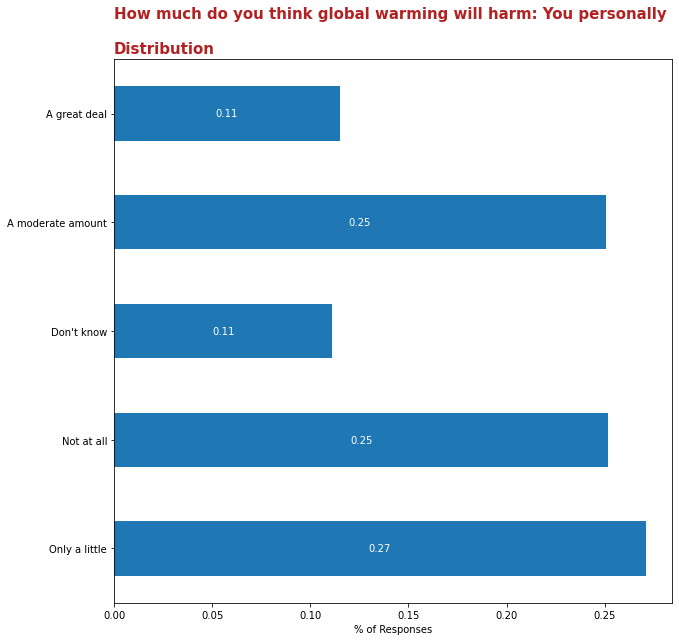

In [40]:
distgraph('harm_personally',
          df.harm_personally.unique()[:-1],
          'How much do you think global warming will harm: You personally')

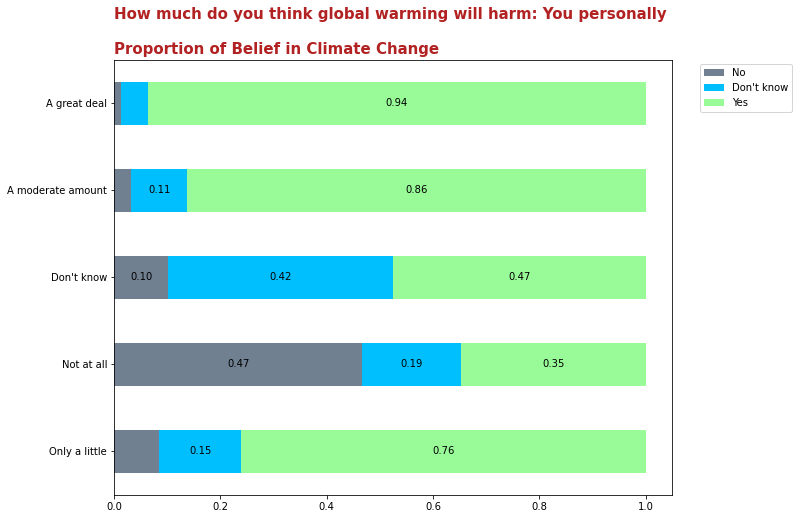

In [41]:
propgraph('harm_personally',
          df.harm_personally.unique()[:-1],
          'How much do you think global warming will harm: You personally')

**Observation** 
  * Believing that global warming will harm the respondent is a good indicator of whether they believe it is happening.

In [42]:
# ordinal encode
my_dict = {'A great deal': 'Yes',
           'Only a little': 'Yes',
           'Not at all': 'No',
           'Don\'t know': 'Don\'t know',
           'A moderate amount': 'Yes',
           'Refused': 'Refused'}

df.harm_personally = df.harm_personally.replace({i:j for i,j in my_dict.items()})

#### `Harm US`
How much do you think global warming will harm: People in the United States

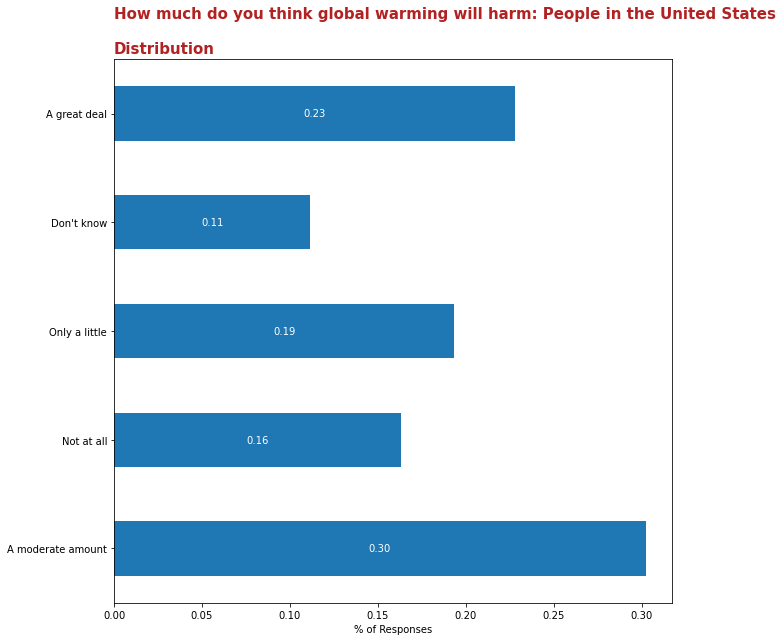

In [43]:
distgraph('harm_US',
          df[~df.harm_US.isnull()].harm_US.unique(),
          'How much do you think global warming will harm: People in the United States')

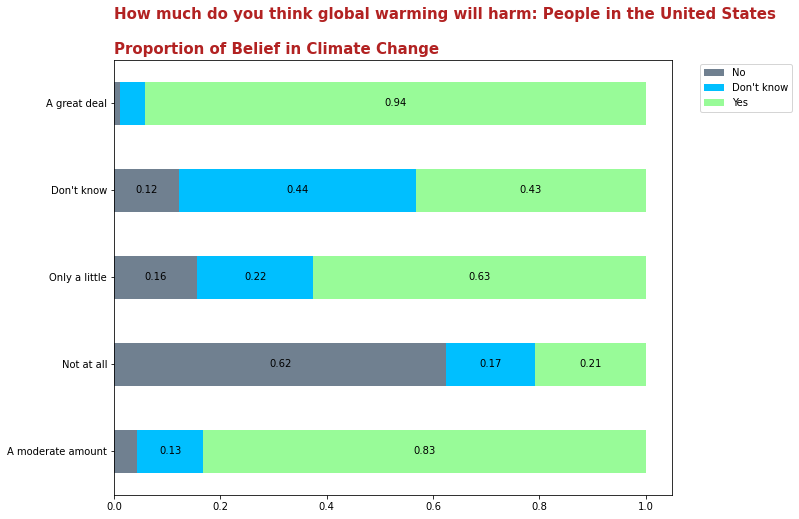

In [44]:
propgraph('harm_US',
          df[~df.harm_US.isnull()].harm_US.unique(),
          'How much do you think global warming will harm: People in the United States')

**Observations**
  *  Similar to `harm_personally`, believing that harm will come to the United States is a good indicator for whether the respondent belives global warming is happening.

In [45]:
# ordinal encode
my_dict = {'A great deal': 'Yes',
           'Only a little': 'Yes',
           'Not at all': 'No',
           'Don\'t know': 'Don\'t know',
           'A moderate amount': 'Yes',
           'Refused': 'Refused'}

df.harm_US = df.harm_US.replace({i:j for i,j in my_dict.items()})

---
---

**Columns with underlying Nulls due to Poll Incongruity**

Columns with questions that weren't asked in 'all waves'
- sci_consensus
- harm_plants_animals
- reg_CO2_pollutant
- reg_utilities
- reg_coal_emissions
- hear_GW_media

### Andy - Conclusions and Recommendations 

**Features Explored:**
1. wave -> OrdinalEncode
2. year -> OrdinalEncode
3. <font color=grey>weight_wave</font>
4. <font color=grey>weight_aggregate</font>
5. **happening** (target)
    - "Refused" dropped
    - created binary class column `target` ("Yes", "Not Yes")
    - OrdinalEncode fit & transformed original `happening` column
6. <font color=grey>cause_original</font>
7. <font color=grey>cause_other_text</font>
8. cause_recoded
    - final response from features 6 & 7
9. ***sci_consensus***
    - not included for one poll (2015 Oct) 1330 rows
    - interesting feature, worth imputing with KNNImputer
10. worry
    - OrdinalEncode 
11. harm_personally
12. harm_US
13. harm_dev_countries


**Data Cleaning Recommendations:**
- drop rows that "Refused" all Cause and Harm series questions 
- drop remaining 24 rows that "Refused" answering `happening`
- drop columns `weight_wave` and `weight_aggregate`
- drop column `sci_consensus`

#### `harm_dev_countries`
**How much do you think global warming will harm: People in developing countries**

In [46]:
list(df.harm_dev_countries.dropna().unique())

['A great deal',
 'Only a little',
 'Not at all',
 'A moderate amount',
 "Don't know"]

The response options. Map these to Don't Know, No, and Yes for more absolute groupings.

In [47]:
my_dict = {'A great deal': 'Yes',
           'Only a little': 'Yes',
           'Not at all': 'No',
           'Don\'t know': 'Don\'t know',
           'A moderate amount': 'Yes'}

df.harm_dev_countries = df.harm_dev_countries.replace({i:j for i,j in my_dict.items()})

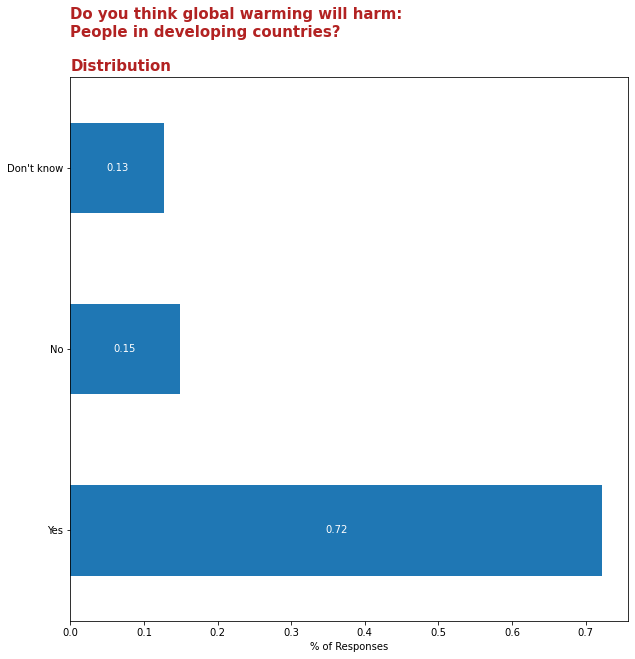

In [48]:
distgraph('harm_dev_countries',
          df.harm_dev_countries.unique()[:-1],
          'Do you think global warming will harm:\n'+\
          'People in developing countries?')

**Observation**
  *  A majority of respondents (71.9%) answered Yes that global warming will harm people in developing countries.
  *  14.8% of respondents answered No
  *  Around 13.3% of respondents either did not know or refused to answer


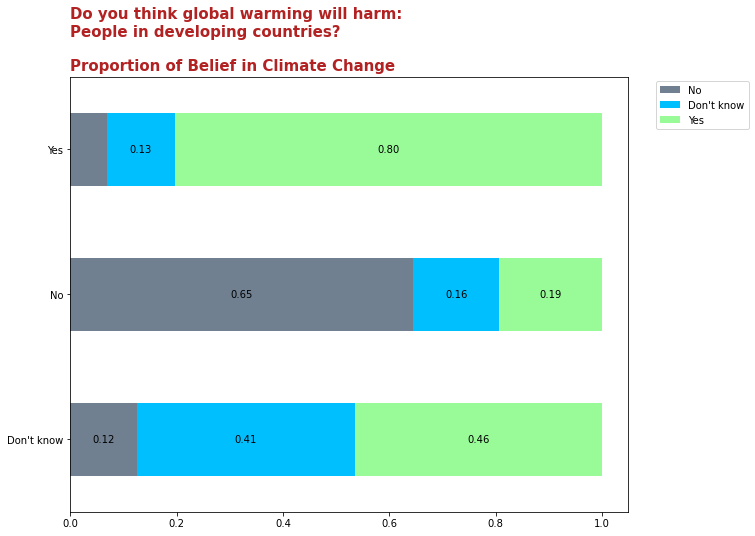

In [49]:
propgraph('harm_dev_countries',
          ['Don\'t know', 'No','Yes'],
          'Do you think global warming will harm:\n'+\
          'People in developing countries?')


  
**Observation**
  *  Respondents for Yes believed in global warming by a large margin.
  *  Respondents for No, on the other hand, did not believe in global warming by a large margin.
  *  Respondents for Don't Know believed in global warming or didn't know about equally.
  *  A majority of respondents for Refused believed in global warming.

#### `harm_future_gen`
**How much do you think global warming will harm: Future generations of people**

In [50]:
list(df.harm_future_gen.dropna().unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little']

The response options. Map these to Don't Know, No, and Yes for more absolute groupings.

In [51]:
df.harm_future_gen = df.harm_future_gen.replace({i:j for i,j in my_dict.items()})

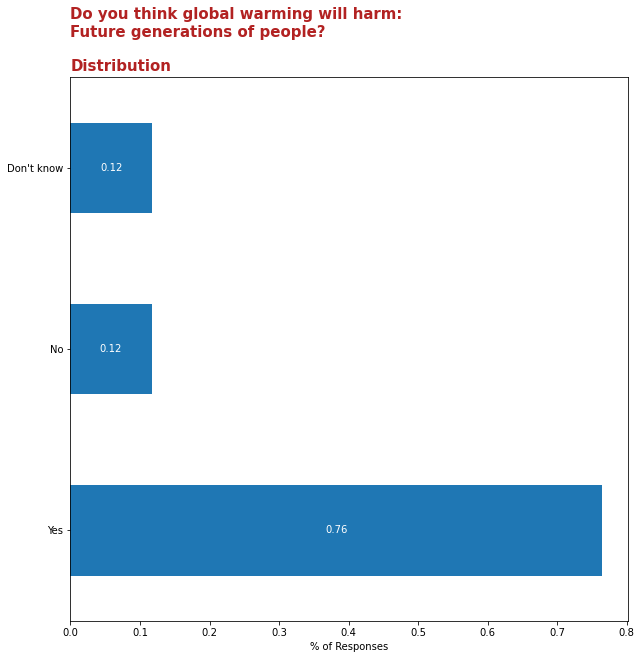

In [52]:
distgraph('harm_future_gen',
          df.harm_future_gen.dropna().unique(),
          'Do you think global warming will harm:\n'+\
          'Future generations of people?')

**Observation**
  *  A majority of respondents (76.0%) answered Yes that global warming will harm future generations of people.
  *  11.9% of respondents answered No
  *  Around 12.1% of respondents either did not know or refused to answer


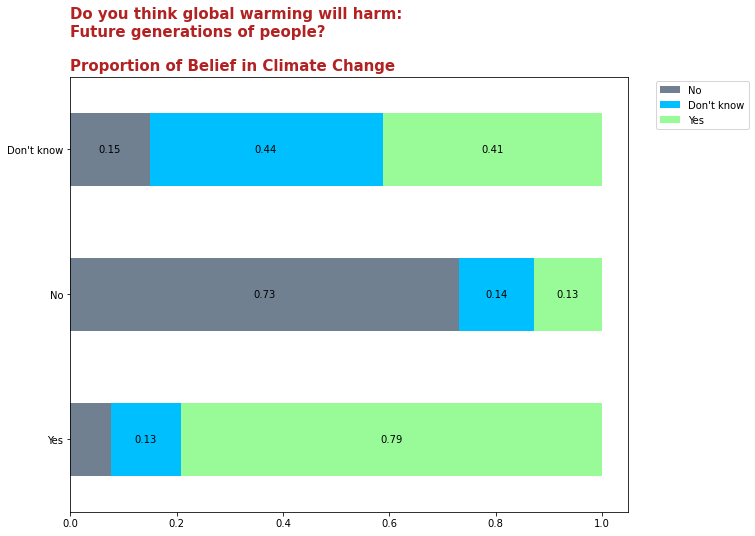

In [53]:
propgraph('harm_future_gen',
          df.harm_future_gen.dropna().unique(),
          'Do you think global warming will harm:\n'+\
          'Future generations of people?')

**Observation**
  *  Respondents for Yes believed in global warming by a large margin.
  *  Respondents for No, on the other hand, did not believe in global warming by a large margin.
  *  Respondents for Don't Know believed in global warming or didn't know about equally.
  *  A majority of respondents for Refused believed in global warming.

#### `harm_plants_animals`
**How much do you think global warming will harm: Plant and animal species**

In [54]:
df.harm_plants_animals.isnull().sum() / df.shape[0]

0.06206771845757425

6% of respondents were not offered this question as it was not asked in Oct 2015. These will need to be imputed.

In [55]:
list(df.harm_plants_animals.dropna().unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little']

The response options. Map these to Don't Know, No, and Yes for more absolute groupings.

In [56]:
df.harm_plants_animals = df.harm_plants_animals.replace({i:j for i,j in my_dict.items()})

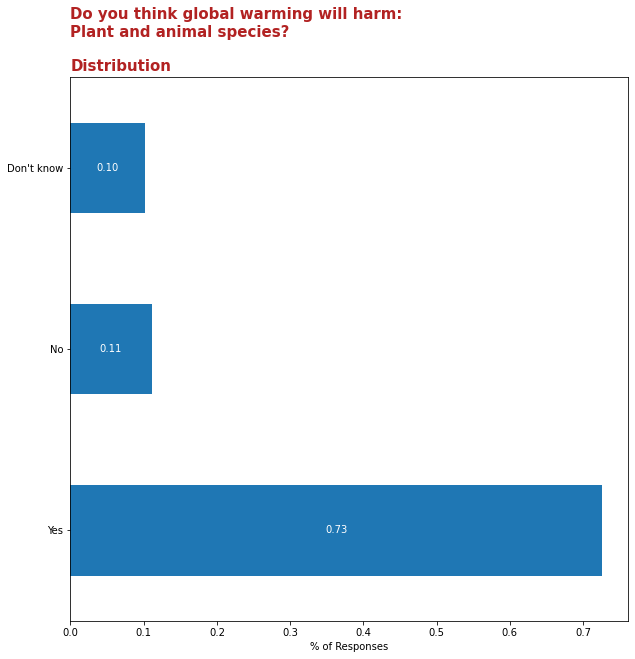

In [57]:
distgraph('harm_plants_animals',
          df.harm_plants_animals.unique()[:-1],
          'Do you think global warming will harm:\n'+\
          'Plant and animal species?')

**Observation**
  *  A majority of respondents (76.8%) answered Yes that global warming will harm plants and animals.
  *  11.7% of respondents answered No
  *  Around 11.4% of respondents either did not know or refused to answer

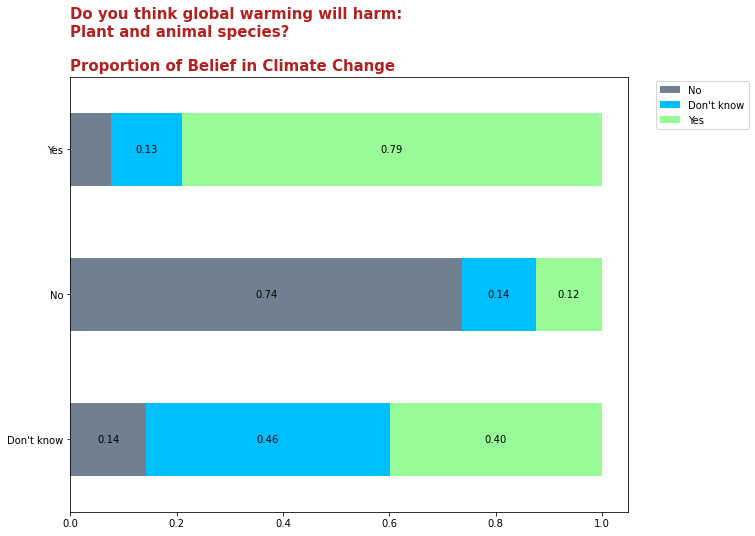

In [58]:
propgraph('harm_plants_animals',
          ['Don\'t know', 'No','Yes'],
          'Do you think global warming will harm:\n'+\
          'Plant and animal species?')

**Observation**
  *  Respondents for Yes believed in global warming by a large margin.
  *  Respondents for No, on the other hand, did not believe in global warming by a large margin.
  *  Respondents for Don't Know didn't know if they believe in global warming, closely followed by Yes.
  *  A majority of respondents for Refused believed in global warming.

#### `when_harm_us`
**When do you think global warming will start to harm people in the United States?**

In [59]:
list(df.when_harm_US.dropna().unique())

['In 10 years',
 'In 50 years',
 'Never',
 'In 25 years',
 'In 100 years',
 'They are being harmed now']

The response options. Map these to Never, In the Future, and Now for more absolute groupings.

In [60]:
my_dict = {'In 10 years': 'In the Future',
           'In 50 years': 'In the Future',
           'Never': 'Never',
           'In 25 years': 'In the Future',
           'In 100 years': 'In the Future',
           'They are being harmed now': 'Now'}

df.when_harm_US = df.when_harm_US.replace({i:j for i,j in my_dict.items()})

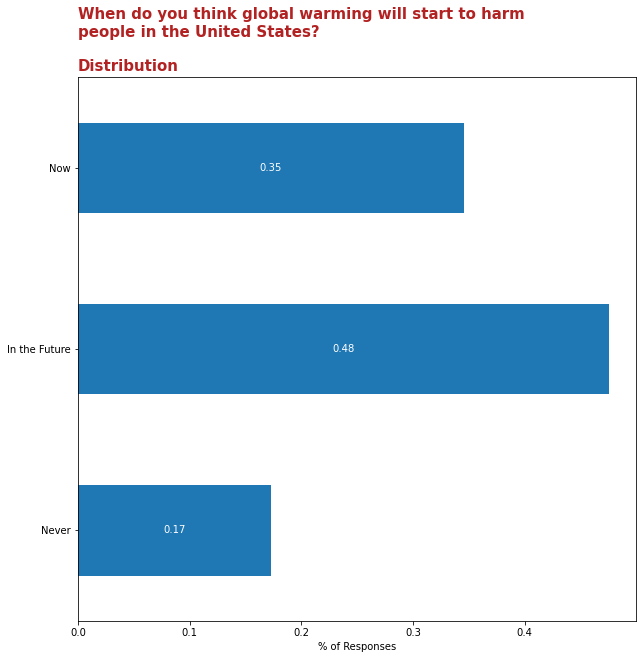

In [61]:
distgraph('when_harm_US',
          ['Never', 'In the Future','Now'],
          'When do you think global warming will start to harm\npeople '+\
          'in the United States?')

**Observation**
  *  A plurality of respondents (47.5%) answered `In the Future` for when global warming will start to harm people in the United States.
  *  34.5% of respondents answered `Now`
  *  17.3% of respondents answer `Never`

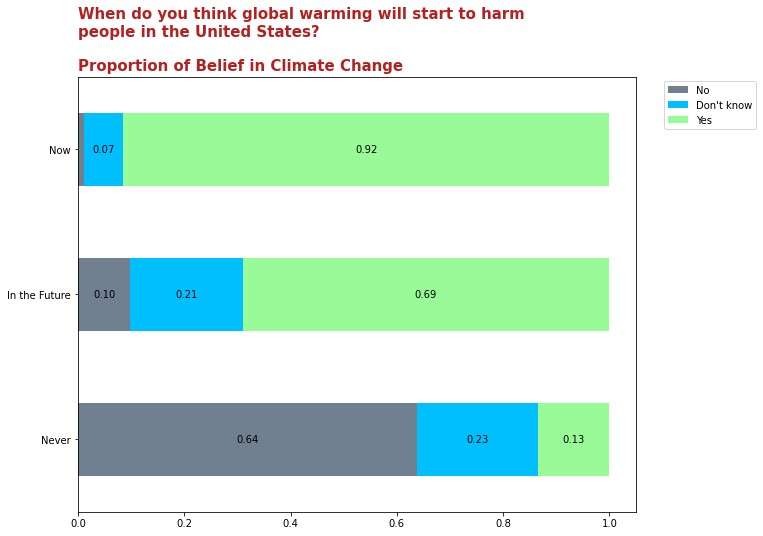

In [62]:
propgraph('when_harm_US',
          ['Never', 'In the Future','Now'],
          'When do you think global warming will start to harm\npeople '+\
          'in the United States?')

**Observation**
  *  Unsurprisingly, `Now` and `In the Future` both believe in global warming by a large margin
  *  Respondents for `Never` still held decent amounts of Don't Know and Yes for belief in global warming indicating that global warming may not be inherently harmful in their mind.

#### `reg_CO2_pollutant`
**How much do you support or oppose the following policies?
Regulate carbon dioxide (the primary greenhouse gas) as a pollutant.**

In [63]:
df.reg_CO2_pollutant.isnull().sum()/df.shape[0]

0.0607115410695719

4.5% of respondents were not offered this question as it was not asked in May 2011. These will need to be imputed.

In [64]:
list(df.reg_CO2_pollutant.dropna().unique())

['Strongly support', 'Somewhat support', 'Somewhat oppose', 'Strongly oppose']

The response options. Map these into support, oppose, and refused for more absolute groupings.

In [65]:
my_dict = {'Strongly support': 'Support',
           'Somewhat support': 'Support',
           'Somewhat oppose': 'Oppose',
           'Strongly oppose': 'Oppose'}

df.reg_CO2_pollutant = df.reg_CO2_pollutant.replace({i:j for i,j in my_dict.items()})

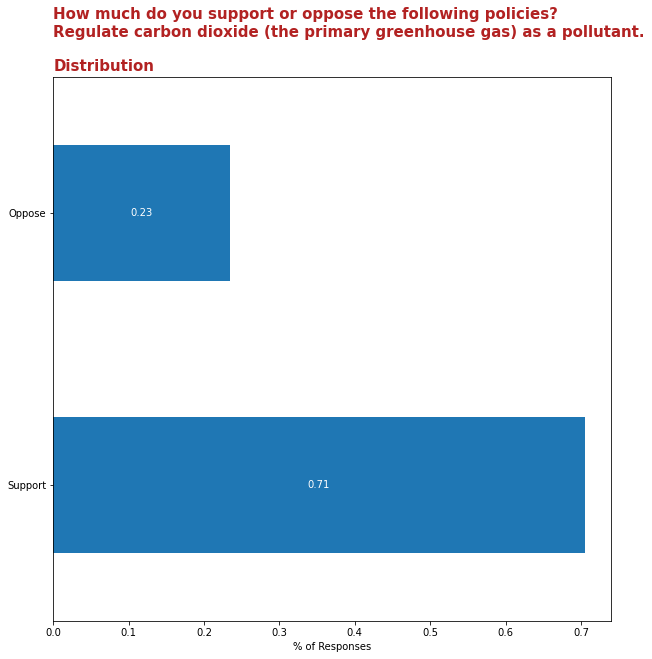

In [66]:
distgraph('reg_CO2_pollutant',
          df.reg_CO2_pollutant.unique()[:-1],
          'How much do you support or oppose the following policies?\n'+\
          'Regulate carbon dioxide (the primary greenhouse gas) as a pollutant.')

**Observation**
  *  A majority of respondents (73.2%) support regulating carbon dioxide.
  *  24.4% of respondents answered No
  *  Around 2.4% of respondents either did not know or refused to answer

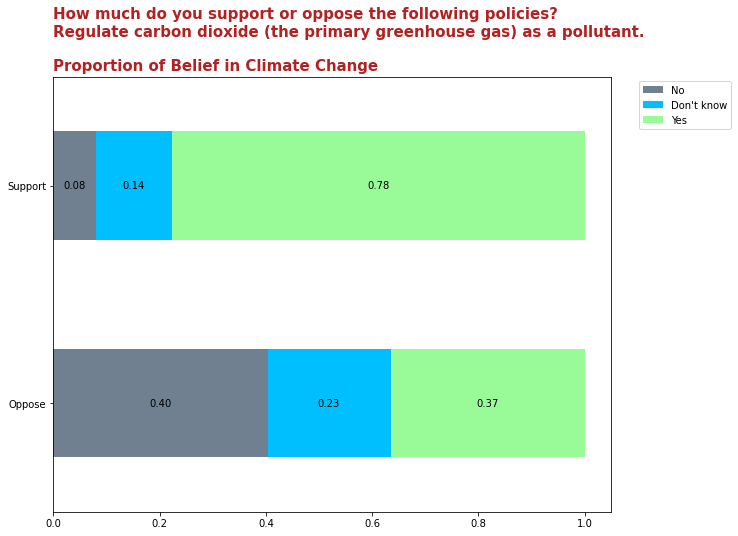

In [67]:
propgraph('reg_CO2_pollutant',
          ['Oppose','Support'],
          'How much do you support or oppose the following policies?\n'+\
          'Regulate carbon dioxide (the primary greenhouse gas) as a pollutant.')

**Observation**
  *  `Oppose` is not as deeply for not believing in climate change as `Support` is for believing in climate change.

#### `fund_research`
**How much do you support or oppose the following policies? Fund more research into renewable energy sources, such as solar and wind power.**

In [68]:
list(df.fund_research.dropna().unique())

['Strongly support', 'Somewhat support', 'Strongly oppose', 'Somewhat oppose']

The response options. Map these into support and oppose for more absolute groupings.

In [69]:
df.fund_research = df.fund_research.replace({i:j for i,j in my_dict.items()})

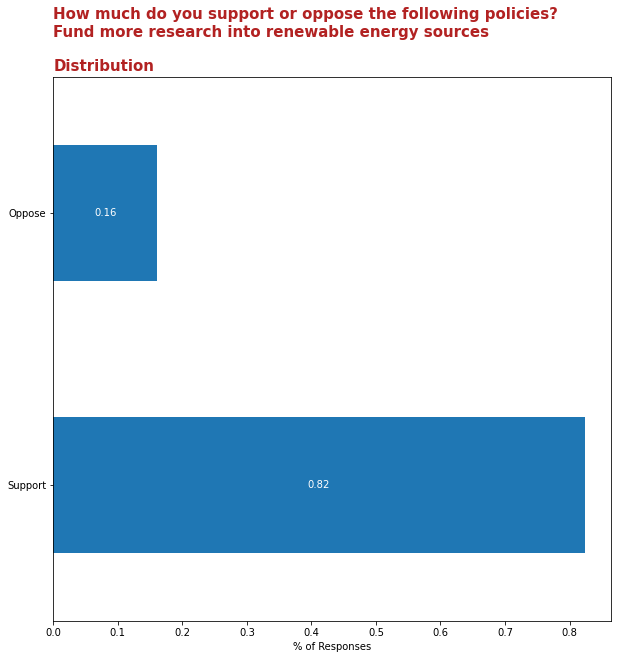

In [70]:
distgraph('fund_research',
          df.fund_research.unique()[:-1],
          'How much do you support or oppose the following policies?\n'+\
          'Fund more research into renewable energy sources')

**Observation**
  *  A majority of respondents (81.8%) support funding more research into renewable energy sources.
  *  16.0% of respondents answered No
  *  Around 2.2% of respondents refused to answer

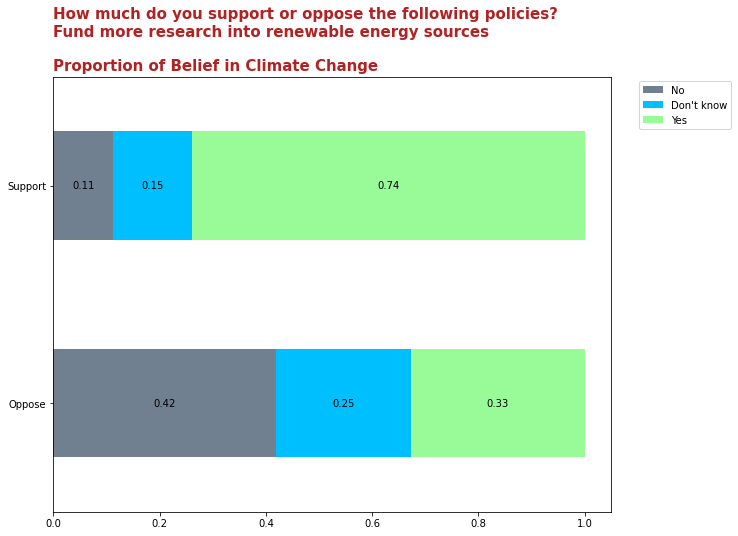

In [71]:
propgraph('fund_research',
          ['Oppose','Support'],
          'How much do you support or oppose the following policies?\n'+\
          'Fund more research into renewable energy sources')

**Observation**
  *  `Oppose` is not as deeply for not believing in climate change as `Support` is for believing in climate change.

#### `discuss_GW`
**How often do you discuss global warming with your family and friends?**

In [72]:
list(df.discuss_GW.dropna().unique())

['Occasionally', 'Rarely', 'Never', 'Often']

The response options. Map these to Refused, Never, At All for more absolute groupings

In [73]:
my_dict = {'Occasionally': 'At All',
           'Rarely': 'At All',
           'Never': 'Never',
           'Often': 'At All'}

df.discuss_GW = df.discuss_GW.replace({i:j for i,j in my_dict.items()})

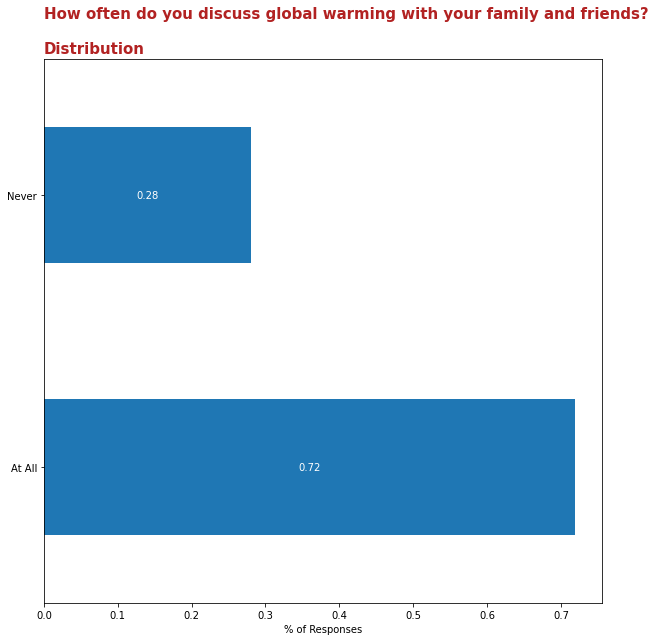

In [74]:
distgraph('discuss_GW',
          df.discuss_GW.unique()[:-1],
          'How often do you discuss global warming with your family and friends?')

**Observation**
  *  A majority of respondents discuss global warming with family and friends

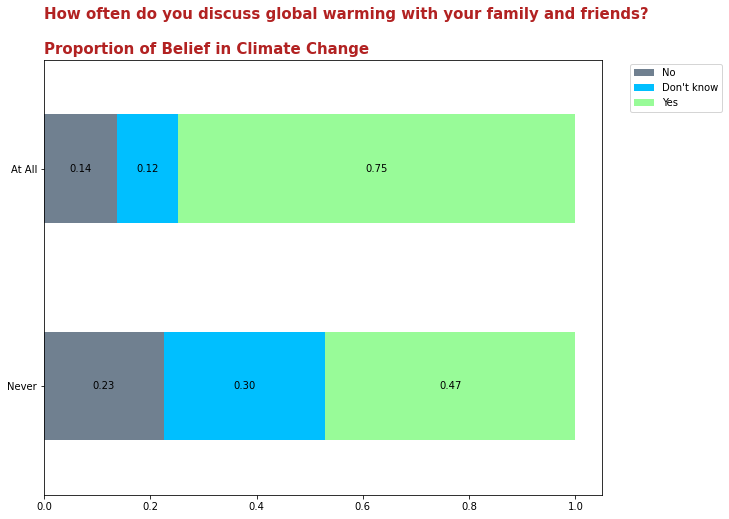

In [75]:
propgraph('discuss_GW',
          ['Never','At All'],
          'How often do you discuss global warming with your family and friends?')

**Observation**
  *  Despite `Never` discussing global warming with family and friends, that group of respondents still believes in global warming on average along with `At All`

#### `gender`
**Are you Male or Female?**

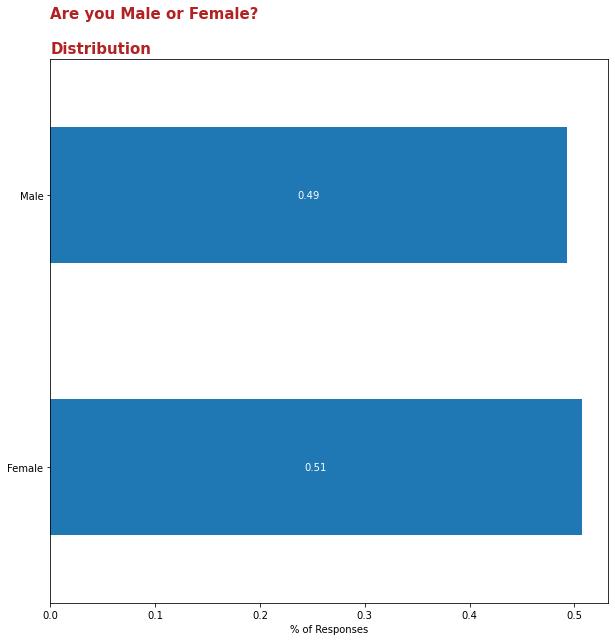

In [76]:
distgraph('gender',
          df.gender.unique(),
          'Are you Male or Female?')

**Observation**
  *  The distribution of responses is very close to even with `female` representing a majority of responses at 50.8%

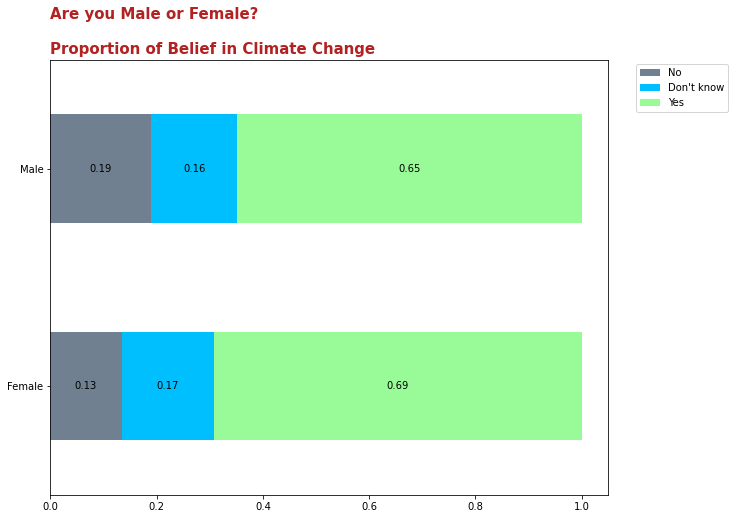

In [77]:
propgraph('gender',
          ['Female','Male'],
          'Are you Male or Female?')

**Observation**
  *  `Female` respondents believed in global warming more than `Male` respondents.

In [78]:
# dummify gender to be 0 for male and 1 for female
df.gender = [int(val == 'Female') for val in df.gender]

#### `age`
**How old are you?**

In [79]:
df.age.describe()

count    22121.000000
mean        50.536865
std         16.791539
min         18.000000
25%         37.000000
50%         52.000000
75%         64.000000
max         97.000000
Name: age, dtype: float64

The range of responses was 18-97 meaning only responses from adults were recorded. The average age was 50 years old.

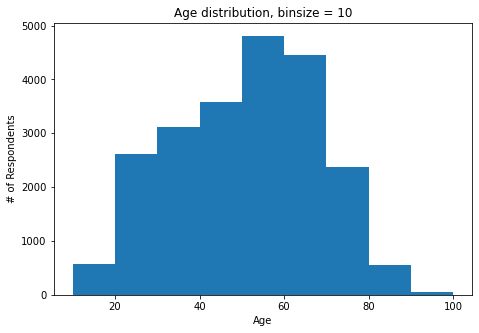

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (7.5,5))
ax.hist(df.age,
        bins = np.arange(10,101,10))
ax.set_title('Age distribution, binsize = 10')
ax.set_ylabel('# of Respondents')
ax.set_xlabel('Age');

**Observation**
  *  The age distribution is centered around 50, which is also the mean and contains the median value 52.
  *  Right tailed with small amount of respondents in the 90-100 range.
  *  High number of young respondents also making it more skewed.

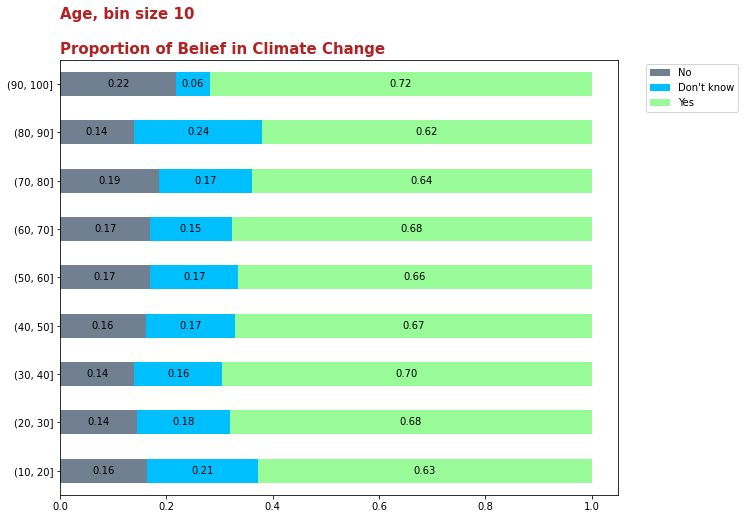

In [81]:
# graph

propgraph(pd.cut(df.age, bins = np.arange(10,101,10)),
          [pd.Interval(10, 20, closed='right'),
           pd.Interval(20, 30, closed='right'),
           pd.Interval(30, 40, closed='right'),
           pd.Interval(40, 50, closed='right'),
           pd.Interval(50, 60, closed='right'),
           pd.Interval(60, 70, closed='right'),
           pd.Interval(70, 80, closed='right'),
           pd.Interval(80, 90, closed='right'),
           pd.Interval(90, 100, closed='right')],
          "Age, bin size 10")

**Observations**
  *  Each age group has a majority of respondents believing in global warming
  *  `20-30` and `30-40` are some of the strongest believers on average
  *  `50-60` was the most popular age bracket for the survey and is one of the softer groups for believing in climate change.

#### `age_category`
**Computed from `age` as a range**

In [82]:
list(df.age_category.unique())

['55+ years', '35-54 years', '18-34 years']

The computed ranges.

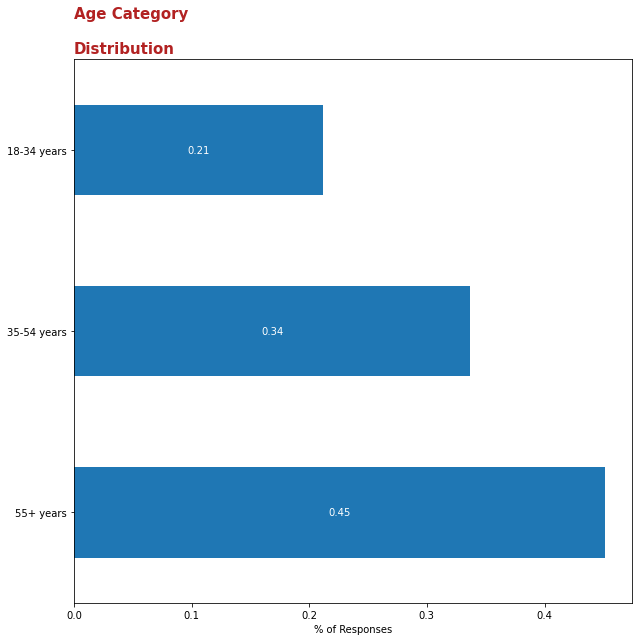

In [83]:
distgraph('age_category',
          df.age_category.unique(),
          'Age Category')

**Observation**
  *  A plurality of respondents are in the 55+ category
  *  The youngest age group is the least represented in the survey

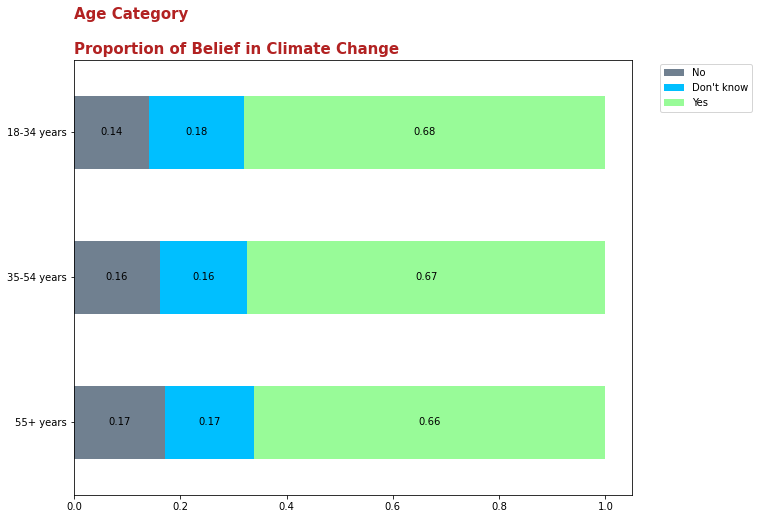

In [84]:
propgraph('age_category',
          ['55+ years','35-54 years','18-34 years'],
          'Age Category')

**Observation**
  *  All three age categories have similar belief proportions.

In [85]:
# dummify age_category and drop 18-34 years as an option
df = df.join(pd.get_dummies(df.age_category, prefix='age_category', 
                            drop_first=True))

# rename the new dummy columns to represent their value
df.rename(columns = {df.columns[-2]:'age_category_35_54', 
                     df.columns[-1]: 'age_category_55_plus'}, 
          inplace=True)

#drop age_category
df.drop('age_category', axis=1, inplace=True)

# VILO's Features

### Creating Dummies from my features and target

In [86]:
df2 = df[['generation', 'educ', 'educ_category', 'income', 'income_category',
          'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
          'registered_voter', 'region9', 'region4']]

In [87]:
df2_dum = pd.get_dummies(df2)

In [88]:
dum_happen = pd.get_dummies(df['happening'])

In [89]:
dummies = pd.concat([df2_dum, dum_happen], axis=1)

### Looking at the top correlated features with answering yes to 'happening'

In [90]:
top_corr1 = pd.DataFrame(dummies.corr().sort_values(by='Yes', ascending=False)['Yes'][:11])
top_corr_neg = pd.DataFrame(dummies.corr().sort_values(by='Yes')['Yes'][:12])

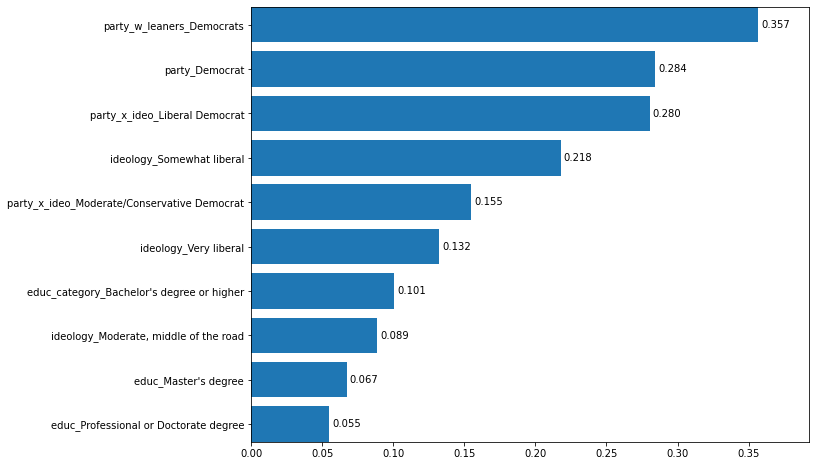

In [91]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(top_corr1.index[::-1][:-1],
        width = top_corr1.Yes.values[::-1][:-1])

# label each bar
ax.bar_label(ax.containers[0],
                fmt="%.3f",
               padding = 3)
plt.margins(x=0.1, y=0);

**Observation**
  *  Global warming remains politically charged with Liberal and Democrat being among the highest correlated values.

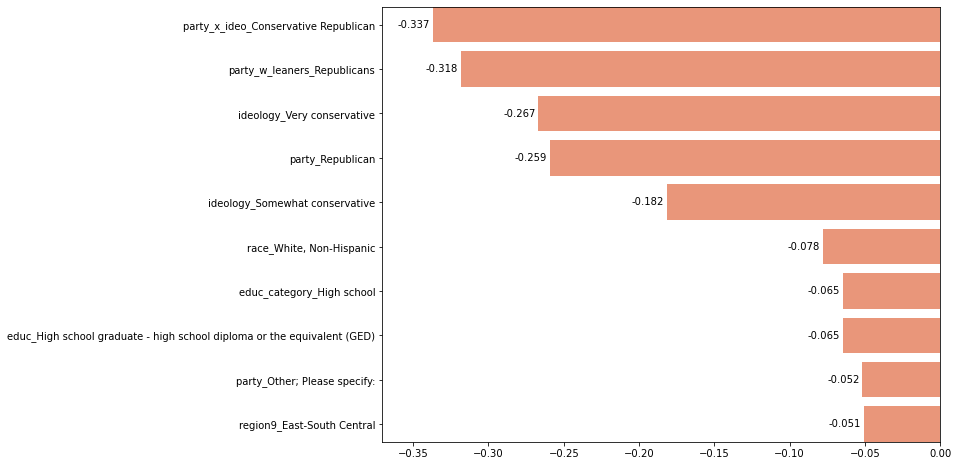

In [92]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(top_corr_neg.index[::-1][:-2],
        width = top_corr_neg.Yes.values[::-1][:-2],
        color = 'darksalmon')

# label each bar
ax.bar_label(ax.containers[0],
                fmt="%.3f",
               padding = 3)
plt.margins(x=0.1, y=0);

As noted before, political lean dominates the correlation with Republican and Conservative leading

### Review Variables

#### `Generation`
**Computed based on respondents’ age at the time of data collection**

In [93]:
df['generation'].value_counts(normalize=True)

Baby Boomers (1946 - 1964)    0.409430
Generation X (1965 - 1980)    0.240812
Millennials (1981 - 1996)     0.182541
Silent (1928 - 1945)          0.147688
iGen‎/Gen Z (1997 - )         0.012612
Greatest (Before 1928)        0.006917
Name: generation, dtype: float64

Value Options

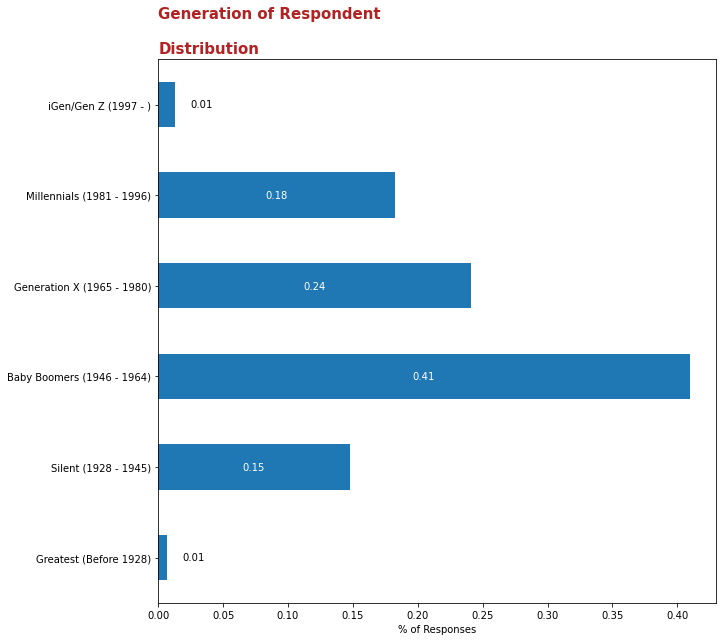

In [94]:
gen_order = ['Greatest (Before 1928)',
           'Silent (1928 - 1945)',
           'Baby Boomers (1946 - 1964)',
           'Generation X (1965 - 1980)',
           'Millennials (1981 - 1996)',
           'iGen‎/Gen Z (1997 - )']

distgraph('generation',gen_order,'Generation of Respondent')

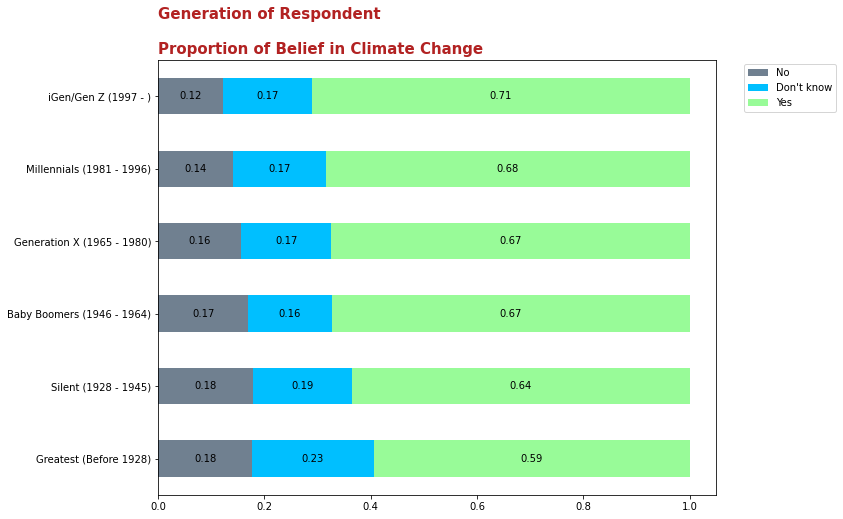

In [95]:
propgraph('generation',
         gen_order,
          'Generation of Respondent')

**Observation**
  *  Baby Boomers compose 41% of the respondents
  *  As generations age, the conviction toward global warming existing decreases

#### `educ`
**What is the highest level of school you have completed?**

In [96]:
df['educ'].value_counts(normalize=True)

High school graduate - high school diploma or the equivalent (GED)    0.281136
Some college, no degree                                               0.208038
Bachelor's degree                                                     0.200036
Master's degree                                                       0.105782
Associate's degree                                                    0.087609
Professional or Doctorate degree                                      0.039646
12th grade no diploma                                                 0.021970
11th grade                                                            0.019755
10th grade                                                            0.014285
9th grade                                                             0.008544
7th or 8th grade                                                      0.008182
5th or 6th grade                                                      0.002486
1st, 2nd, 3rd, or 4th grade                         

Value Options

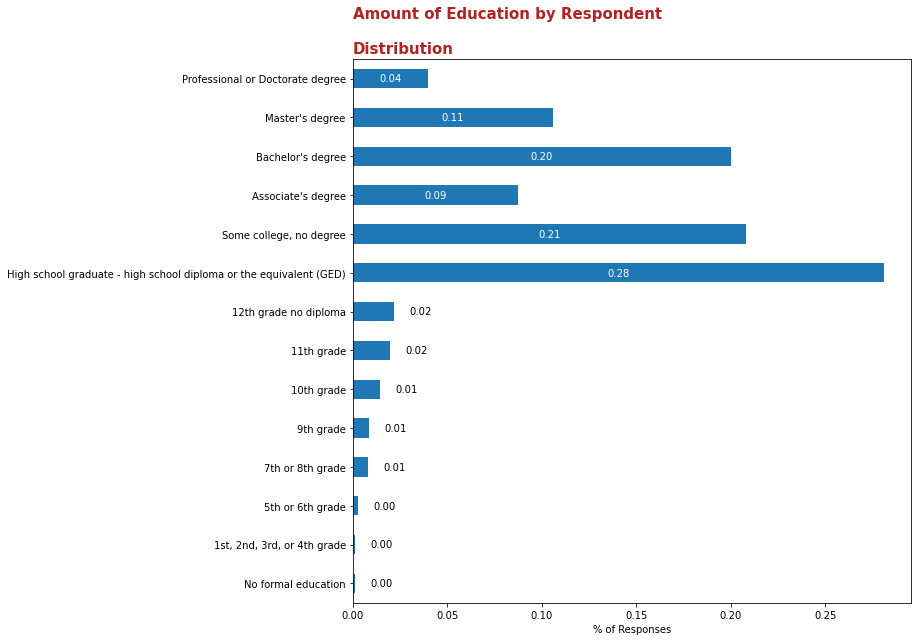

In [97]:
educ_order = ['No formal education',
         '1st, 2nd, 3rd, or 4th grade',
         '5th or 6th grade',
         '7th or 8th grade',
         '9th grade',
         '10th grade',
         '11th grade',
         '12th grade no diploma',
         'High school graduate - high school diploma or the equivalent (GED)',
         'Some college, no degree',
         "Associate's degree",
         "Bachelor's degree",
         "Master's degree",
         'Professional or Doctorate degree']

distgraph('educ',
          educ_order,
          'Amount of Education by Respondent')

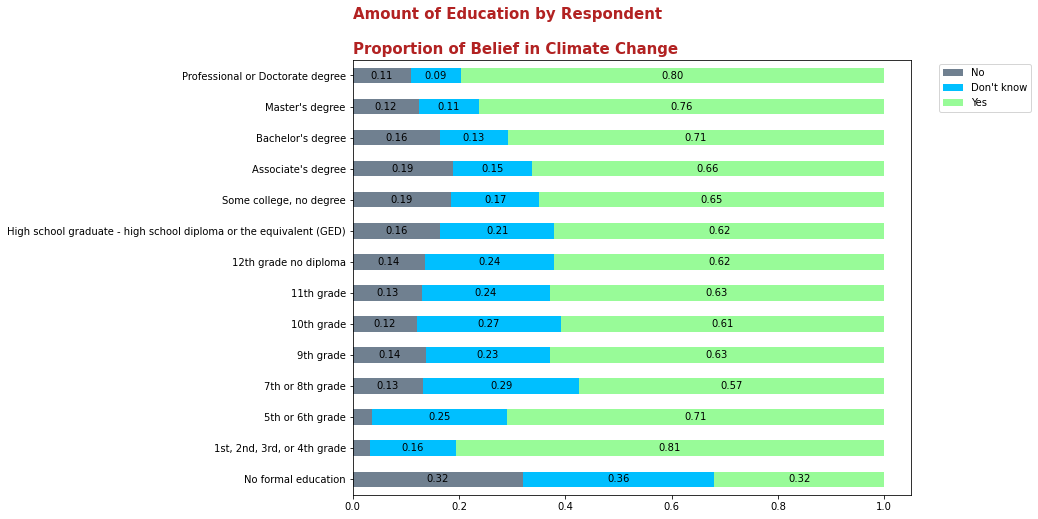

In [98]:
propgraph('educ',
            educ_order,
         'Amount of Education by Respondent')

The variation by amount of education isn't that stark. `12th grade no diploma` still has a majority believing in global warming. Because there is a grouped version of this variable that will encapsulate these changes across education level, drop this.

In [99]:
# Uninteresting. Drop.
df.drop('educ',
       axis = 1,
       inplace=True)

#### `educ_category`
**Generated**

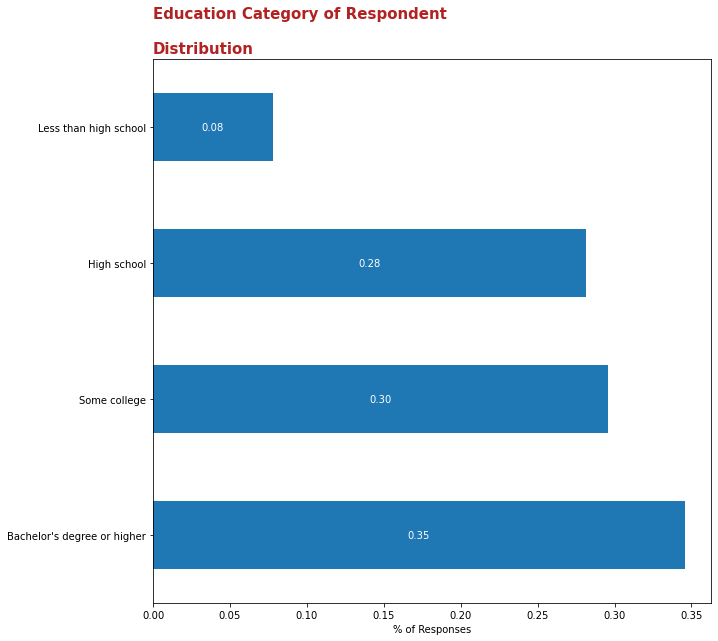

In [100]:
edcat_order=["Bachelor's degree or higher",
           'Some college',
           'High school',
           'Less than high school']

distgraph('educ_category',
          edcat_order,
          'Education Category of Respondent')

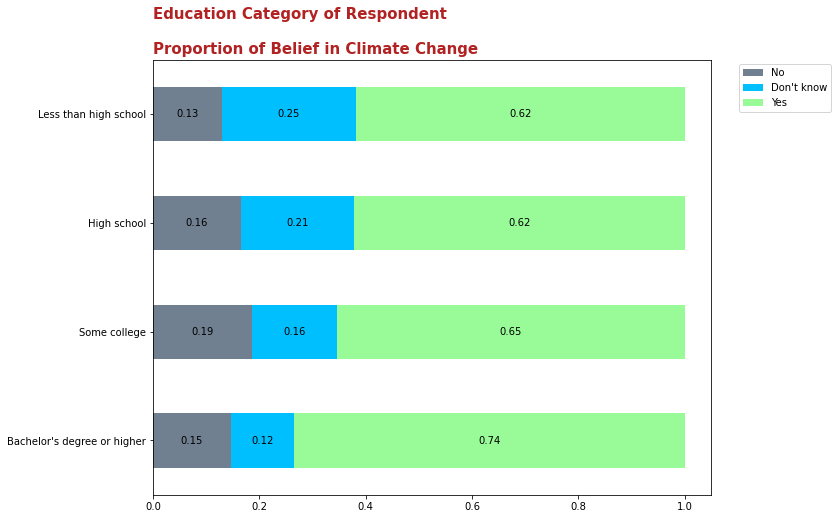

In [101]:
propgraph('educ_category',
          edcat_order,
         'Education Category of Respondent')

**Observations**
  *  Every single education level believed in global warming as a majority
  *  The education level with the highest share of non-believers was `Some College`

#### `income`
**We would like to get a better estimate of your total HOUSEHOLD income in the past 12 months before taxes. Was it...**

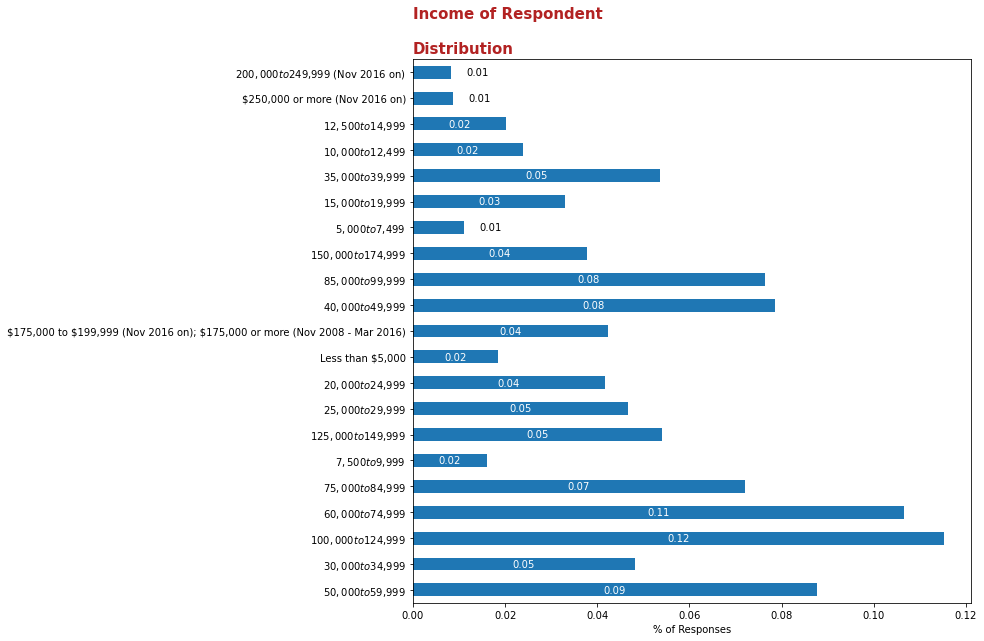

In [102]:
distgraph('income',
          df.income.unique(),
          'Income of Respondent')

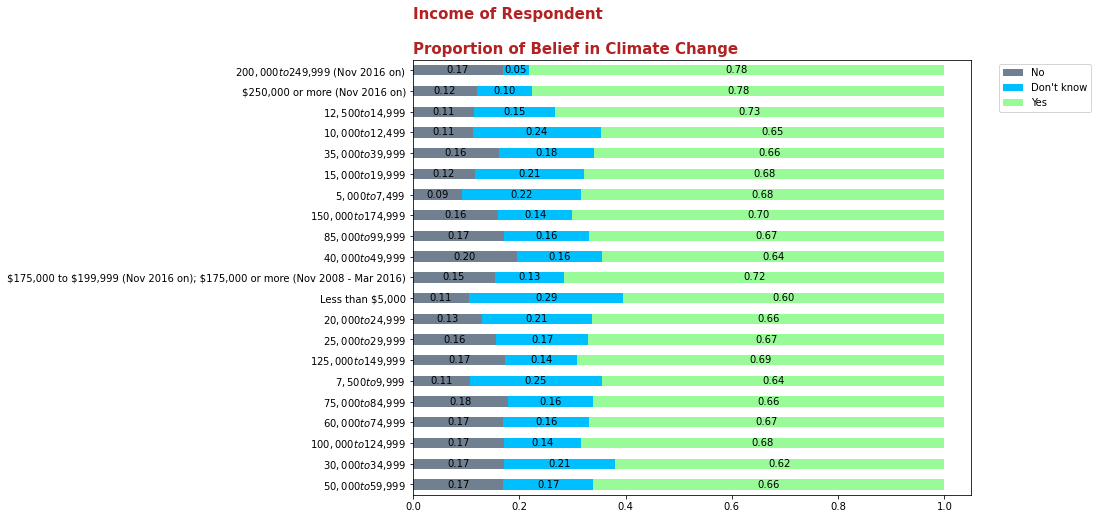

In [103]:
propgraph('income',
          df.income.unique(),
         'Income of Respondent')

This feature is summarized later in the `income_category` feature. For this reason drop.

In [104]:
# Uninteresting. Drop.
df.drop('income',
       axis = 1,
       inplace=True)

#### `income_category`
**Grouped**

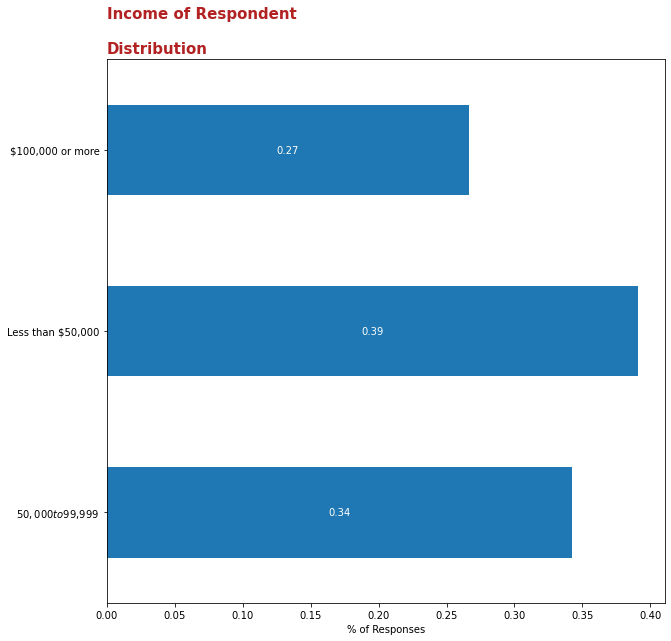

In [105]:
distgraph('income_category',
          df.income_category.unique(),
         'Income of Respondent')

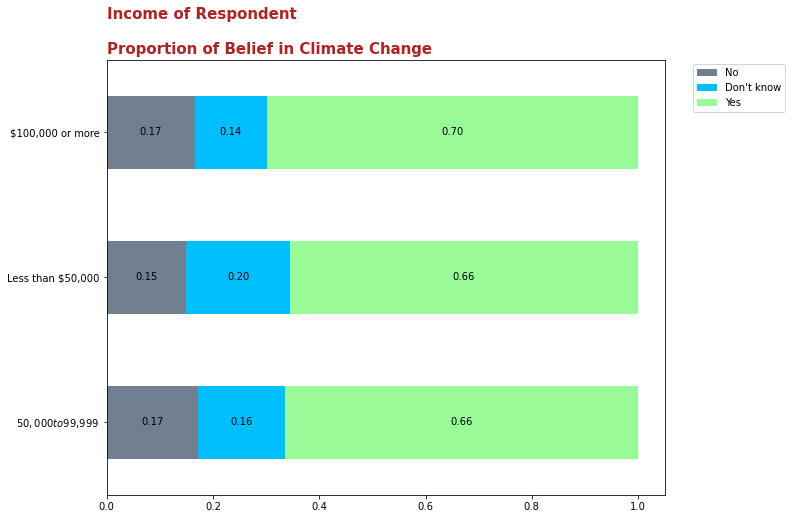

In [106]:
propgraph('income_category',
          df.income_category.unique(),
         'Income of Respondent')

**Observation**
  *  The highest income group had the highest rate of belief in global warming

#### `race`

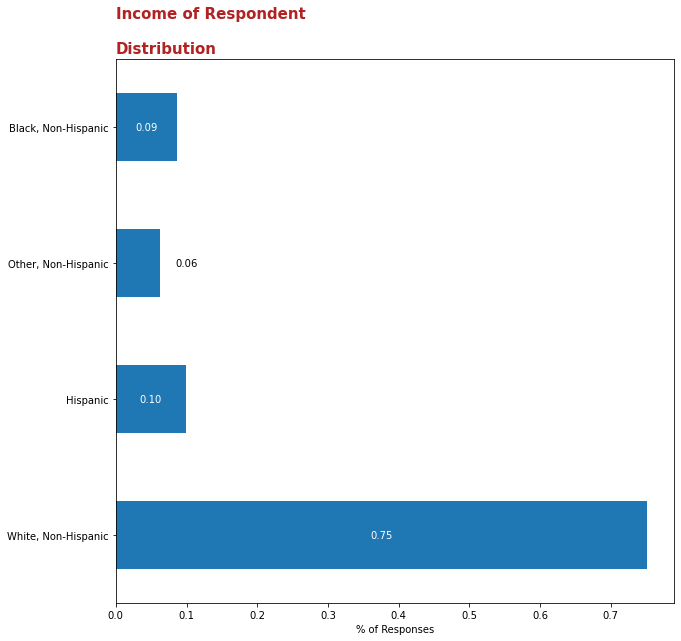

In [107]:
distgraph('race',
         df.race.unique(),
         'Income of Respondent')

For the purposes of this analysis, race will not be considered due to the absence of wave_weight and weight_aggregate in our modeling and discussion.

In [108]:
# Uninteresting. Drop.
df.drop('race',
       axis = 1,
       inplace=True)

#### `ideology`
**In general, do you think of yourself as...**

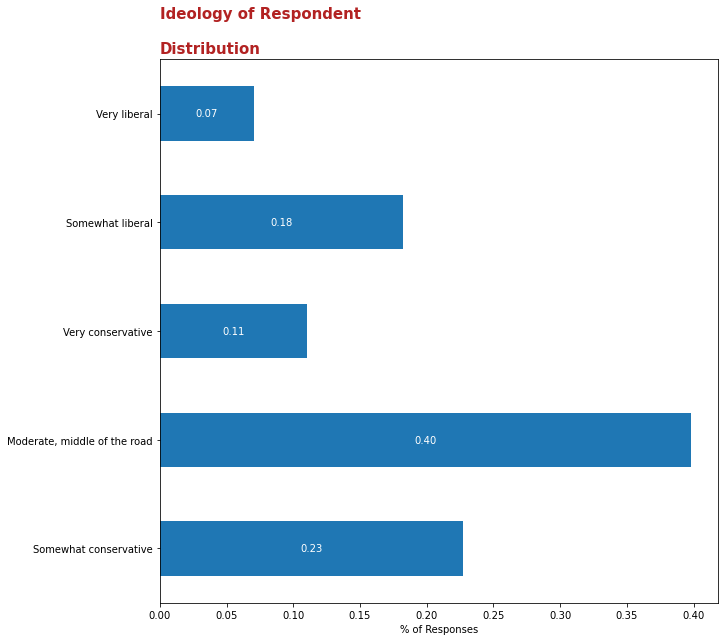

In [109]:
distgraph('ideology',
         df.ideology.unique()[:-1],
         'Ideology of Respondent')

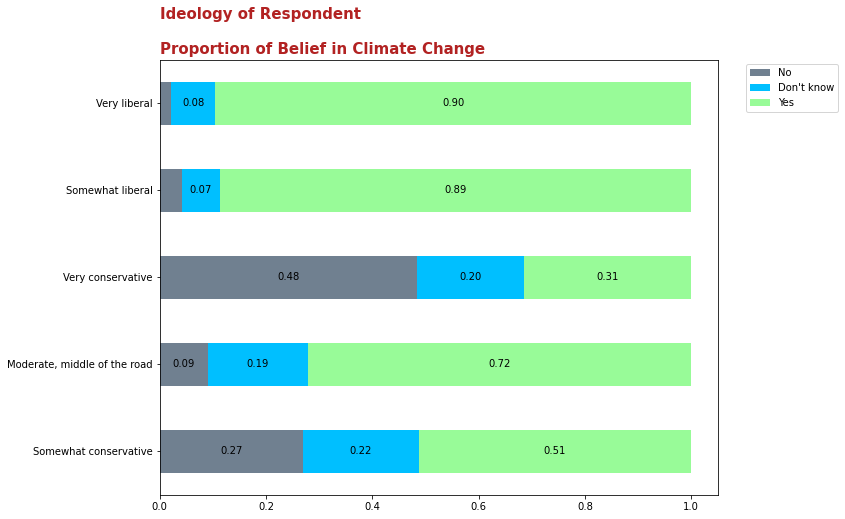

In [110]:

propgraph('ideology',
         df.ideology.unique()[:-1],
         'Ideology of Respondent')

In the context of the United States, this question seems duplicative with the `party` feature below. Drop.

In [111]:
# Uninteresting. Drop.
df.drop('ideology',
       axis = 1,
       inplace=True)

#### `party`
**Generally speaking, do you think of yourself as a...**

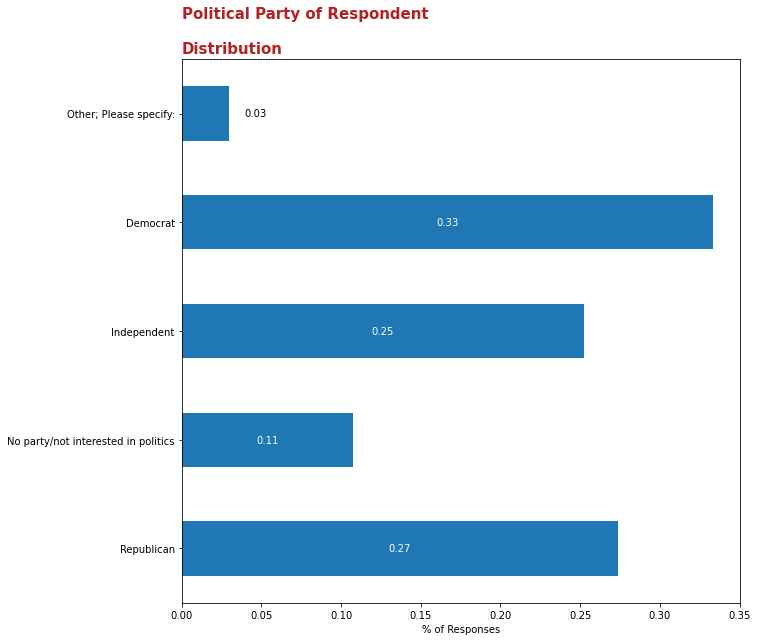

In [112]:
distgraph('party',
         df.party.unique()[:-1],
         'Political Party of Respondent')

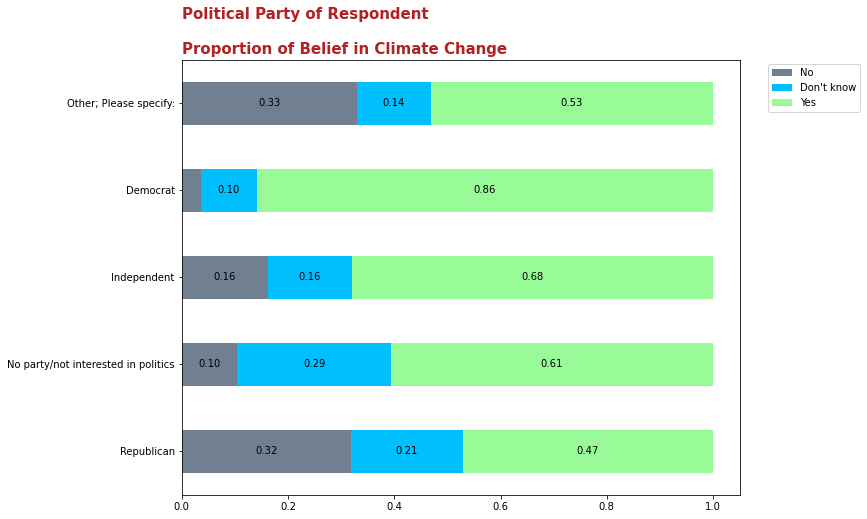

In [113]:
propgraph('party',df.party.unique()[:-1], 'Political Party of Respondent')

**Observations**
  *  Democrats have the largest proportion of respondents who believe global warming is happening
  *  Republican and Other have the largest proportion of respondents who don't believe global warming is happening
  *  The two major political parties occupy the two largest groups, independent is not far behind Republican

#### `party_w_leaners`
**Computed based on responses to “party” and a follow-up question “Do you think of yourself as closer to the…” with four response options, “Republican Party,” “Democratic Party,” “Neither,” or “No response.”**

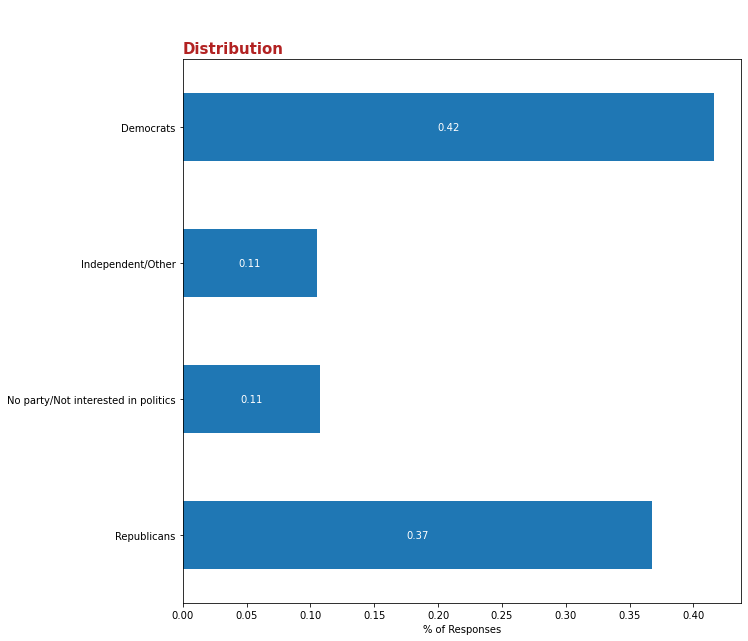

In [114]:
distgraph('party_w_leaners',
         df.party_w_leaners.unique()[:-1],
         '')

There isn't too much of a difference here between the distribution of `party_w_leaners` and `party'. Drop.

In [115]:
# Uninteresting. Drop.
df.drop('party_w_leaners',
       axis = 1,
       inplace=True)

#### `party_x_ideo`
**Generated**

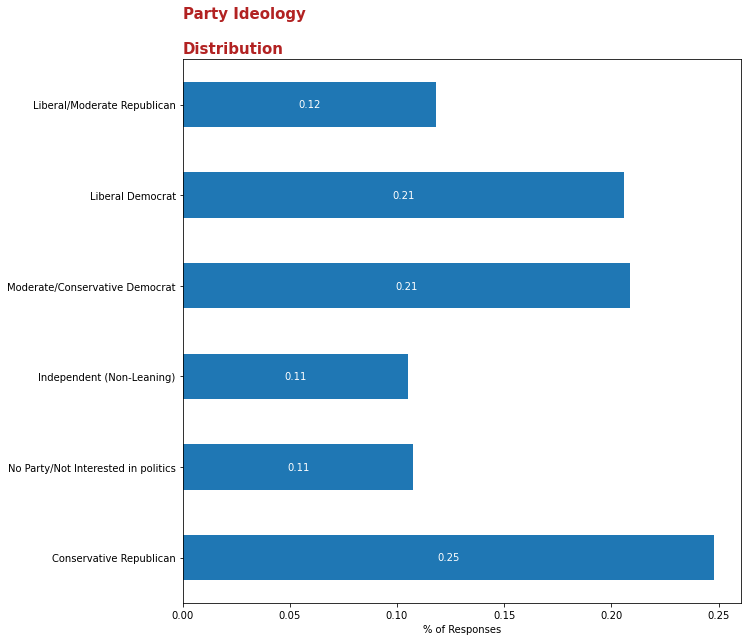

In [116]:
distgraph('party_x_ideo',
         df.party_x_ideo.unique()[:-1],
         'Party Ideology')

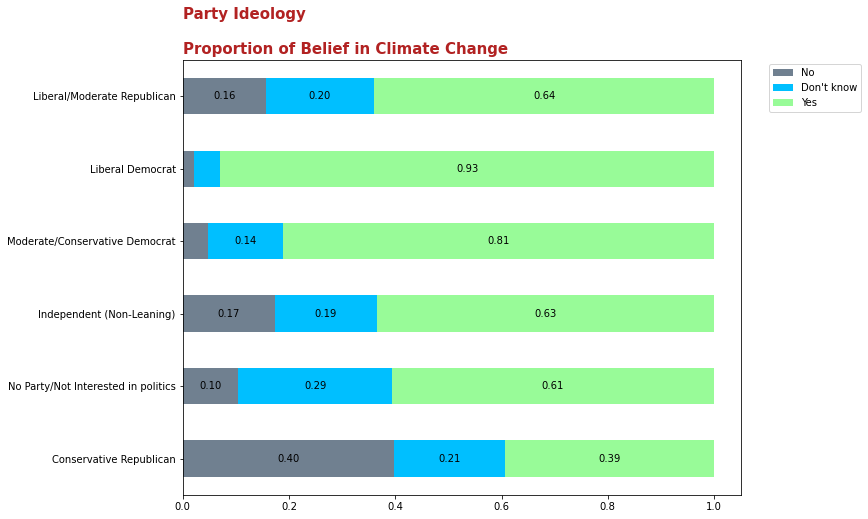

In [117]:
propgraph('party_x_ideo', df.party_x_ideo.unique()[:-1],'Party Ideology')

**Observation**
  *  There are varying degrees of conviction for the happening of global warming across a party. However, democrats of any kind still lead the way in terms of proportion of belief in climate change.

#### `registered_voter`
**Are you currently registered to vote, or not**

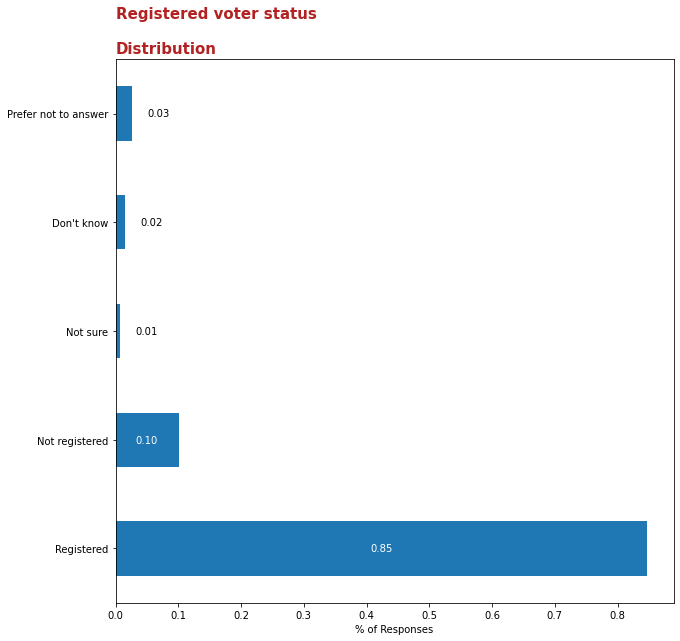

In [118]:
distgraph('registered_voter',
         df[~df.registered_voter.isnull()].registered_voter.unique(),
         'Registered voter status')

Too high of a density for `Registered`

In [119]:
# Uninteresting. Drop.
df.drop('registered_voter',
       axis = 1,
       inplace=True)

#### `region9`
**Computed based on state of residence**

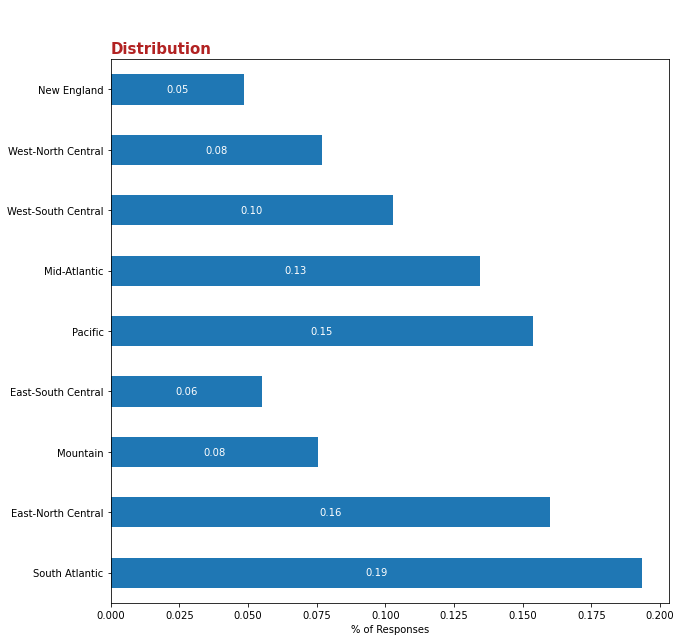

In [120]:
distgraph('region9',
         df.region9.unique(),
         '')

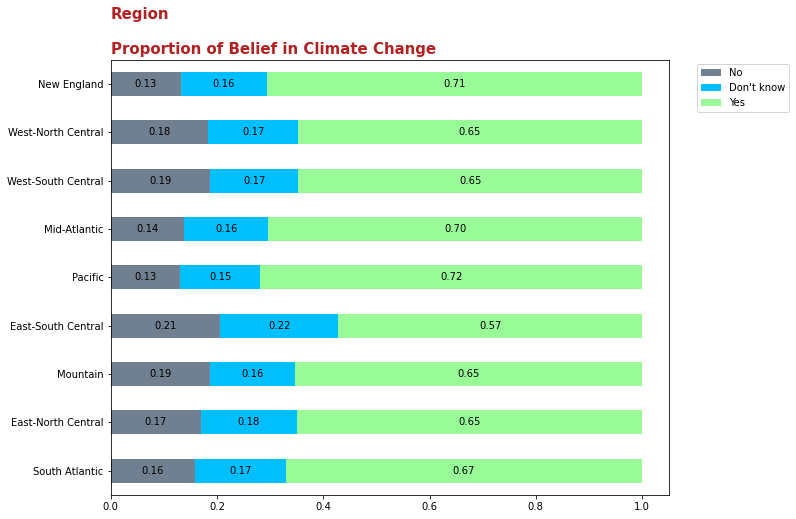

In [121]:
propgraph('region9', df.region9.unique(), 'Region')

**Observations**
  *  Every single region has a majority of respondents who believe in global warming.

`Region4` is a condensed version of `Region9`. Use that instead of this one.

In [122]:
# Drop.
df.drop('region9',
       axis = 1,
       inplace=True)

#### `region4`

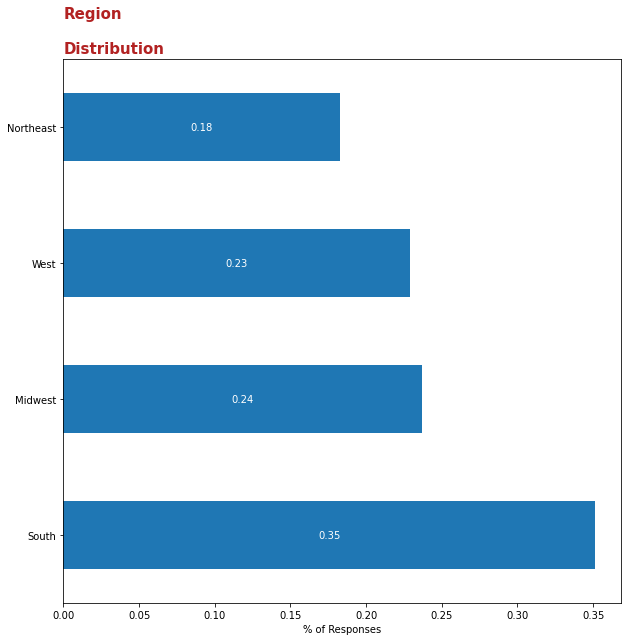

In [123]:
distgraph('region4',
         df.region4.unique(),
         'Region')

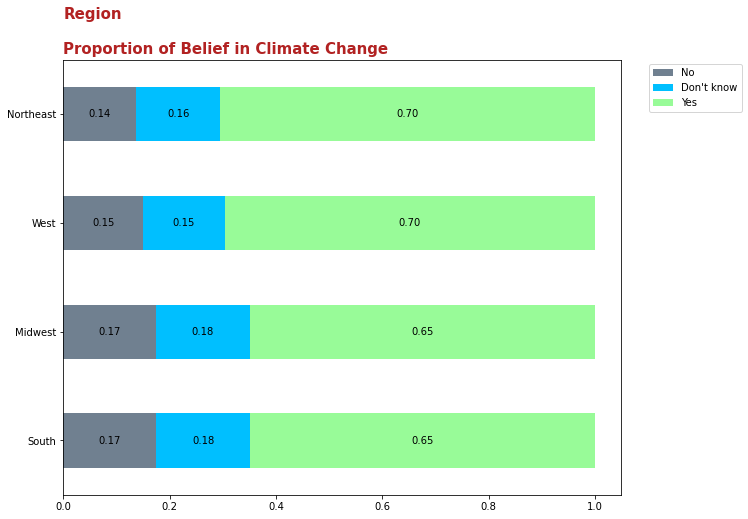

In [124]:
propgraph('region4', df.region4.unique(), 'Region')

**Observations**
  *  Coastal areas (`Northeast` and `West`) believe in global warming more on average than `South` and `Midwest`

### Recommendations for features to use in modeling

 * It appears that the group of people that feel most strongly about whether or not global warming is happening appears to be politically affiliated. We see the strongest change between majority 'yes' or majority 'no' to weather global warming is happening is seen with people affiliated with the Democratic and Republican party respectively as well as differing ideologies. 

* Education and income have been grouped in categories that are more normally distributed and will be useful for use in modeling.


* There is some variation in belief of global warming depending on the generation they were born in. It would be good to use this feature within our model.


* Region4 is an aggregated feature based on region9 locations. The more normalized region4 would be a good feature to use in the model as well

### Most interesting features:


- generation
- educ_category
- income_category
- party
- party_x_ideo
- region4

# Saba

### Feature Investigation

#### `Religion`
**What is your religion?**

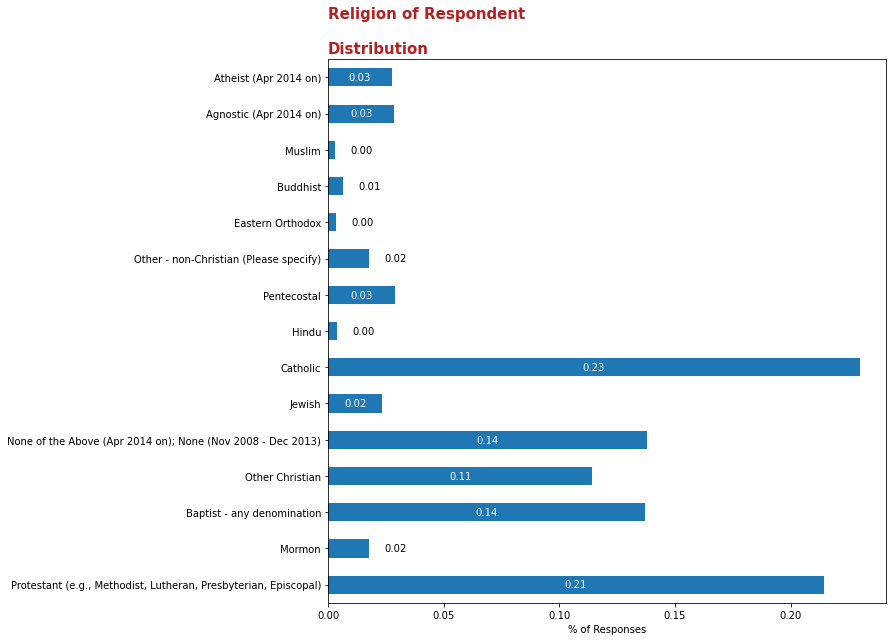

In [125]:
distgraph('religion',
         df[~df.religion.isnull()].religion.unique(),
         'Religion of Respondent')

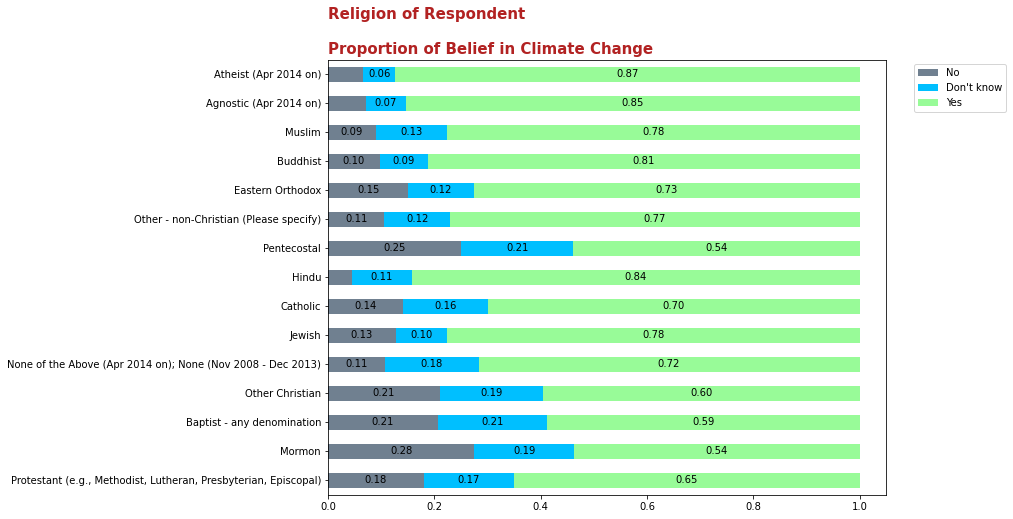

In [126]:
propgraph('religion',
         df[~df.religion.isnull()].religion.unique(),
         'Religion of Respondent')


- **This graph represents the believers in climate change across religions.** 
- **The numbers vary due to different population of respective religion people** 
- **As expected for American society Catholic and Protestant have highest number of counts followed by Atheists and Baptists**

#### `evangelical`
**Would you describe yourself as "born-again" or evangelical?**

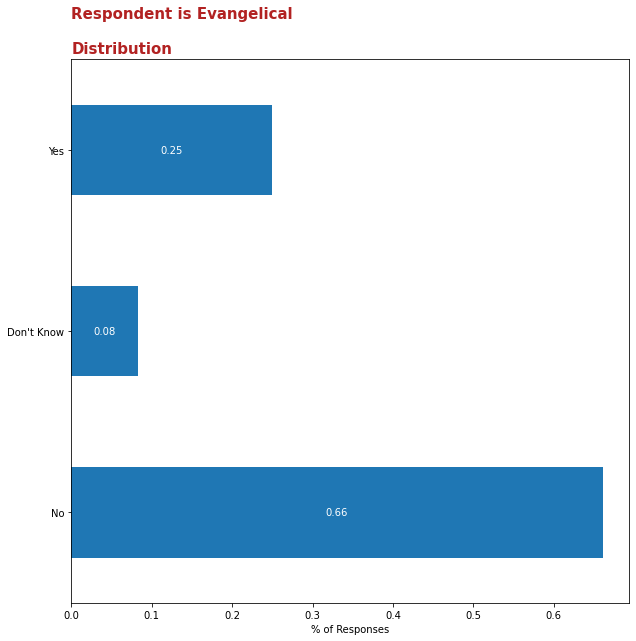

In [127]:
distgraph('evangelical',
         df[~df.evangelical.isnull()].evangelical.unique(),
         'Respondent is Evangelical')

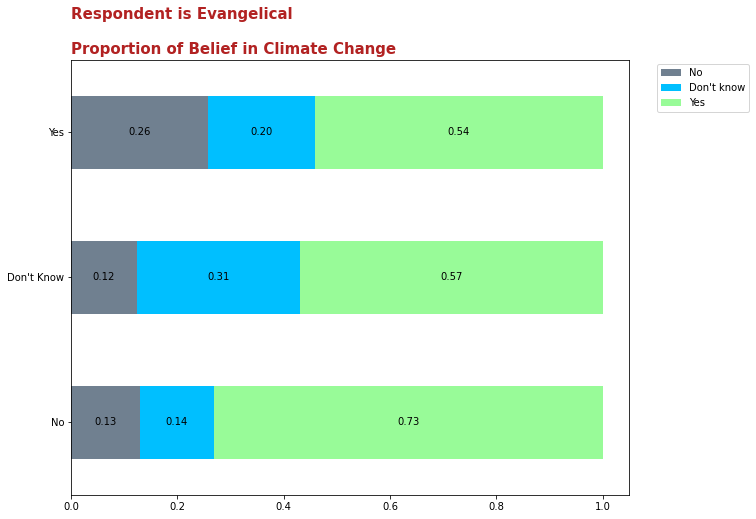

In [128]:
propgraph('evangelical',
         df[~df.evangelical.isnull()].evangelical.unique(),
         'Respondent is Evangelical')

**People who said Yes to being evangelical or refused to answer whether they are evangelical have a higher proportion of people not accepting climate change**

In [129]:
# boring drop it
df.drop('evangelical', axis=1, inplace=True)

#### `service_attendance`
**How often do you attend religious services?**

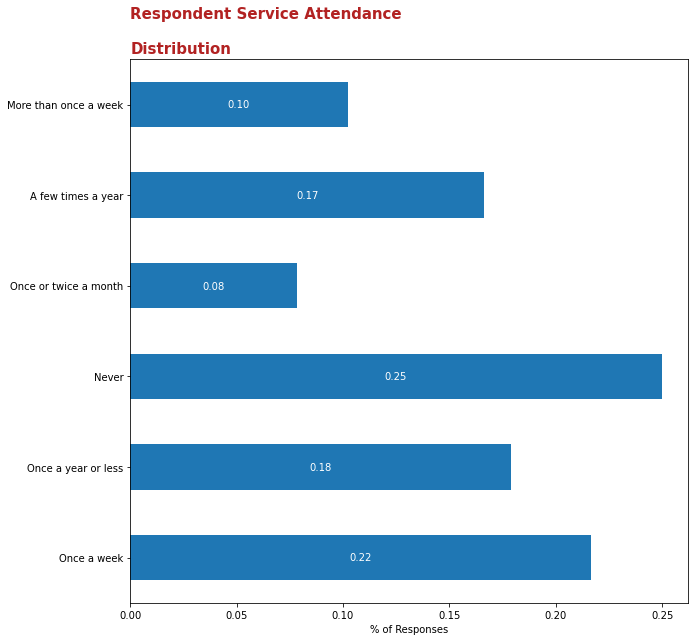

In [130]:
distgraph('service_attendance',
         df[~df.service_attendance.isnull()].service_attendance.unique(),
         'Respondent Service Attendance')

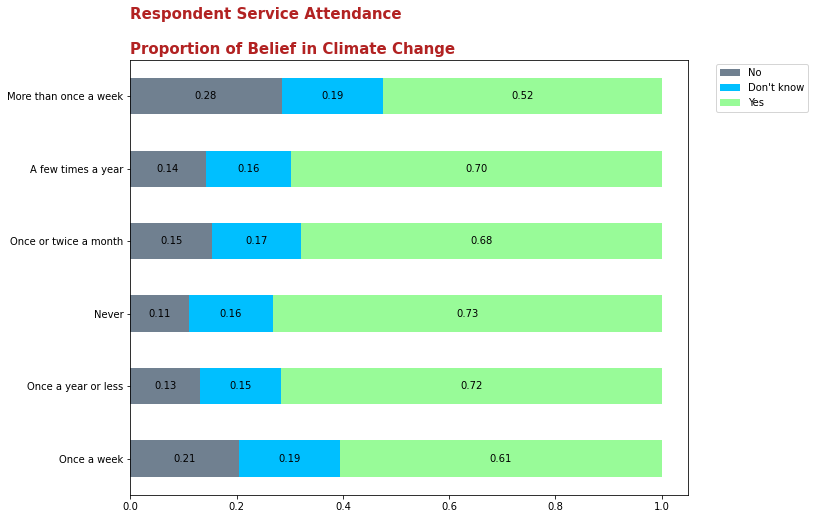

In [131]:
propgraph('service_attendance',
         df[~df.service_attendance.isnull()].service_attendance.unique(),
         'Respondent Service Attendance')

**People who go for service attendance for more than once a week and once a week have a higher proportion of people refusing to believe in climate change compared to all people in that particular label of service attendance**

In [132]:
#mapping values to the ordinal variable representing religiosity
service_attendance_di = {'Never': 1,
                   'Once a week': 5,
                   'Once a year or less': 2,
                   'A few times a year': 3,
                   'More than once a week':6,
                   'Once or twice a month':4,
                   np.nan:-1,
                        }
df.service_attendance= df['service_attendance'].map(lambda x: service_attendance_di[x])


#### `marit_status`

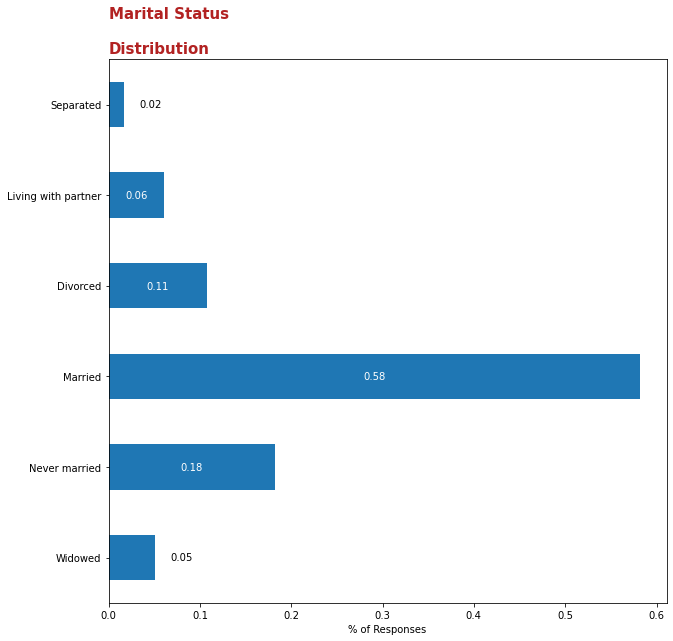

In [133]:
distgraph('marit_status',
         df[~df.marit_status.isnull()].marit_status.unique(),
         'Marital Status')

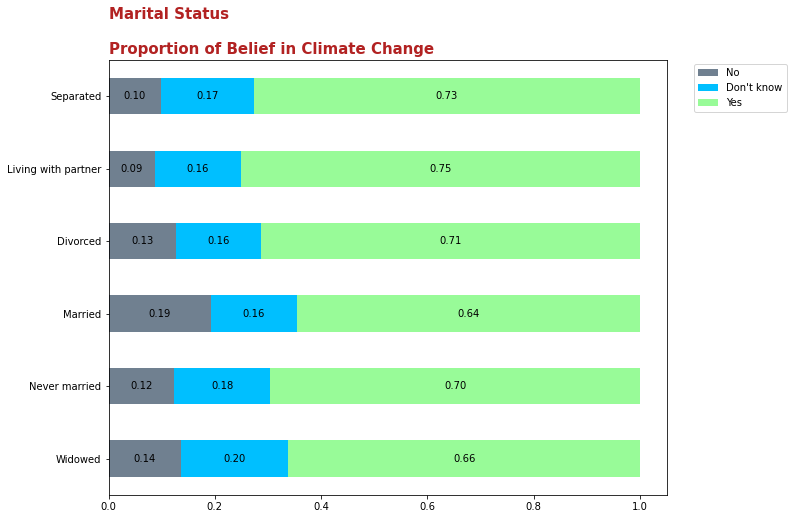

In [134]:
propgraph('marit_status',
         df[~df.marit_status.isnull()].marit_status.unique(),
         'Marital Status')

**This graph represents the distribution of`happening` across various marital status.**

#### `employment`
**Do any of the following currently describe you?**

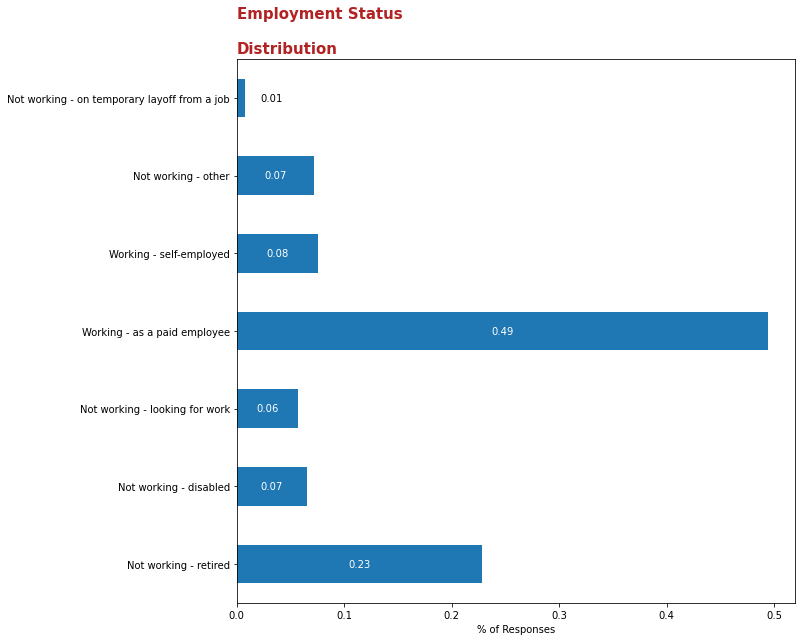

In [135]:
distgraph('employment',
         df[~df.employment.isnull()].employment.unique(),
         'Employment Status')

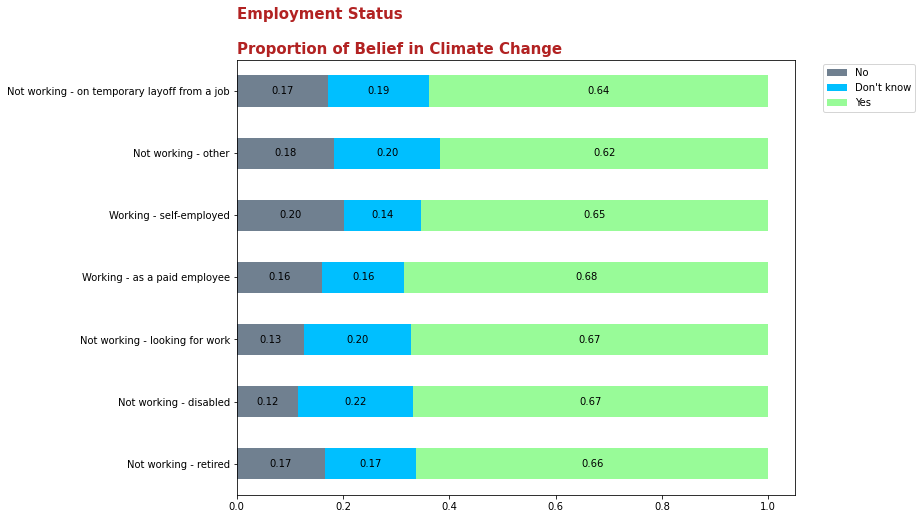

In [136]:
propgraph('employment',
         df[~df.employment.isnull()].employment.unique(),
         'Employment Status')

**This graph represents the distribution of`happening` across various employments.Seems like Retired people have a higher proportion of people not accepting climate change**

#### `house_head`
**Question worded to determine if person's house is in their name"

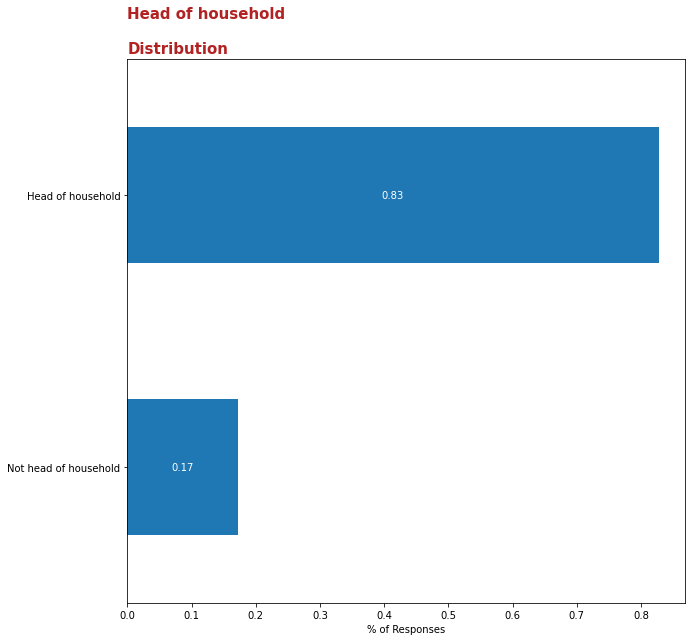

In [137]:
distgraph('house_head',
         df[~df.house_head.isnull()].house_head.unique(),
         'Head of household')

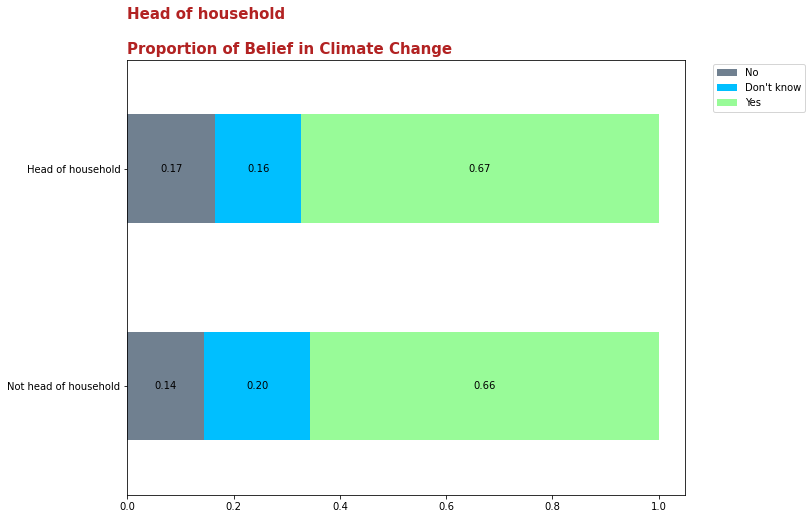

In [138]:
propgraph('house_head',
         df[~df.house_head.isnull()].house_head.unique(),
         'Head of household')

**This graph represents the distribution of`happening` vs house heads status. Majority of those surveyed seem to own a household**

#### `house_size`
**How many persons are living in your home**

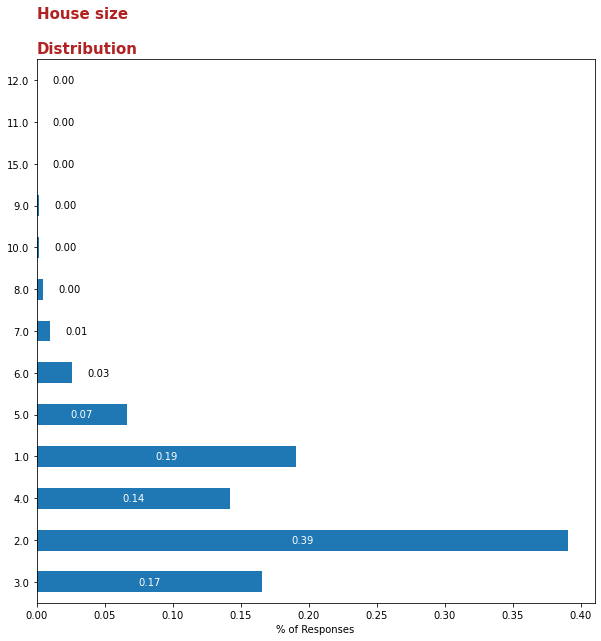

In [139]:
distgraph('house_size',
         df[~df.house_size.isnull()].house_size.unique(),
         'House size')

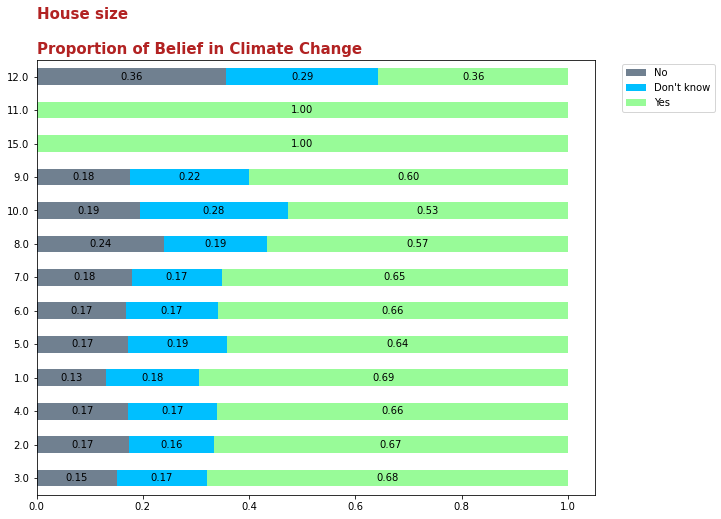

In [140]:
propgraph('house_size',
         df[~df.house_size.isnull()].house_size.unique(),
         'House size')

**This graph represents the distribution of`happening` vs house size.** 

#### `children`

Before diving into the specifics of the children in each house, create a new feature called `children` that sums the amount of children ages--also known as someone under 18.

In [141]:
df['children'] =df['house_ages0to1']+df['house_ages2to5']+df['house_ages6to12']+df['house_ages13to17']

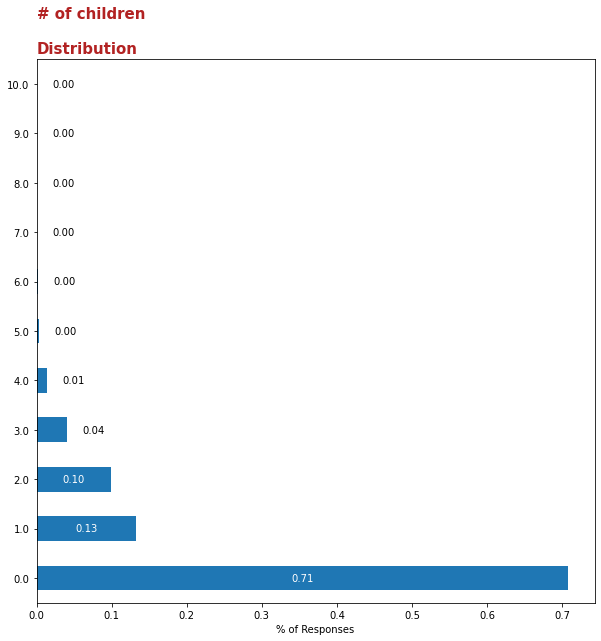

In [142]:
child_sort = df[~df.children.isnull()].children.unique()
child_sort.sort()

distgraph('children',
         child_sort,
         '# of children')

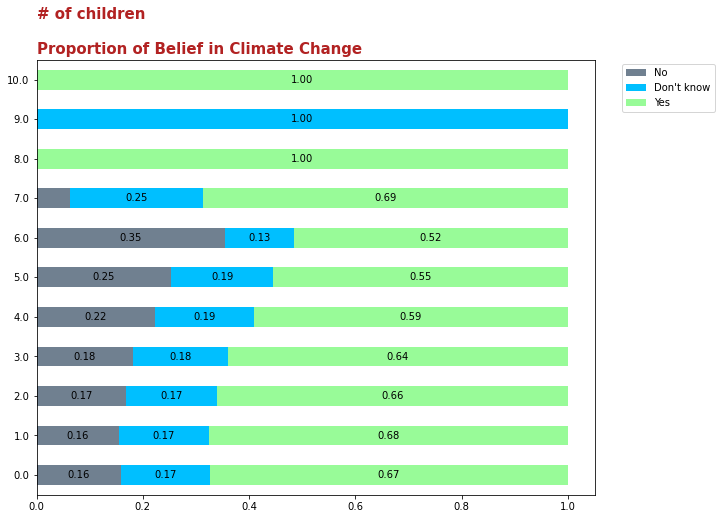

In [143]:
propgraph('children',
         child_sort,
         '# of children')

- **Seems like having more children reduces the climate awareness or that people with more climate awareness are having less children**
- **I was expecting a reverse relationship too that people having children would want to leave a better world for their children so would be more aware, I don't know the exact relationship**

#### `house_ages0to1`

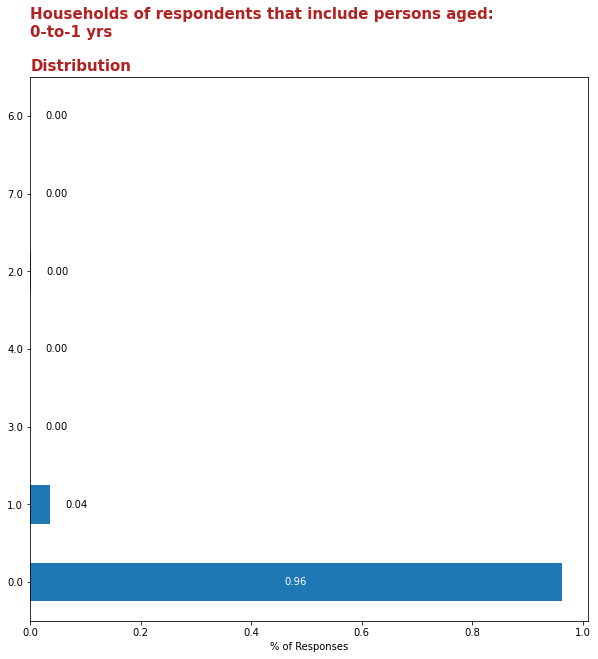

In [144]:
distgraph('house_ages0to1',
          df.house_ages0to1.unique(),
          'Households of respondents that include persons aged:\n'+
          '0-to-1 yrs')

**Observation**
  *  96% of households did not have a 0-to-1 year old. This is too high of a concentration. Drop this column.

In [145]:
# drop it
df.drop('house_ages0to1', axis = 1, inplace=True)

#### `house_ages2to5`

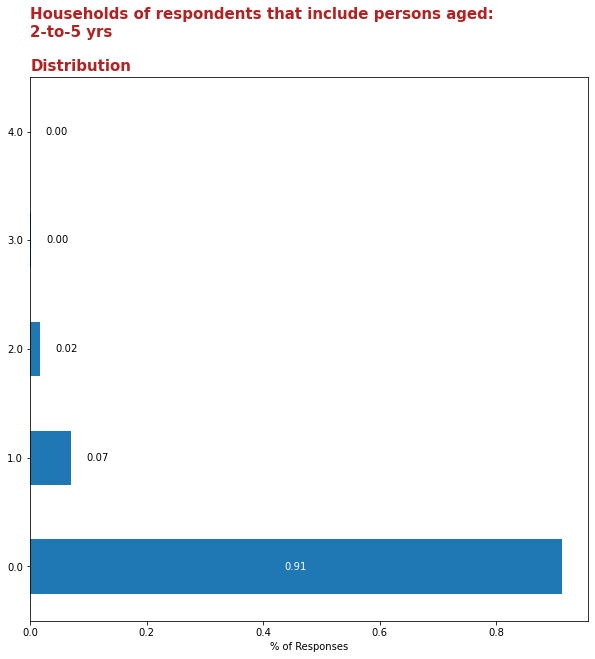

In [146]:
distgraph('house_ages2to5',
          df.house_ages2to5.unique(),
          'Households of respondents that include persons aged:\n'+
          '2-to-5 yrs')

**Observation**
  *  91% of households did not have a 2-to-5 year old. This is too high of a concentration. Drop this column.

In [147]:
# drop it
df.drop('house_ages2to5', axis = 1, inplace=True)

#### `house_ages6to12`

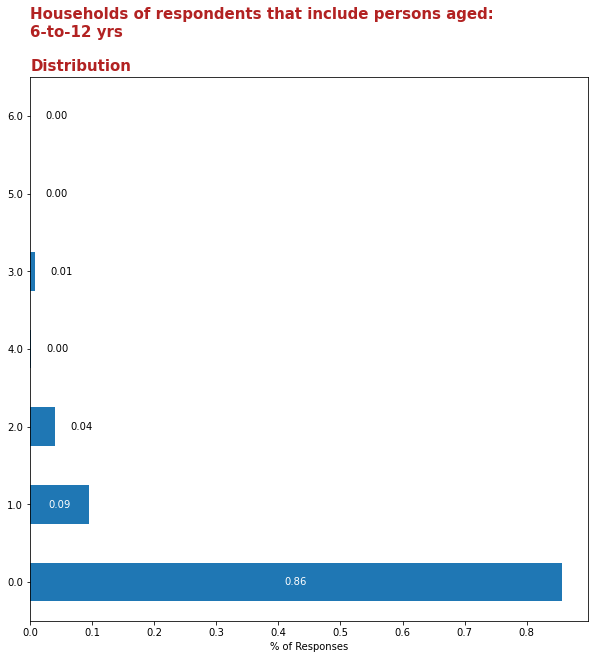

In [148]:
distgraph('house_ages6to12',
          df.house_ages6to12.unique(),
          'Households of respondents that include persons aged:\n'+
          '6-to-12 yrs')

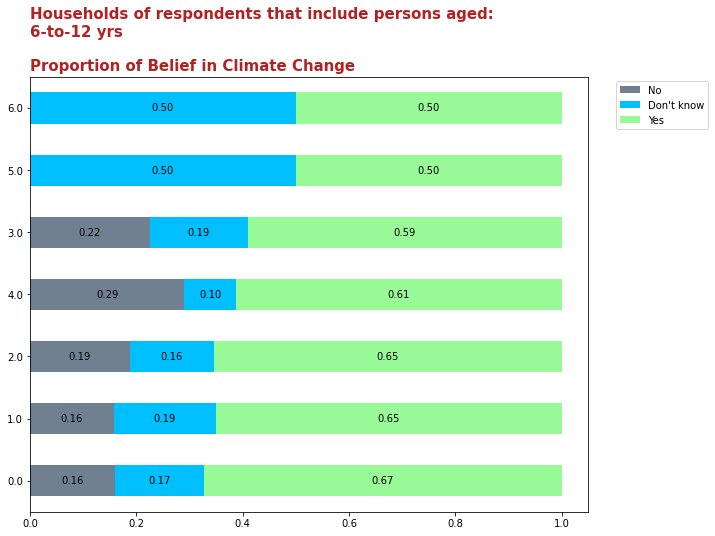

In [149]:
propgraph('house_ages6to12',
          df.house_ages6to12.unique(),
         'Households of respondents that include persons aged:\n'+
          '6-to-12 yrs')

**Observation**
  *  The amount of `Yes` does not wildly change between families with 0, 1, and 2 6-to-12 year olds. These comprised ~98% of all respondents. Drop this column.


In [150]:
# drop it
df.drop('house_ages6to12', axis = 1, inplace=True)

#### `house_ages13to17`

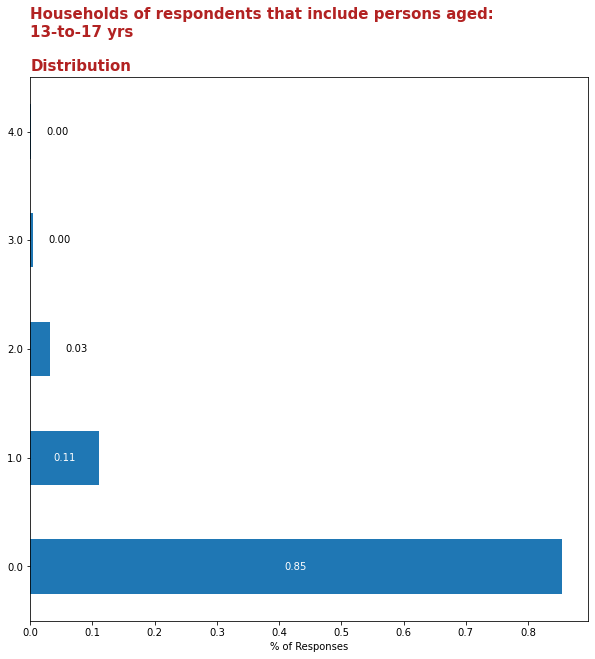

In [151]:
distgraph('house_ages13to17',
          df.house_ages13to17.unique(),
          'Households of respondents that include persons aged:\n'+
          '13-to-17 yrs')

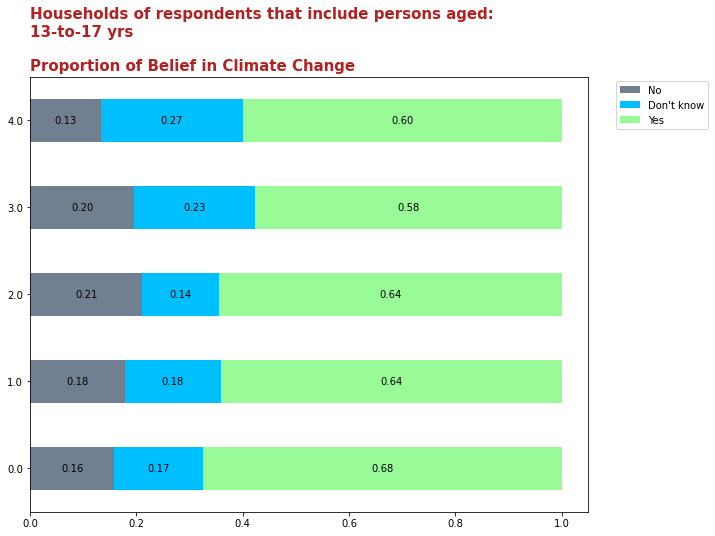

In [152]:
propgraph('house_ages13to17',
          df.house_ages13to17.unique(),
         'Households of respondents that include persons aged:\n'+
          '13-to-17 yrs')

**Observation**
  *  The amount of `Yes` does not wildly change between families with 0, 1, and 2 13-to-17 year olds. These comprised ~99% of all respondents. Drop this column.

In [153]:
# drop it
df.drop('house_ages13to17', axis = 1, inplace=True)

#### `house_ages18plus`

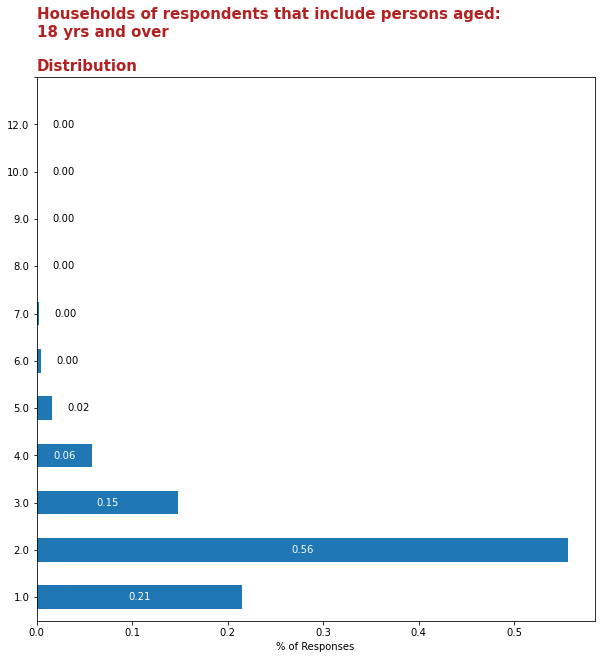

In [154]:
grphsort = q = df.house_ages18plus.unique()
grphsort.sort()


distgraph('house_ages18plus',
          grphsort,
          'Households of respondents that include persons aged:\n'+
          '18 yrs and over')
ax = plt.gca()
ax.set_yticks(range(0,12));

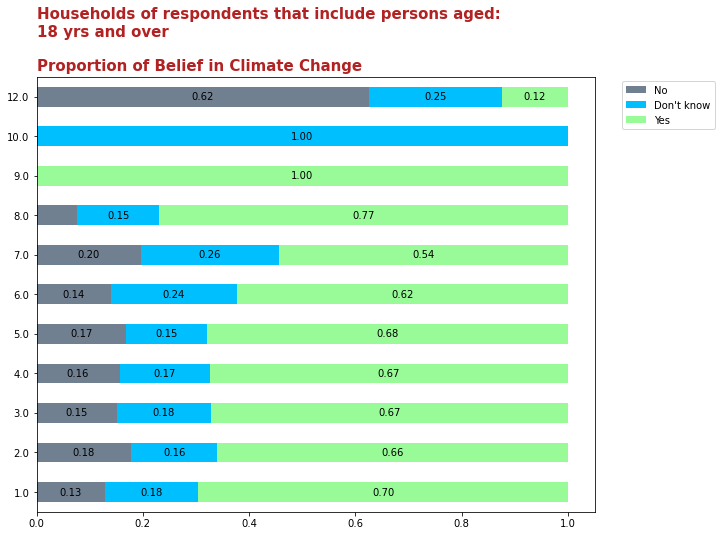

In [155]:
propgraph('house_ages18plus',
          grphsort,
         'Households of respondents that include persons aged:\n'+
          '18 yrs and over')

The number of people in a household seems to have a little effect on the proportion of belief in climate change

#### `house_type`
**Which best describes the building where you live?**

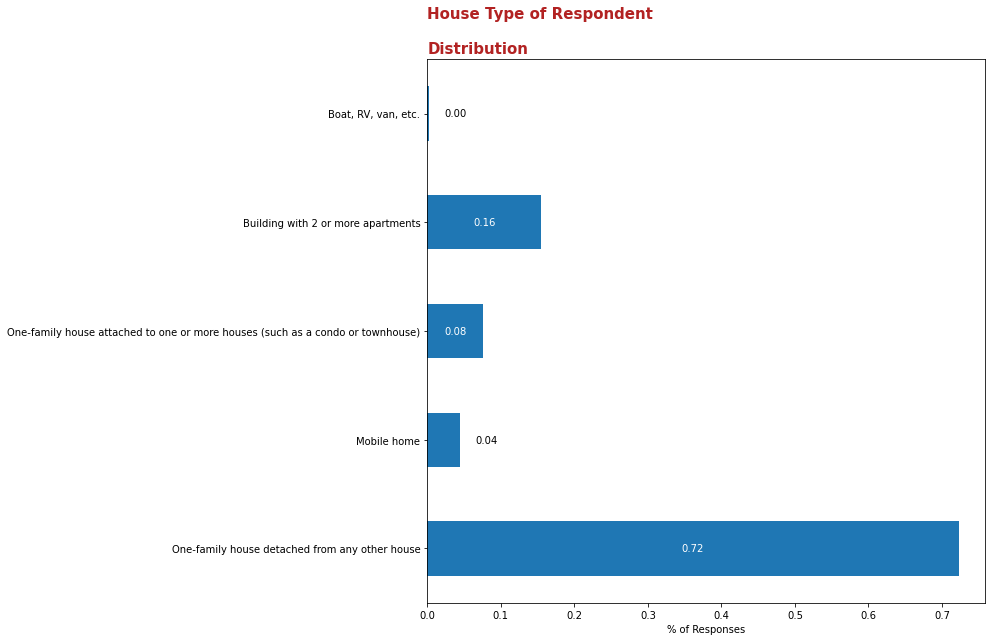

In [156]:
distgraph('house_type',
         df.house_type.unique(),
        'House Type of Respondent')

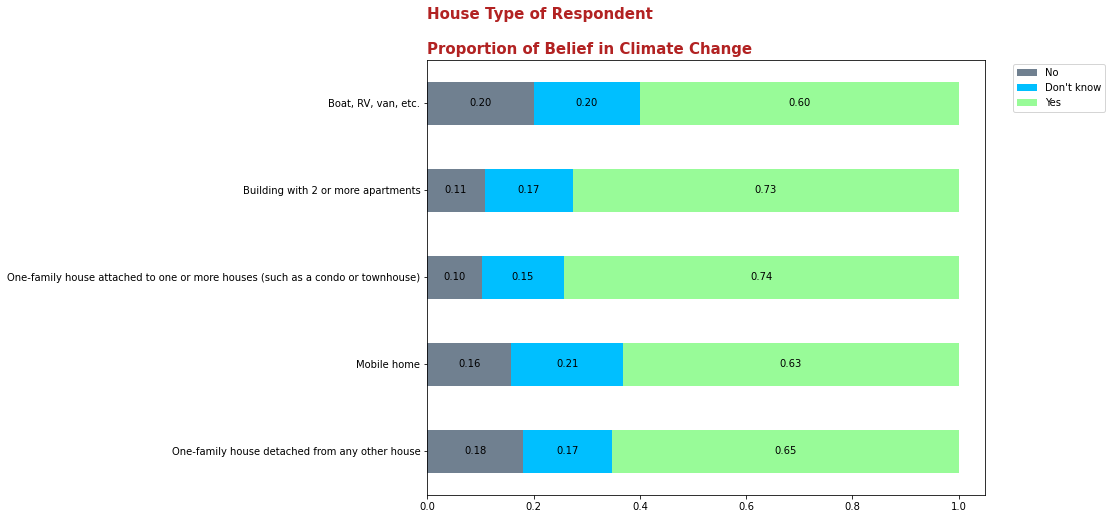

In [157]:
propgraph('house_type',
         df.house_type.unique(),
        'House Type of Respondent')


- **One family house are pre-dominant.** 
- **People with mobile homes seem to have a higher proportion of non-believers of climate change** 


#### `house_own`
**Are your living quarters…**

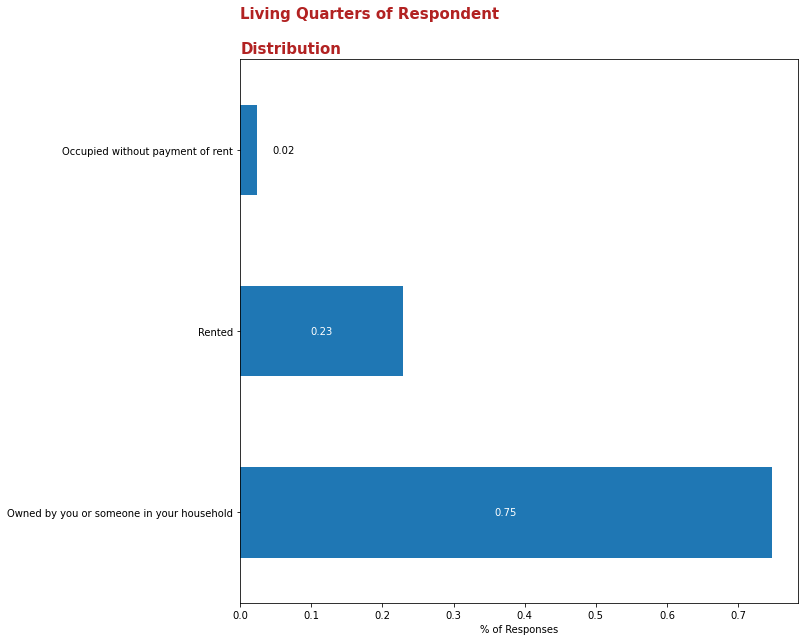

In [158]:
distgraph('house_own',
         df.house_own.unique(),
        'Living Quarters of Respondent')

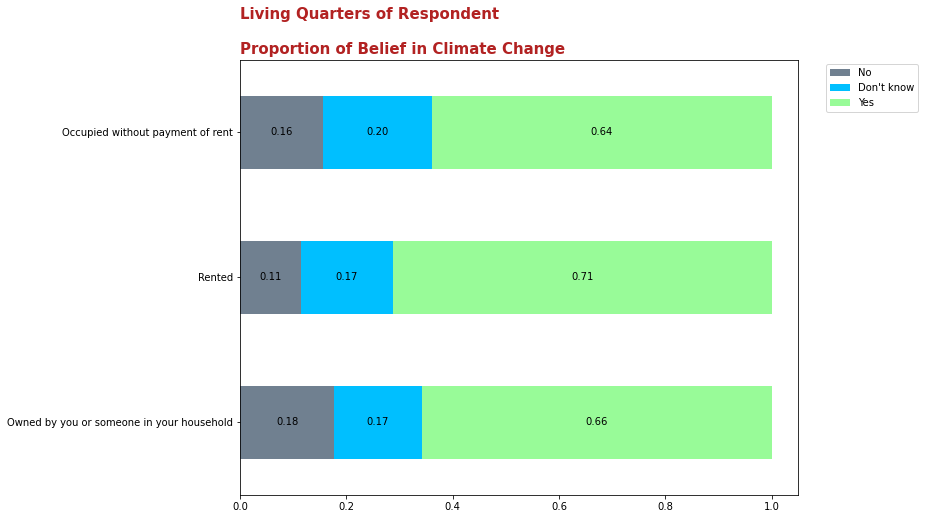

In [159]:
propgraph('house_own',
         df.house_own.unique(),
        'Living Quarters of Respondent')


- **houses owned by an individual or a family member are pre-dominant.** 


### Income Investigation

In addition to the data exploration of survey answers to the target variable `happening`, a brief investigation was done to the income of the respondents. If trying to understand which demographics to apply the findings to, this can give some insight into the types of communities that may be a closer match to our survey population (since we cannot use US population at large--see wave weight, etc.)

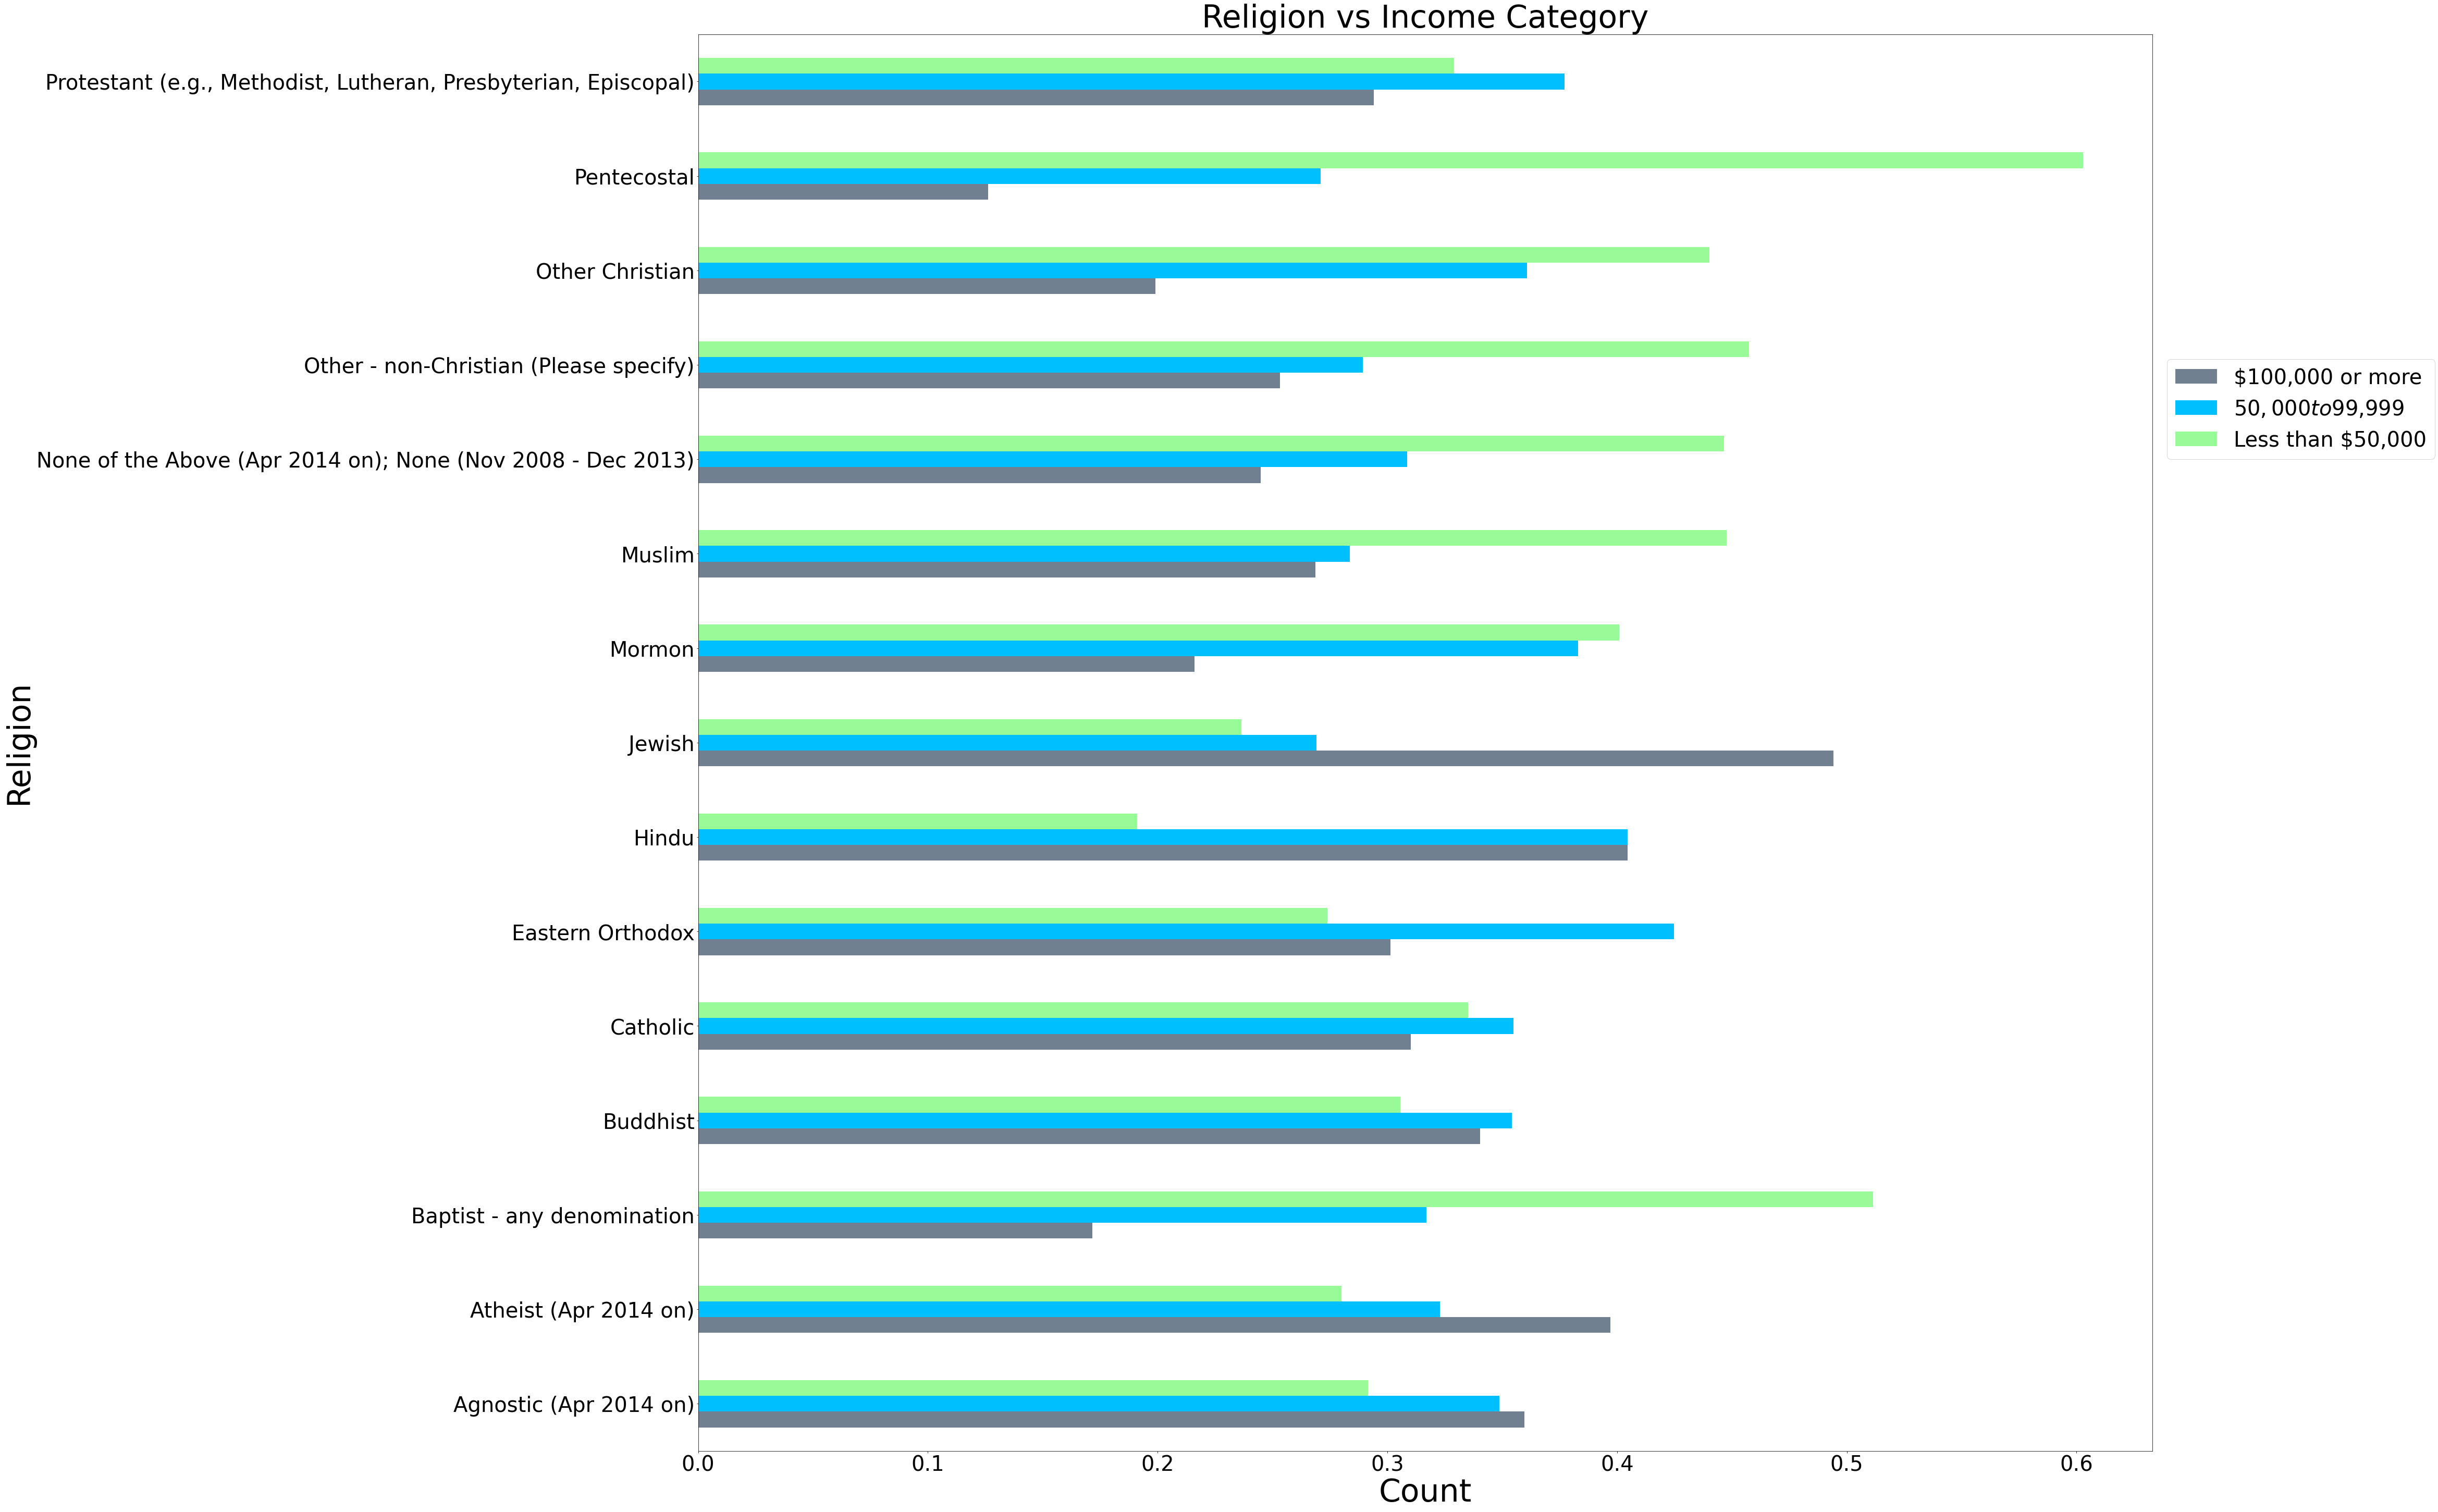

In [160]:
ax = df.groupby(['religion'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Religion',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Religion vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


- **High income category is prominent in Jewish, Atheist and Agnostic**
- **Middle income category is prominent in Protestant, Catholic, Eastern Orthodox**
- **Low Income category is predominant in all other religions**


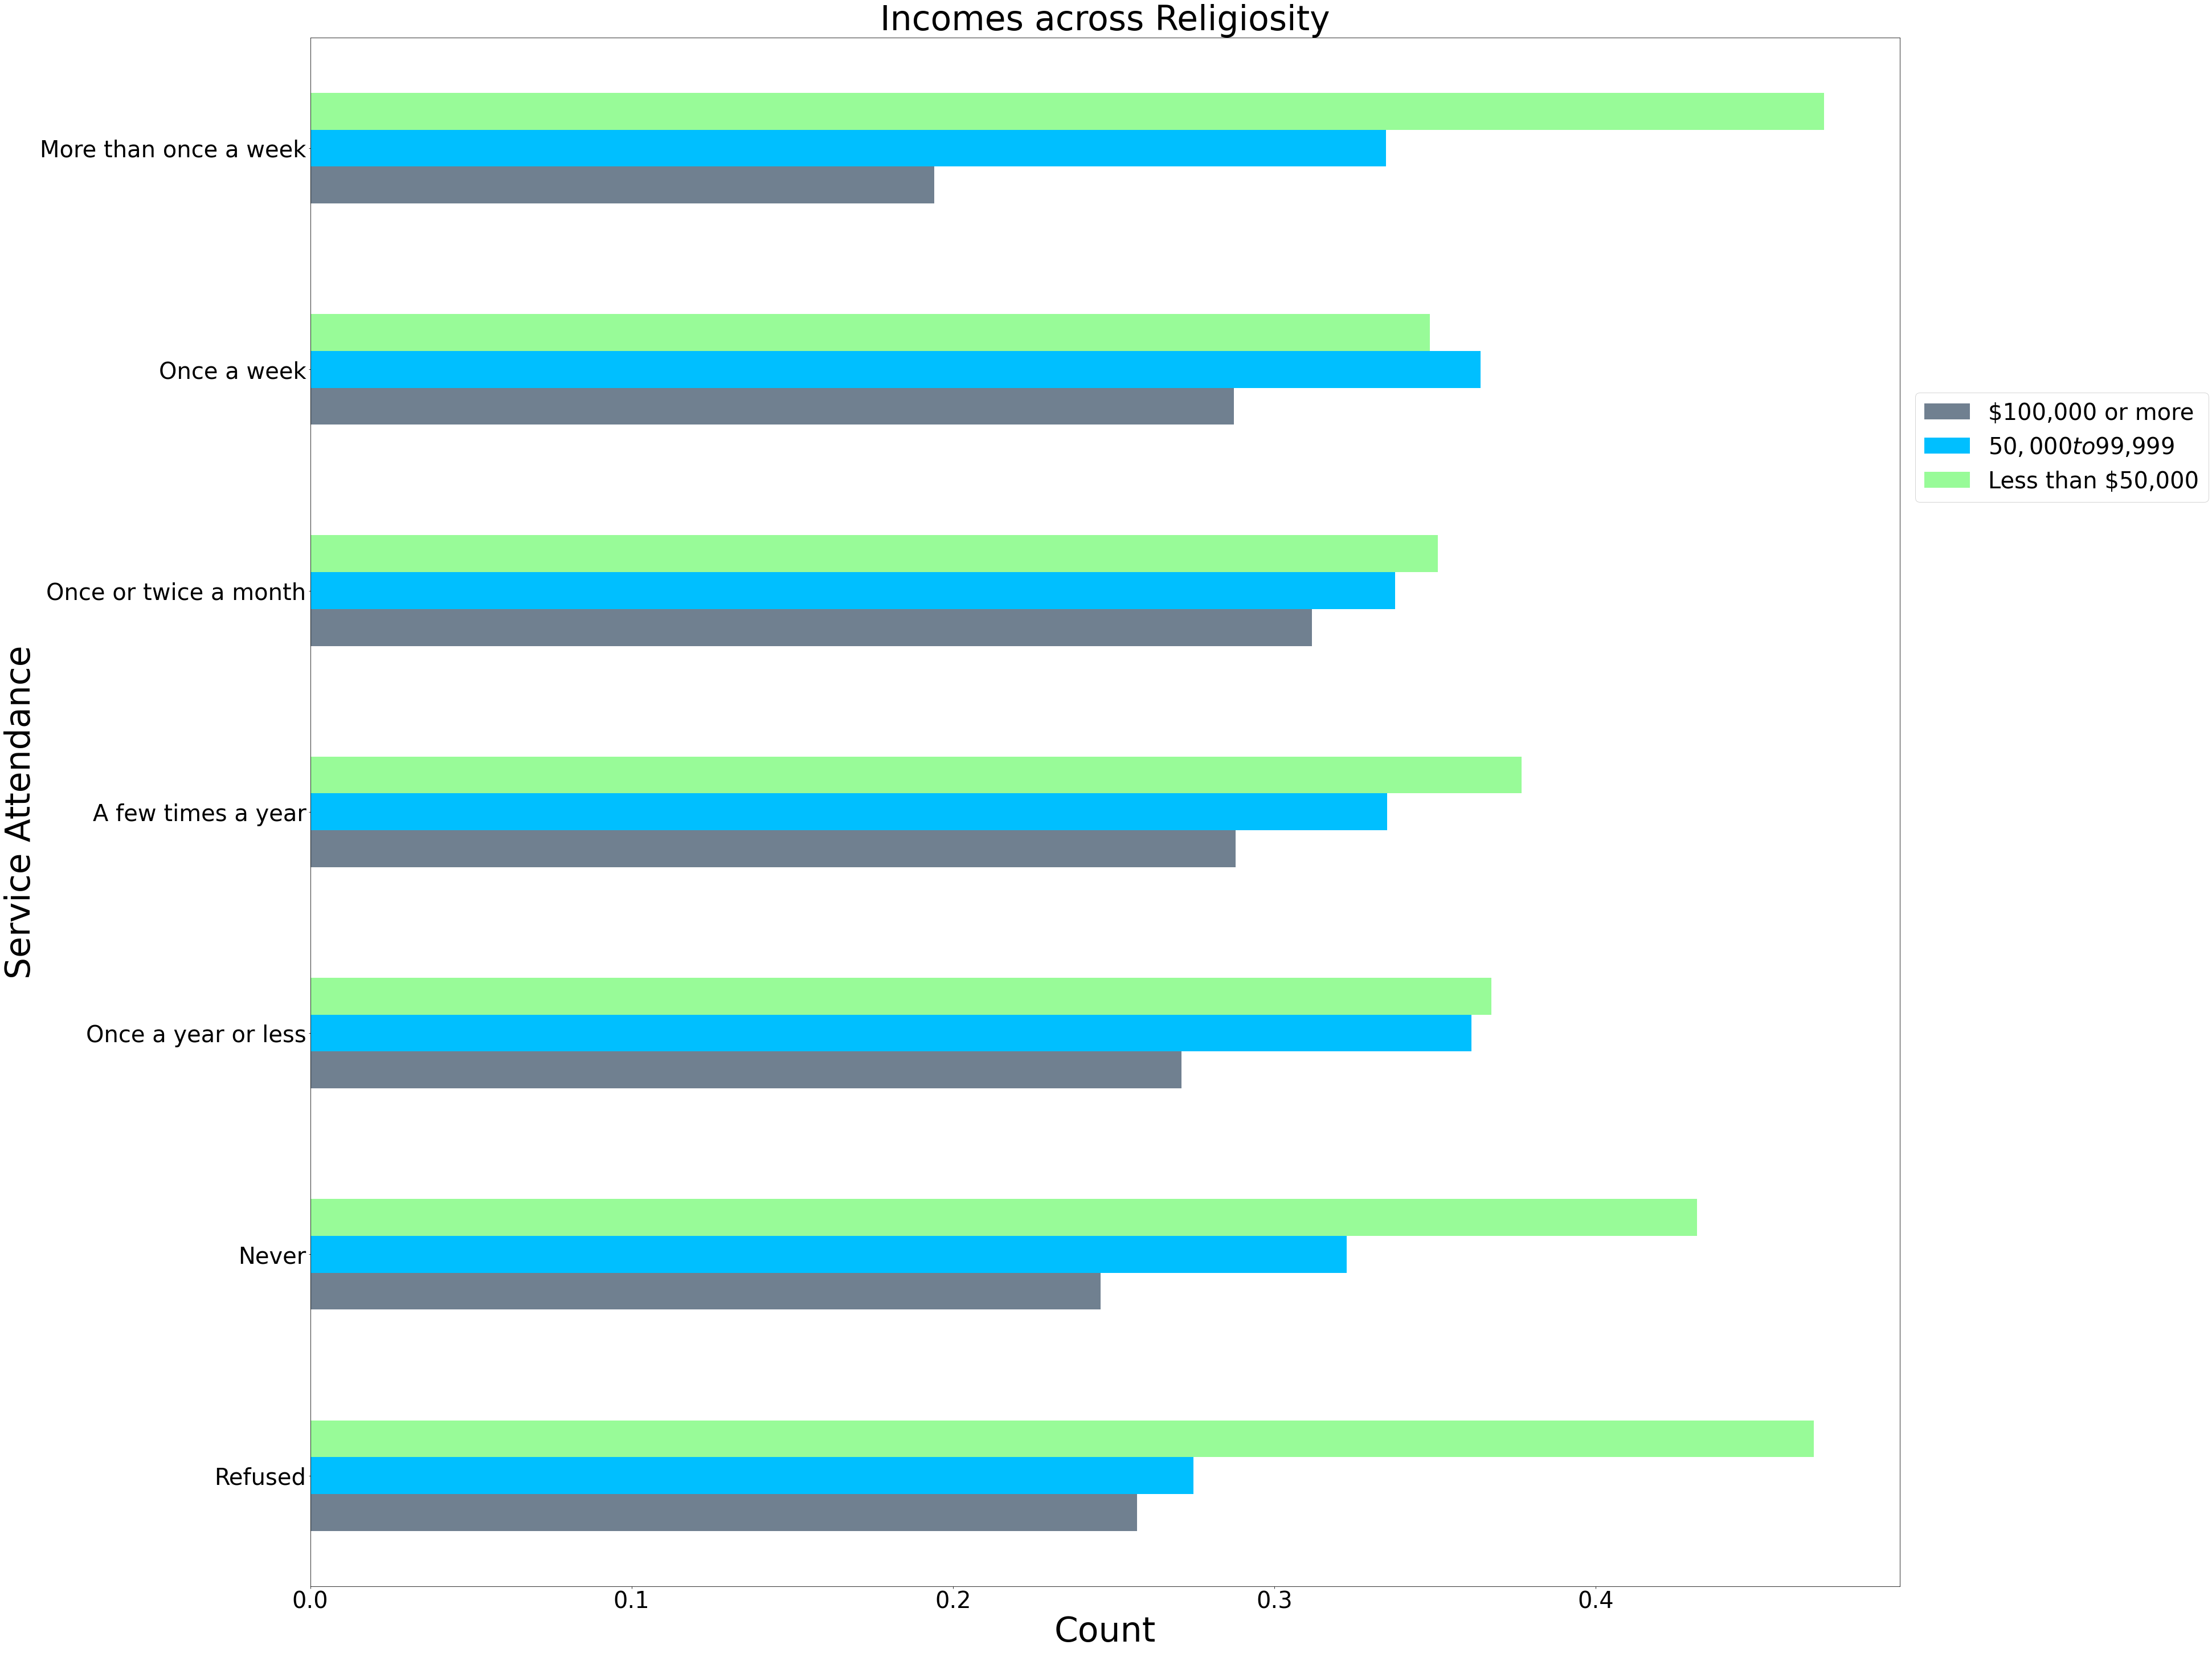

In [161]:
ax = df.groupby(['service_attendance'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
                color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Service Attendance',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Incomes across Religiosity',fontsize=60)
plt.setp(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(['Refused','Never','Once a year or less','A few times a year','Once or twice a month','Once a week','More than once a week'],fontsize=40);
#-1. Refused
# 1. Never
# 2. Once a year or less
# 3. A few times a year
# 4. Once or twice a month
# 5. Once a week
# 6. More than once a week


- **To my surprise people who never go for service attendance(marked 1) have the most people in low income category**
- **Low income category is most represented across various groups**


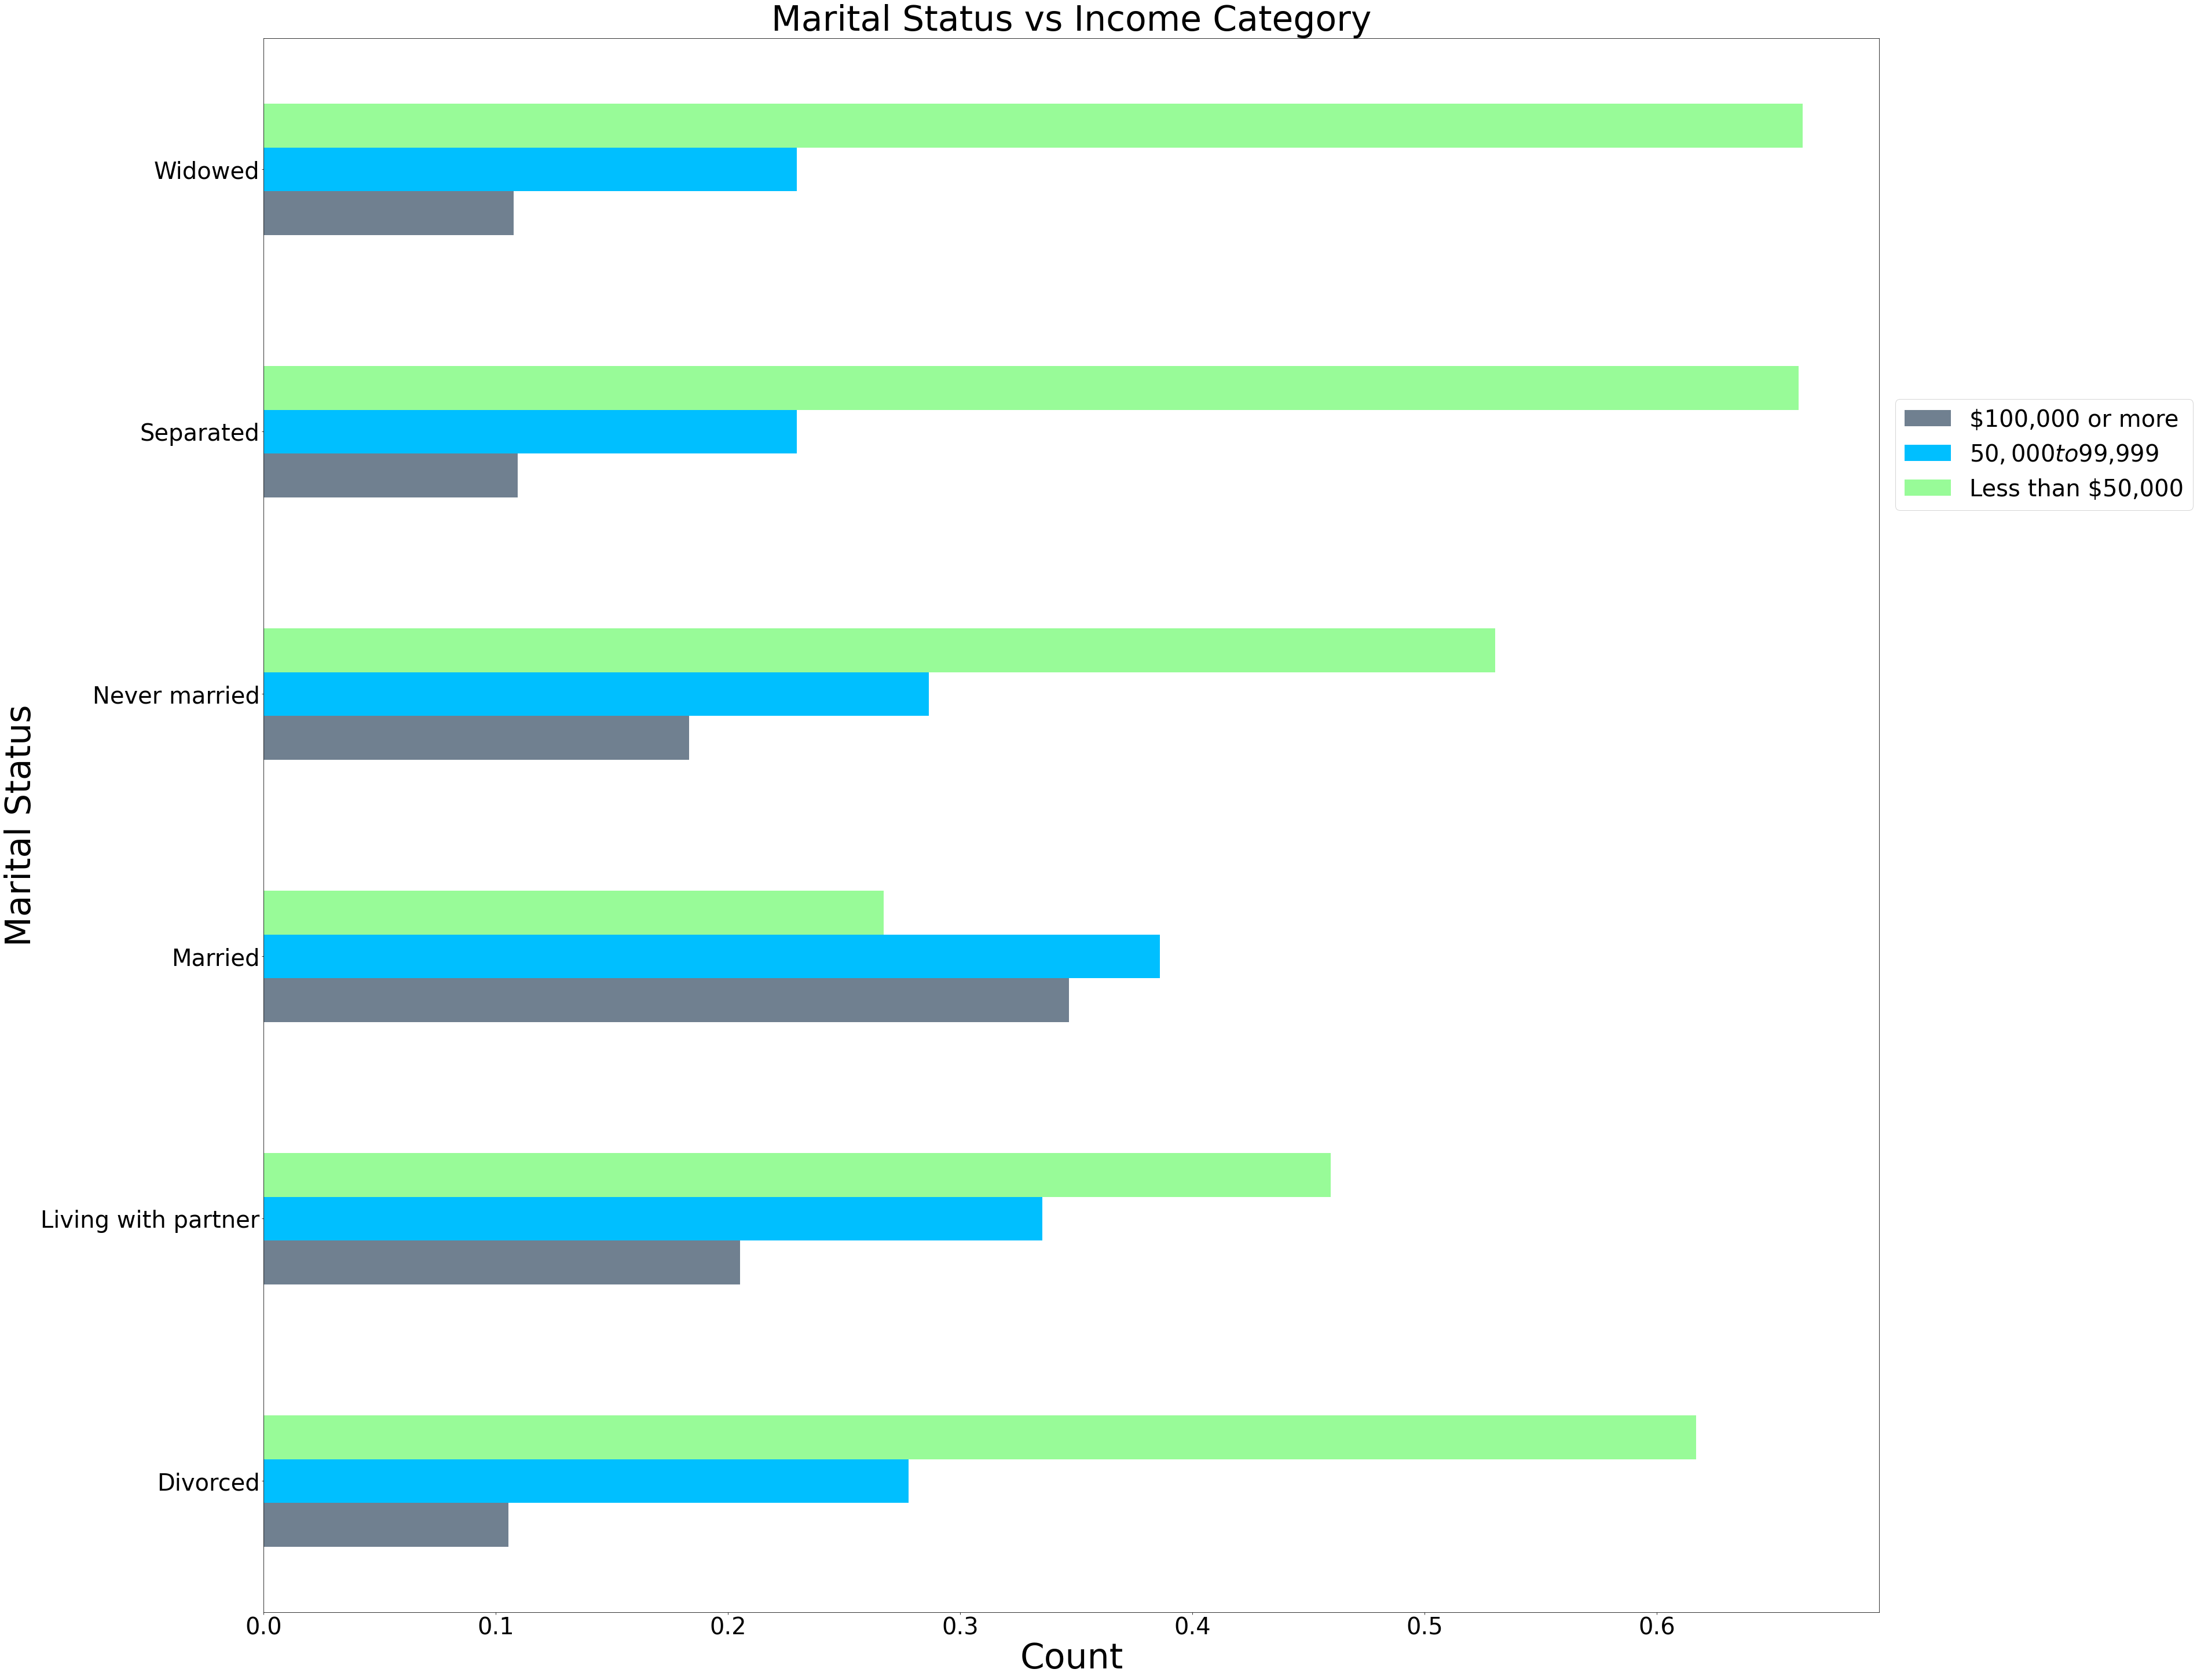

In [162]:
ax = df.groupby(['marit_status'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Marital Status',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Marital Status vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);

- **Low Income category has most people lying in it except for the Married group where Middle Income is predominant**
- **Married people are likely to have more income than the rest**


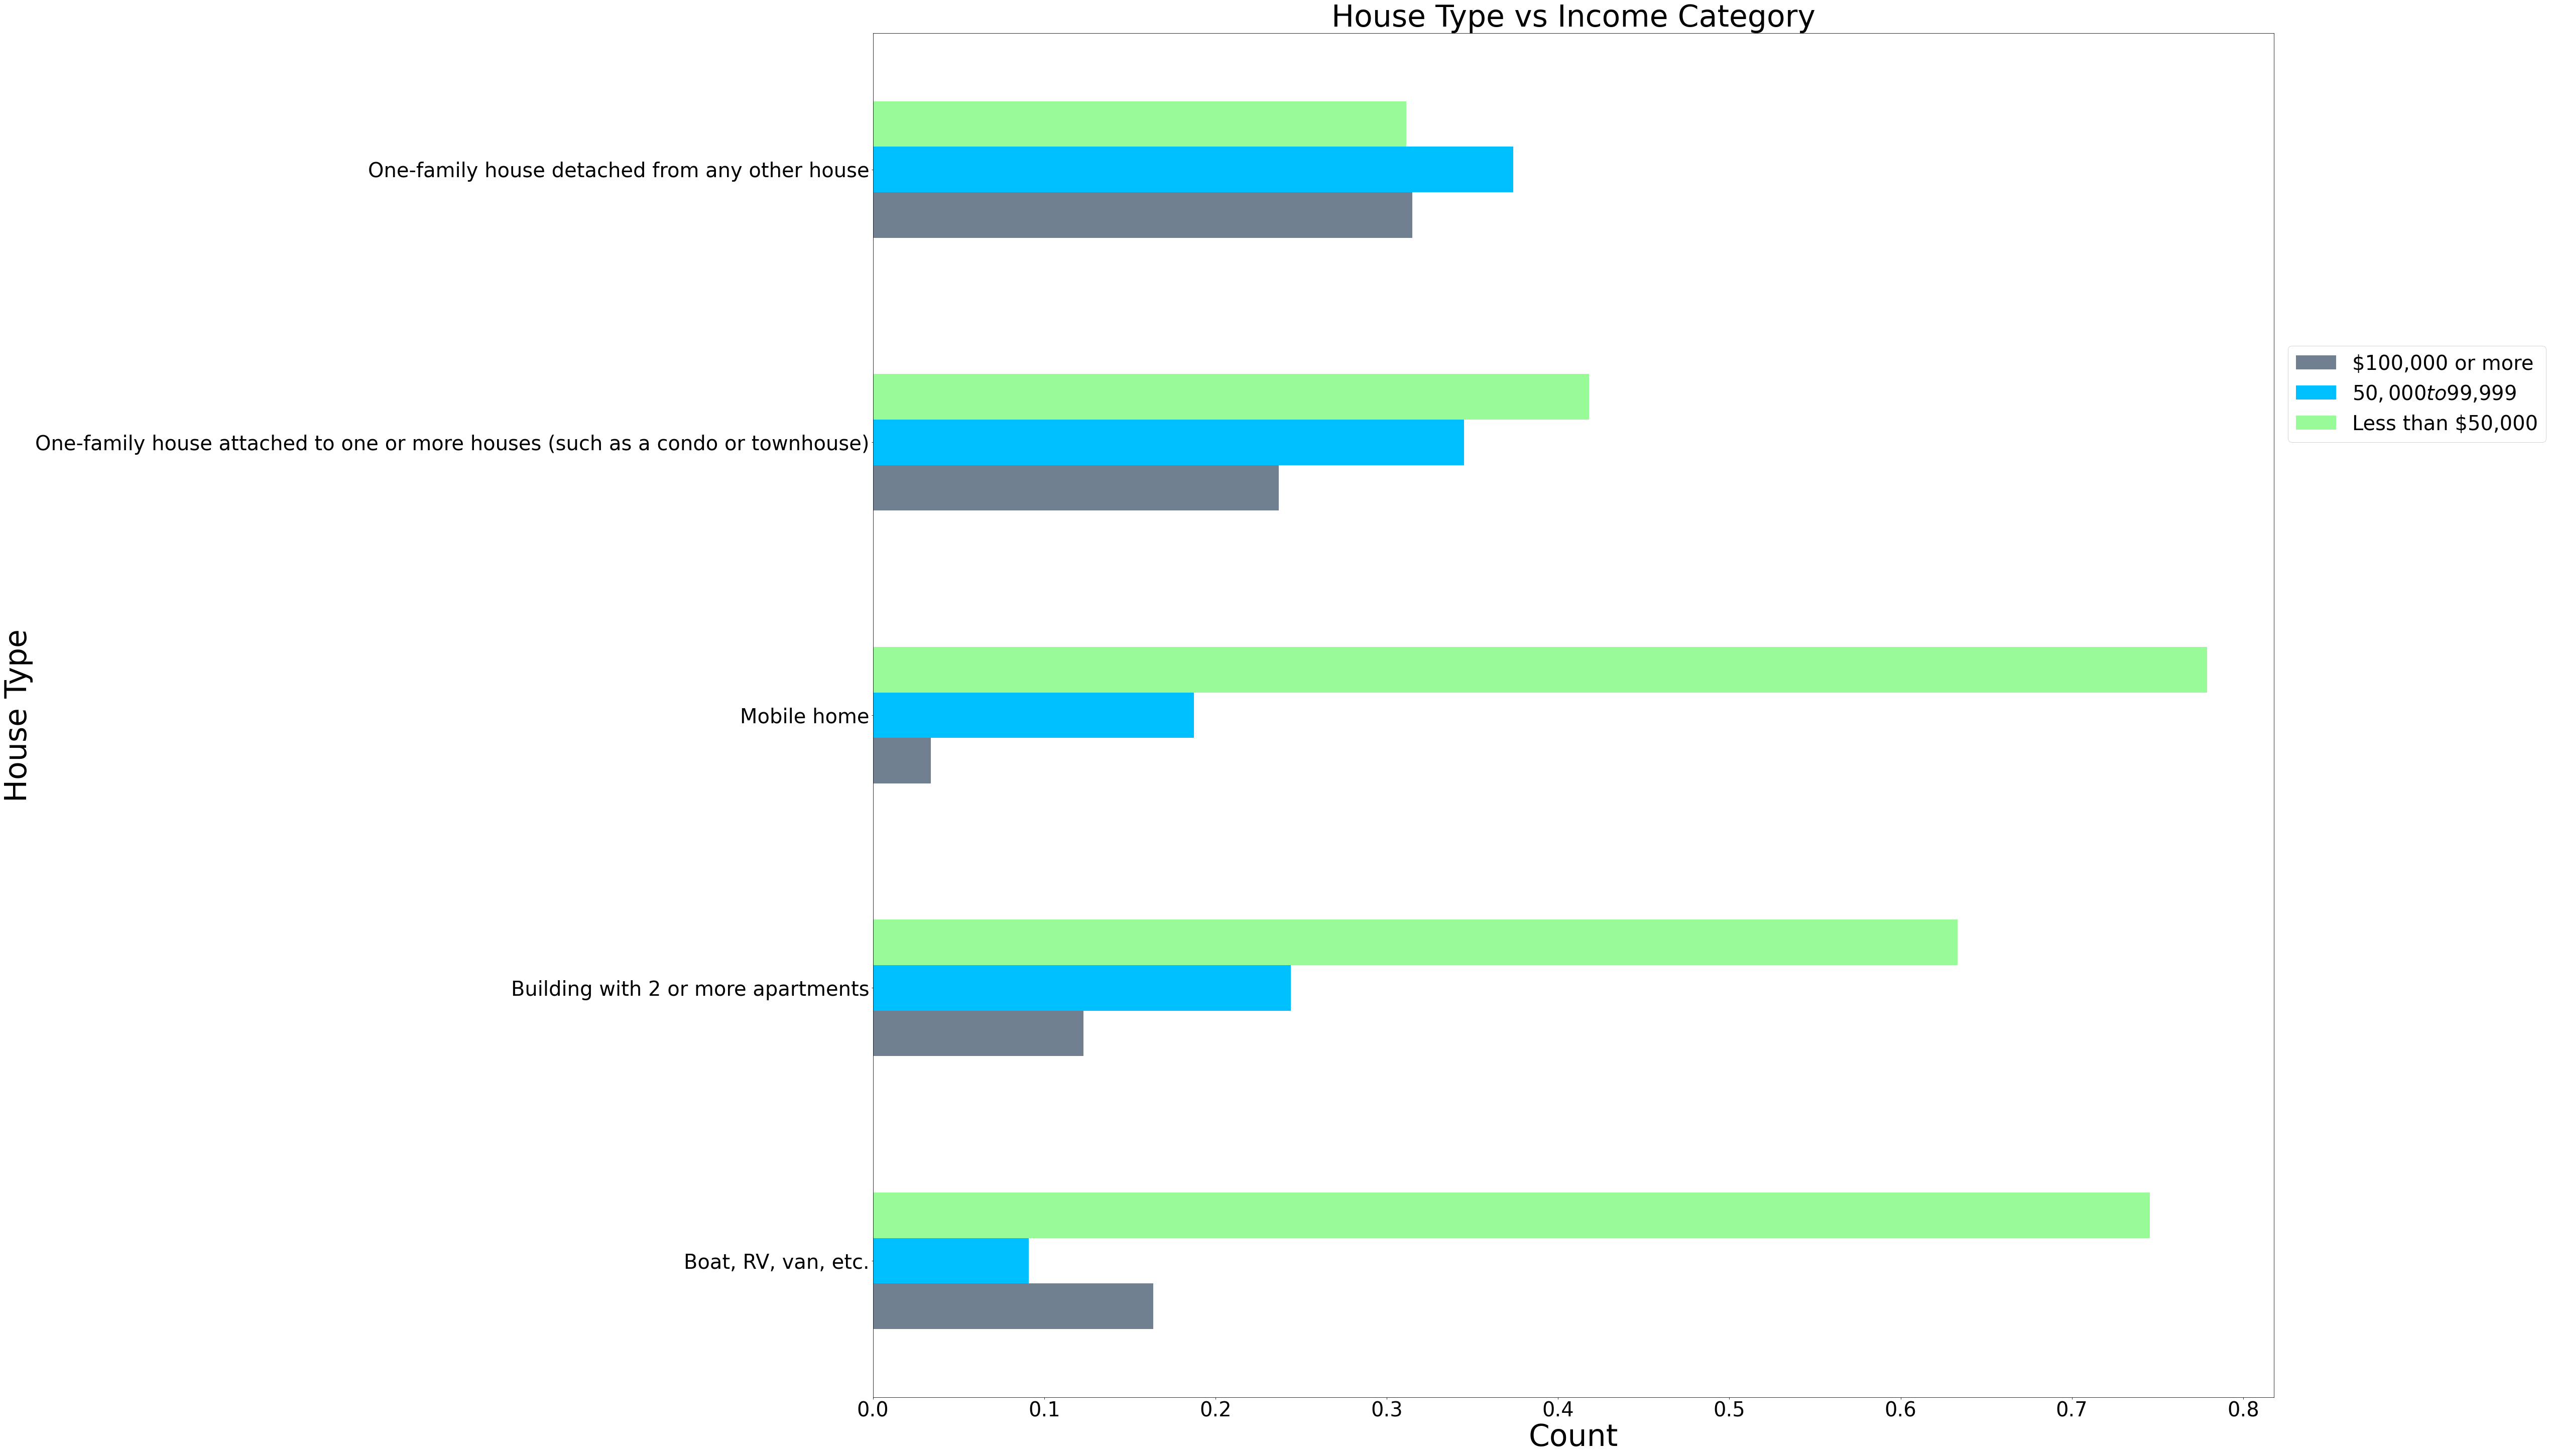

In [163]:
ax = df.groupby(['house_type'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Type',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Type vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);

**- Middle income people are more likely to own a One-Family house**

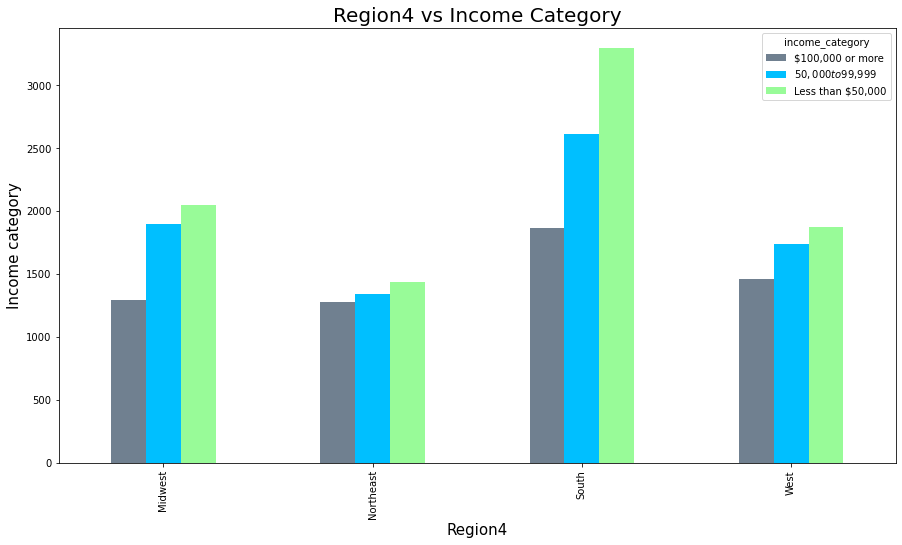

In [164]:
ax= pd.crosstab(index=df['region4'],columns=df['income_category']).plot.bar(figsize=(15,8),color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_xlabel('Region4',fontsize=15)
ax.set_ylabel('Income category',fontsize=15)
ax.set_title('Region4 vs Income Category',fontsize=20);

- **Low income category is predominant**
- **High income is less represented across regions**

# A note on Outliers

This survey included open ended questions that lended itself to certain extremes in answers and outliers. However, the survey makers would follow these open-ended questions with a grouping or binning of those responses to distill the answers back into a usable number. In addition, we also did some grouping or binning of responses to clarify the intention of the respondent's answer (ex: `discuss_GW`). This had a similar effect.

For these reasons, no rows were removed from this analysis for conventional outlier reasons. In the next workbook, respondents who routinely provided missing data in their responses are removed which we feel addresses them as outliers.

# Exports

In [165]:
df.to_csv('../data/survey_data_before_pre_processing.csv', index=False)